# Capstone Project - Finnish...

## Assignment Instructions from the course

Coursera Course: _Applied Data Science Capstone_

You have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to *explore or compare neighborhoods or cities*
of your choice **or** to *come up with a problem that you can use the Foursquare location data to solve*. If you cannot think of an idea or a problem, here are some ideas to get you started:

1. In Module 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries. One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are. Is New York City more like Toronto or Paris or some other multicultural city? I will leave it to you to refine this idea.

2. In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office?

These are just a couple of many ideas and problems that can be solved using location data in addition to other datasets. No matter what you decide to do, make sure to provide sufficient justification of why you think what you want to do or solve is important and why would a client or a group of people be interested in your project.


For the first week, you will required to submit the following:

1. A description of the problem and a discussion of the background. (15 marks)
2. A description of the data and how it will be used to solve the problem. (15 marks)


For the second week, the final deliverables of the project will be:

1. A link to your Notebook on your Github repository, showing your code. (15 marks)
2. A full report consisting of all of the following components (15 marks):
    - **Introduction** where you discuss the business problem and who would be interested in this project.
    - **Data** where you describe the data that will be used to solve the problem and the source of the data.
    - **Methodology** section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, and what machine learnings were used and why.
    - **Results** section where you discuss the results.
    - **Discussion** section where you discuss any observations you noted and any recommendations you can make based on the results.
    - **Conclusion** section where you conclude the report.
3. Your choice of a presentation or blogpost. (10 marks)


## Working notes

Wikipedia:
- Luettelo Suomen kunnista, sisältäen mm. väkiluku ja pinta-ala: https://fi.wikipedia.org/wiki/Luettelo_Suomen_kunnista
- Luettelo Suomen maakunnista, sis samat: https://fi.wikipedia.org/wiki/Suomen_maakunnat
- Luettelo Suomen postinumeroista kunnittain: https://fi.wikipedia.org/wiki/Luettelo_Suomen_postinumeroista_kunnittain


- http://tilastokeskus.fi/org/avoindata/paikkatietoaineistot.html

Tilastokeskus, Paavo:
- Tilastokeskus, Paavo kuvaus (postinumeroalueittainen avoin tieto): http://tilastokeskus.fi/tup/paavo/paavo_kuvaus_fi.pdf
- Tilastokeskuksen PX-Web-tietokannat (Paavo): http://pxnet2.stat.fi/PXWeb/pxweb/fi/Postinumeroalueittainen_avoin_tieto/
- PX-Web:ssä valittu 2019 -aineisto => 9. Kaikki tietoryhmät (päivitetty 22.1.2019) ja seuraavalla sivulla valittu kaikki postinumeroalueet ja kaikki tiedot => valinta yhteensä 314 808 taulukkosolua, lataus "puolipiste-eroteltu (otsikollinen)".  Tallennettu tiedostoon *paavo_9_koko.csv*
- from the saved file, first two rows (empty rows in the beginning of the file) were removed.
- coordinates used: **EUREF-FIN** coordinate system (**ETRS89-TM35FIN**)


- toinen lähde: http://spatialreference.org/ref/epsg/?search=finland&srtext=Search
- antaa EPSG:2393: KKJ / Finland Uniform Coordinate System
- tämäkin lähde auttoi: http://www.kolumbus.fi/eino.uikkanen/geodocsgb/ficoords.htm
- Test coordinates visually (are they in right place) here: https://suomenkartta.fi/karttakoordinaatit/



# Step 0.1 - Workbook basic settings

Use the following variable to control certain aspects of this workbook.

In [1]:

### -----------------------------------------------------
###
### Paavo dataset
###
###

# Paavo data filename.
PAAVO_FILENAME = 'paavo_9_koko_en_tab.csv'

# Use this as a backup location if the local file is not found.
PAAVO_GITHUB_URL = 'https://raw.githubusercontent.com/aitennek/Coursera_Capstone/master/Final_assignment/paavo_9_koko_en_tab.csv'



### -----------------------------------------------------
###
### Foursquare venue dataset
###
###

# This is the file where the downloaded Foursquare data is stored in CSV format.
FS_DATA_FILENAME = "FourSquare_downloaded_venues_new.csv"

# Use this as a backup location if the local file is not found.
FS_DATA_GITHUB_URL = "https://raw.githubusercontent.com/aitennek/Coursera_Capstone/master/Final_assignment/FourSquare_downloaded_venues_new.csv"


# Change these values IF YOU DO WANT downloading to happen.  In most cases we should already have the venue data downloaded, so these
# should be False for not downloading.
#
FS_DOWNLOAD_ALL = False
FS_DOWNLOAD_SELECTED = False

# If you want to download the data, then also fill in these values.

FS_CLIENT_ID = '<YOUR_CLIENT_ID>' # your Foursquare ID
FS_CLIENT_SECRET = '<YOUR_CLIENT_SECRET>' # your Foursquare Secret



## Step 0.2 - Import libraries

In [2]:
import pandas as pd # library for data analsysis

# Show floats in two decimals
# Note: this has global effect on all DataFrames!
pd.options.display.float_format = '{:,.2f}'.format

import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import os
import math
import requests # library to handle requests
import operator

#!conda install -c conda-forge folium=0.5.0 --yes
# OR
#!pip install folium
try:
    import folium # plotting library
except:
    !pip install folium
    import folium
    
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import preprocessing

#!pip install seaborn
import seaborn as sns

# Need to install pyproj first, if possible, check this out...
#!pip install pyproj
try:
    import pyproj
except:
    !pip install pyproj
    import pyproj

import matplotlib as mpl
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [3]:
# Axure environment has pandas 0.19.2, it has differences compared to 0.24.1 which is used here
#!pip install --upgrade pandas
required_pandas_version = '0.24.1'
if pd.__version__ < required_pandas_version:
    print("Installed Pandas package version is", pd.__version__)
    print("This notebook requires version", required_pandas_version)
    print(" => updating Pandas package...\n\n")
    !pip install --upgrade pandas


# Axure environment has seaborn 0.8, it has differences compared to 0.9.0 which is used here
#!pip install --upgrade seaborn
required_sns_version = '0.9.0'
if sns.__version__ < required_sns_version:
    print("Installed Seaborn package version is", sns.__version__)
    print("This notebook requires version", required_sns_version)
    print(" => updating Seaborn package...\n\n")
    !pip install --upgrade seaborn

if (pd.__version__ < required_pandas_version) or (sns.__version__ < required_sns_version):
    raise Exception("Restart Kernel so that new versions of installed packages can be taken to use.")

print('Found Pandas version {}, ok!'.format(pd.__version__))    
print('Found Seaborn version {}, ok!'.format(sns.__version__))    


Found Pandas version 0.24.1, ok!
Found Seaborn version 0.9.0, ok!


# Step 0.3 - Helper functions

These are gathered here to make the rest of the workbook a bit more readable.

In [4]:

### ---------------------------------------------------------
###
### Helper functions for Paavo data Enhancement
###
###

# Following three helper functions assume Paavo 'postal code' field value has
# Structure: 'NNNN <postal code area name> (<city name>)'
# Example: '00120 Punavuori (Helsinki )'

# Return the postal code number from Paavo 'postal code' field value
def get_pc_number(pc):
    return pc[:5].strip()

# Return the city name from Paavo 'postal code' field value
def get_city_name(pc):
    loc = pc.find('(')
    return pc[loc:].strip('() ')

# Return the postal code area name from Paavo 'postal code' field value
def get_pc_area_name(pc):
    loc = pc.find('(')
    return pc[5:loc].strip()
    
print("get_pc_number() defined.")
print("get_city_name() defined.")
print("get_pc_area_name() defined.")


# Helper functions to analyze / report data values.

# Helper function to do the filtering of paavo data and report to user how the filtering goes.
# For the given dataframe, filter out rows that have less than 30 inhabitants in a given column.
# Processes one column at a time, so for multiple columns to clean, multiple calls are needed.
def paavo_filter_rows_on_column(df, col_index):
    col_name = df.columns[col_index]
    print("Cleaning away postal codes which have less than 30 inhabitants in column\n", col_name)
    count_before = df.shape[0]
    filtered_df = df[df[col_name] >= 30]
    count_after = filtered_df.shape[0]
    print("\tPostal Codes cleaned away:   ", count_before - count_after)
    print("\tContinuing with:              ", count_after, "Postal Codes\n")
    return filtered_df

print("paavo_filter_rows_on_column() defined.")


# Helper / convenience function to add relative metrics into a dataframe.
# new_col_name value will be col1_name / col2_name.
# Additionally sorts the new column right after the latter of input columns. 
def add_relative_metric_into_df(df, new_col_name, col1_name, col2_name):

    # first do the adding of the metrics
    df[new_col_name] = df[col1_name] / df[col2_name]
    df_cols = df.columns.tolist()

    # then position the new metric right of the col1, col2, whichever is more to the right. 
    col1_index = df_cols.index(col1_name)
    col2_index = df_cols.index(col2_name)
    df_cols.remove(new_col_name)
    df_cols.insert(max(col1_index, col2_index) + 1, new_col_name)
    df = df.loc[:, df_cols]

    return df

print('add_relative_metric_into_df() defined.')



### ---------------------------------------------------------
###
### Generic helper functions
###
###


# Reorders list content.  Whole is a list, in which we want to sort elements of top to the beginning.
# Parameters 'top' and 'whole' are both lists.  Every element of 'top' must be in 'whole'.
# Returns a new list, does not modify input parameters.
def list_order_to_top(top, whole):
    # Check that all elements in top are also in whole
    for t in top:
        if t not in whole:
            raise Exception("joo")
    rest = []
    for w in whole:
        if w not in top:
            rest = rest + [w]
    return top + rest


# Find out how many of each value there are in a list.
# Takes in a list and returns a dictionary, whose keys are list values, and values are # of occurrences on list
def list_find_uniques_with_counts(l, key_counts={}):
    for list_value in l:
        list_value = str(list_value)
        if list_value in key_counts.keys():
            key_counts[list_value] = key_counts[list_value] + 1
        else:
            key_counts[list_value] = 1
    return key_counts


# Pretty print the uniques with their counts.  Takes in the output dictionary
# that is returned from list_find_uniques_with_counts
def print_uniques_with_counts_dict(key_counts, print_threshold=0, total_values=0):
    for i in (range(len(key_counts.keys()))):
        max_key = max(key_counts.items(), key=operator.itemgetter(1))[0]
        if total_values == 0:
            total_percentage = ""
        else:
            total_percentage = int(100*(key_counts[max_key]/total_values))
        if key_counts[max_key] > print_threshold:
            print("{:>25} -- {:3} ({:2}%)".format(max_key, key_counts[max_key], total_percentage))
        key_counts.pop(max_key, None)


# Calculate the euclidian distance between points 1 and 2. Typically points are two dimensional,
# but here they can have any dimension, as long as they have the same dimensions.
# parameters point1 and point2 are lists of equal length, and their values must be numerical.
# Returns the distance.
def euclidian_distance(point1, point2):
    if len(point1) != len(point2):
        raise Exception("Input lists are not of equal length!")
    cum_sum = 0
    for x1, x2 in zip(point1, point2):
        cum_sum = cum_sum + (x1 - x2)**2
    return math.sqrt(cum_sum)


print("list_order_to_top() defined.")
print("list_find_uniques_with_counts() defined.")
print("print_uniques_with_counts_dict() defined.")
print("euclidian_distance() defined.")



### ---------------------------------------------------------
###
### Foursquare specific helper functions and definitions.
###
###



# FourSquare call parameters
FS_VERSION = '20180604'
FS_LIMIT = 50 # This is maximum

fs_venue_data_columns = [
    'PC', 
    'PC Latitude', 
    'PC Longitude',
    'Venue Id',
    'Venue', 
    'Venue Latitude', 
    'Venue Longitude', 
    'Venue Category']


# fs_download_nearby_venues accesses Foursquare's explore -endpoint to download venue data, and returns a dataframe.
# Helper function from 2nd lab of week 3
def fs_download_nearby_venues(postal_codes, latitudes, longitudes, radius=500, section=False):
    
    venues_list=[]
    for pc, lat, lng in zip(postal_codes, latitudes, longitudes):
        #print(pc)

        # create the API request URL
        url = ""
        if section:
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&section={}&limit={}'.format(
                FS_CLIENT_ID, FS_CLIENT_SECRET, FS_VERSION, lat, lng, radius, section, FS_LIMIT)
        else:
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                FS_CLIENT_ID, FS_CLIENT_SECRET, FS_VERSION, lat, lng, radius, FS_LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                pc, lat, lng,
                v['venue']['id'],
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']
            ) for v in results])
        except:
            print("SOMETHING WENT WRONG DOWNLOADING {} FROM FourSquare".format(pc))

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    if nearby_venues.shape[0] == 0:
        nearby_venues = pd.DataFrame(columns=fs_venue_data_columns)
    else:
        nearby_venues.columns = fs_venue_data_columns
    
    return(nearby_venues)


print("fs_download_nearby_venues() defined")


# For each postal code in the input paavo_df, check if it already has some downloaded venue data in fs_venue_df.
# If not, then download venue data, otherwhise skip to next postal code in paavo_df.  Update the downloaded results
# directly to the fs_venue_df.
#
# Input paavo_df can be all of the paavo data or any subset of selected rows from it - this update focuses only on the
# postal codes included in the input paavo_df.
#
# Note that as the result limit from Foursquare is 50 venues.  If the returned result set indeed contains that maximum
# amount of venues, then we seek for more venue data by doing additional but more focused downloads to food, coffee and
# drinks categories. 

def fs_ensure_downloaded_venues_for_postal_codes(paavo_df):
    global fs_venue_df
    work_df = paavo_df
    print("Filter results in {} postal codes. Starting...".format(work_df.shape[0]))

    # Loop through each postal code, check if there are already venues for it in fs_venue_df.
    # If yes, skip to next postal code, if not then download data and add it to fs_venue_df.
    for pc in work_df["PC"].tolist():
        #print(pc, type(pc))
        if fs_venue_df[fs_venue_df["PC"] == pc].shape[0] == 0:
            # No previous data, download and add
            print("downloading venues for {} from Foursquare.".format(pc), end="")
            
            pc_row_df = work_df[work_df["PC"] == pc]
            lon = pc_row_df.iloc[0,2]
            lat = pc_row_df.iloc[0,3]
            area = pc_row_df.iloc[0,6]
            r = int(math.sqrt(area))
            new_venues_df = fs_download_nearby_venues([pc], [lat], [lon], r)
            fs_venue_df = pd.concat([fs_venue_df, new_venues_df])
            count = new_venues_df.shape[0]
            print("  Received {} venues.".format(count), end="")
            if count == 50:
                print(" More food, coffee and drinks?", end="")
                # Check for more 'food', 'drinks' and 'coffee' venues with the section info
                new_venues_df = fs_download_nearby_venues([pc], [lat], [lon], r, 'food')
                fs_venue_df = pd.concat([fs_venue_df, new_venues_df])
                new_venues_df = fs_download_nearby_venues([pc], [lat], [lon], r, 'coffee')
                fs_venue_df = pd.concat([fs_venue_df, new_venues_df])
                new_venues_df = fs_download_nearby_venues([pc], [lat], [lon], r, 'drinks')
                fs_venue_df = pd.concat([fs_venue_df, new_venues_df])
            print(" Done.")
                
    print("Done.")


print("fs_ensure_downloaded_venues_for_postal_codes() defined.")


# Save fs_venue_df to a local file and test it by reading it back and comparing the dataframe shapes.
#
# It is worthwhile to save the data every now and then, as it is
# a lot of downloading, takes a lot time, and something can fail.

def fs_save_venues_to_file():
    fs_venue_df.to_csv(FS_DATA_FILENAME, index=False)

    # Check via reading data back in
    test_read_df = pd.read_csv(FS_DATA_FILENAME)
    if fs_venue_df.shape == test_read_df.shape:
        print("File saved successfully with {} rows of data.".format(fs_venue_df.shape[0]))
        # Release this data from memory, it was just for testing.
        test_read_df = None
    else:
        print("Something is wrong, files do not match.")
        print("Data shape:", fs_venue_df.shape)
        print("File shape:", test_read_df.shape)
        test_read_df = None

print("fs_save_venues_to_file() defined.")



### ---------------------------------------------------------
###
### Clustering specific helper functions and definitions.
###
###



# Helper to find us a value for k.  Return highest k such that resulting clusters still have at least size_min_limit elements.
# Does max search_upper_limit rounds (with k = 2..search_upper_limit), but stops if finds that quick_cut_limit times in a row the size_min_limit has not been met.
# Returns the proposed k (or force_k, if given), clusters, and testin results (also printed).
def get_KMeans_clusters_with_best_k(cluster_df, size_min_limit = 2, force_k = -1, quick_cut_limit = 100, find_best = True, search_upper_limit = 15):
    proposed_k = 1
    cluster_tests = False

    # use this variable to identify if we have received (in row) quick_cut_limit clusters that do not meet the size_min_limit -criteria
    # if so, we can stop the below loop faster
    count_undersized_consequetive_results = 0
    if find_best:

        cluster_tests = [None, [cluster_df.shape[0]]]

        # Run the clustering algorithm with different values of K to see what size of clusters emerge.
        # Propose k such that all resulting clusters are still bigger than size_min_limit in size.
        for loop_kclusters in range(2, search_upper_limit + 1):
            if count_undersized_consequetive_results >= quick_cut_limit:
                break
            clusters = KMeans(n_clusters=loop_kclusters, random_state=0).fit(cluster_df).labels_
            clusters_counts_d = list_find_uniques_with_counts(clusters, {}) # returns a dictionary
            clusters_counts_l = list(clusters_counts_d.values())
            clusters_counts_l.sort(reverse=True)
            if clusters_counts_l[-1] >= size_min_limit:
                proposed_k = loop_kclusters
                count_undersized_consequetive_results = 0
            else:
                count_undersized_consequetive_results = count_undersized_consequetive_results + 1
            cluster_tests.append(clusters_counts_l)
            print("cluster count: {:>2}, cluster sizes (sorted by size): {}".format(loop_kclusters, clusters_counts_l))

        print("\nProposing k = {} for clusters count (smallest clusters size is still at least {} elements)".format(proposed_k, size_min_limit))

    if not find_best:
        if force_k < 2:
            print('If find_best = False, then you must give force_k > 1.')
            print("Returning 'None'.")
            return None

    kclusters = proposed_k

    if force_k > 1:
        kclusters = force_k
        print(' *** NOTICE: User forced k =', kclusters)

    # run k-means clustering final time
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_df)

    # check cluster labels generated for each row in the dataframe
    print("\n\nClustered", len(kmeans.labels_), "postal code areas into", kclusters, "clusters.\n")

    return kclusters, kmeans.labels_, cluster_tests


print('get_KMeans_clusters_with_best_k() defined.')



# cluster_tests is a list of the results for testing clustering results for different values of k (returned by get_KMeans_clusters_with_best_k)
# Values of this list in each index is the cluster sizes when k is that index.
# value at index 0 should be ignored, as clusters with k=0 does not mean anything meaningful.

def plot_clustering_tests(cluster_tests, savename=False):
    plt.figure(figsize=(10,8))
    sns.set_context("notebook", rc={'lines.linewidth': 2})
    #plt.yscale('log')
    for i in range(1, len(cluster_tests)):
        y = [l[i-1] for l in cluster_tests[i:]]
        x = list(range(i, len(cluster_tests)))
        if max(y) > 1:
            sns.lineplot(x, y)

    cluster_tests_labels = ['Biggest cluster',
                            '2nd biggest cluster',
                            '3rd biggest cluster',
                            '4th biggest cluster',
                            '5th biggest cluster',
                            '6th biggest cluster',
                            '7th biggest cluster',
                            '8th biggest cluster',
                            '9th biggest cluster',
                            '10th biggest cluster',
                            '11th biggest cluster',
                            '12th biggest cluster',
                            '13th biggest cluster',
                            '14th biggest cluster',
                            '15th biggest cluster',
                            '16th biggest cluster',
                            '17th biggest cluster',
                            '18th biggest cluster',
                            '19th biggest cluster',
                            '20th biggest cluster'
                      ]

    plt.legend(labels=cluster_tests_labels[:len(cluster_tests)])
    plt.xticks(list(range(1, len(cluster_tests))))

    plt.xlabel('K (value of clusters)')
    plt.ylabel('Cluster size')
    if savename:
        plt.savefig(savename)
    plt.show()

print('plot_clustering_tests() defined.')


# clusters is the output from KMeans.  Count which cluster is the biggest, second biggest etc and create a
# dataframe that has mapping from current cluster id to the new ordered id.
def get_ordered_new_cluster_labels(clusters, k):
    new_labels_digit = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

    cluster_relabel_df = pd.DataFrame(clusters)
    cluster_relabel_df.columns = ['ClusterLabel']
    cluster_relabel_df["count"] = np.ones(len(clusters))
    cluster_relabel_df = cluster_relabel_df.groupby("ClusterLabel").count()

    cluster_relabel_df.sort_values('count', ascending=False, inplace=True)
    cluster_relabel_df['Cluster'] = new_labels_digit[:k]
    cluster_relabel_df = cluster_relabel_df.reset_index()
    cluster_relabel_df.sort_values('ClusterLabel', ascending=True, inplace=True)
    return cluster_relabel_df['Cluster'].tolist()
    

print('get_ordered_new_cluster_labels() defined.')



standardize_remove_columns = [
    'PC', 'PC Name', 'City',
    'PC Longitude',
    'PC Latitude',
    'X coordinate in metres',
    'Y coordinate in metres'
]

# Helper and convenience function.  Removes above columns, then does the data standardization trick
def standardize_df(df):
    print('Standardizing dataframe of shape', df.shape)
    
    # First remove columns that we do not want to include
    columns_to_standardize = []
    for col in df.columns.tolist():
        if col not in standardize_remove_columns:
            columns_to_standardize.append(col)
        else:
            print('removing column:', col)

    # Create the standardized version of data.
    standardized_df = df[columns_to_standardize].astype('float64')
    standardized_df = standardized_df.replace([np.inf, -np.inf], 0)
    standardized_np = preprocessing.StandardScaler().fit_transform(standardized_df)
    standardized_df = pd.DataFrame(standardized_np)

    print('Returning standardized dataframe of shape', standardized_df.shape)
    return standardized_df

print('standardize_df() defined.')


# Parameter merge_key is the column name which is used in joining the clustered data back to the target dataset.
# Parameter new_clusters_col_name is the name of the column that will contain the cluster ids.
# Assumptions: cluster_matching_df is a filtered subset of target_df.
def merge_clusters_back_to_data(clustering_filter, target_df, merge_key, clusters, k, new_clusters_col_name):

    ordered_new_labels = get_ordered_new_cluster_labels(clusters, k)

    clusters_df = target_df[clustering_filter][[merge_key]]
    clusters_df['Cluster tmp'] = clusters
    clusters_df['Cluster'] = np.zeros(len(clusters))
    for i in range(k):
        clusters_df.loc[clusters_df['Cluster tmp'] == i, 'Cluster'] = ordered_new_labels[i]
    clusters_df['Cluster'] = clusters_df['Cluster'].astype('int')
    # drop for cleaner merge.  Keep city in other purposes for city filtering...
    clusters_df.drop(['Cluster tmp'], inplace=True, axis=1)
    # use a temp dataframe for convenience (if we run this cell multiple times, it doesnt mess up paavo_venues_df)
    clusters_merge_tmp_df = target_df[[merge_key]].merge(clusters_df, how='left', on=merge_key)
    clusters_merge_tmp_df.rename(columns={'Cluster': new_clusters_col_name}, inplace=True)
    clusters_merge_tmp_df = clusters_merge_tmp_df.fillna(0)

    target_df[new_clusters_col_name] = clusters_merge_tmp_df[new_clusters_col_name]
    target_df[new_clusters_col_name] = target_df[new_clusters_col_name].astype('int')
    return target_df

print('merge_clusters_back_to_data() defined.')   




### ---------------------------------------------------------
###
### Top 10 most common venues -related helper functions and definitions.
###
###


#
# Helper function to focus attention on each neighborhoods most common venues
# Expect that unnecessary columns have been removed already
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

print("return_most_common_venues() defined.")


# create column names for a pandas dataframe
def create_top_venues_column_names(num_top_venues):
    top_venues_columns = []
    for ind in np.arange(num_top_venues):
        top_venues_columns.append("Most Common Venue #{}".format(ind+1))
    return top_venues_columns

print('create_top_venues_column_names() defined.')

# Return a dataframe that has the merge_key and additional num_top_venues columns, but
# equal amount of rows as src_df.  Also return the column names that include
# top venues.
def create_top_venues_df(num_top_venues, src_df, src_cols, merge_key):

    top_venues_columns = create_top_venues_column_names(num_top_venues)

    # create a new dataframe
    top_venues_df = pd.DataFrame(columns=[merge_key] + top_venues_columns)
    top_venues_df[merge_key] = src_df[merge_key]

    for row_id in np.arange(src_df.shape[0]):
        top_venues_df.loc[row_id, 1:] = return_most_common_venues(src_df.loc[row_id, src_cols], num_top_venues)

    return top_venues_columns, top_venues_df


print("create_top_venues_df() defined.")


# add top venues into the given src_df.  Add venues into insert_loc location (counting columns from left) 
def add_top_venues_into_df(num_top_venues, src_df, src_cols, merge_key, insert_loc):
    top_venues_columns, top_venues_df = create_top_venues_df(num_top_venues, src_df, src_cols, merge_key)
    
    # check that any previous matching column names are dropped
    for col in src_df.columns.tolist():
        if col in top_venues_columns:
            src_df.drop(columns=[col], inplace=True)
    
    src_df = src_df.merge(top_venues_df, on=merge_key)
    src_new_cols = src_df.columns.tolist()
    src_new_cols = list_order_to_top(src_new_cols[:insert_loc] + top_venues_columns, src_new_cols)
    return top_venues_columns, src_df[src_new_cols]

print("add_top_venues_into_df() defined.")




### ---------------------------------------------------------
###
### Summary creation helper functions and definitions.
###
###


# Create summary of the given dataframe.  Use sum as the summary method by default, but use mean as the summary method for columns in
# columns_summary_by_mean.  Additionally sort by chosen column.
def create_summary_df(source_df, grouping_col, sort_col, sort_ascending=False):
    summary_df = source_df.groupby(grouping_col).sum()
    summary_df[columns_summary_by_mean] = source_df.groupby(grouping_col).mean()[columns_summary_by_mean]
    summary_df.sort_values(by=[sort_col], ascending=sort_ascending, inplace=True)
    summary_df = summary_df.reset_index()
    return summary_df

print('create_summary_df() defined.')


get_pc_number() defined.
get_city_name() defined.
get_pc_area_name() defined.
paavo_filter_rows_on_column() defined.
add_relative_metric_into_df() defined.
list_order_to_top() defined.
list_find_uniques_with_counts() defined.
print_uniques_with_counts_dict() defined.
euclidian_distance() defined.
fs_download_nearby_venues() defined
fs_ensure_downloaded_venues_for_postal_codes() defined.
fs_save_venues_to_file() defined.
get_KMeans_clusters_with_best_k() defined.
plot_clustering_tests() defined.
get_ordered_new_cluster_labels() defined.
standardize_df() defined.
merge_clusters_back_to_data() defined.
return_most_common_venues() defined.
create_top_venues_column_names() defined.
create_top_venues_df() defined.
add_top_venues_into_df() defined.
create_summary_df() defined.


## Step 1 - Paavo data

### Step 1.1 - Download Paavo data

**NOTE: this has already been done, this is just documentation on how to redo it if necessary.**

Paavo data is available for download through a couple of different methods.  The following 'Graphical User Interface' -method was used in this study.

Paavo data was obtained from here: http://pxnet2.stat.fi/PXWeb/pxweb/en/Postinumeroalueittainen_avoin_tieto/?rxid=4e21d676-5dd1-4575-ab30-d35b741089d4

Following screenshots detail the selections made to download the data to local computer.

**First, choose the year whose data you desire.  This study used the 2019 dataset:**

<img src="Paavo_download_1.JPG" style="width: 800px;">

**Then choose the statistics content you wish.  This study used the whole dataset:**

<img src="Paavo_download_2.JPG" style="width: 800px;">

**Finally you select the postal code areas you like and the statistical content fields in more detail.  Also choose the format for the download file. For this study we selected all postal code areas, all variables and a tab delimited format (kind of CSV):**

<img src="Paavo_download_3.JPG" style="width: 800px;">

**After downloading the data, the file's top two rows were removed, as they messed up the import process later.  The 1st removed row contained a title for the dataset and the 2nd removed row was empty.**

Then the Paavo data was ready to use.


### Step 1.2 - Load Paavo data

Try loading Paavo data from a local file, and if not found, try loading from Github repo as a backup plan.

In [5]:

paavo_df = None

if os.path.isfile(PAAVO_FILENAME):

    paavo_df = pd.read_csv(PAAVO_FILENAME, sep='\t', encoding='iso-8859-1')
    print("Loaded Paavo data from LOCAL FILE.\nFound {} rows and {} columns of data.".format(paavo_df.shape[0], paavo_df.shape[1]))

else:
    try:
        paavo_df = pd.read_csv(PAAVO_GITHUB_URL, sep="\t", encoding='iso-8859-1')
        print("Loaded Paavo data FROM GITHUB REPO (backup-method for loading the data).\nFound {} rows and {} columns of data.".format(paavo_df.shape[0], paavo_df.shape[1]))
    except:
        print("Did not find data file:", PAAVO_FILENAME)

# Show a sample of data to understand what we have
paavo_df.head()

Loaded Paavo data from LOCAL FILE.
Found 3027 rows and 105 columns of data.


Postal code area  X coordinate in metres  \
0                                          Finland                  429300   
1  00100 Helsinki Keskusta - Etu-Töölö   (Helsinki                  385114   
2                    00120 Punavuori   (Helsinki )                  385614   
3              00130 Kaartinkaupunki   (Helsinki )                  386228   
4     00140 Kaivopuisto - Ullanlinna   (Helsinki )                  386410   

   Y coordinate in metres  Surface area  Inhabitants, total, 2017 (HE)  \
0                 7084490  390813692400                        5513130   
1                 6672391       2353278                          18284   
2                 6671378        414010                           7108   
3                 6671492        428960                           1508   
4                 6670742        931841                           7865   

  Females, 2017 (HE) Males, 2017 (HE) Average age of inhabitants, 2017 (HE)  \
0            2793999          2719131                                    42   
1               9613             8671                                    41   
2               3751             3357                                    40   
3                772              736                                    41   
4               4277             3588                                    41   

  0-2 years, 2017 (HE) 3-6 years, 2017 (HE)  ...  \
0               160297               240994  ...   
1                  434                  521  ...   
2                  183                  234  ...   
3                   34                   48  ...   
4                  224                  250  ...   

  T Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use, 2016 (TP)  \
0                                                656                                                                                        
1                                                  0                                                                                        
2                                                  0                                                                                        
3                                                  0                                                                                        
4                                                  0                                                                                        

  U Activities of extraterritorial organisations and bodies, 2016 (TP)  \
0                                                343                     
1                                                 17                     
2                                                  0                     
3                                                 12                     
4                                                  1                     

  X Industry unknown, 2016 (TP) Inhabitants, 2016 (PT) Employed, 2016 (PT)  \
0                            59                5503297             2275679   
1                             1                  18035               10032   
2                             0                   7055                3872   
3                             0                   1522                 839   
4                             0                   7934                4218   

  Unemployed, 2016 (PT) Children aged 0 to 14, 2016 (PT) Students, 2016 (PT)  \
0                355837                           894178              407905   
1                   856                             1812                1198   
2                   336                              817                 428   
3                    61                              170                 104   
4                   325                              929                 518   

  Pensioners, 2016 (PT) Others, 2016 (PT)  
0               1389830            179868  
1 

### Step 1.3 - Paavo data, exploration

Here we explore the pure Paavo data features / columns as they are available from Tilastokeskus, that is, no fixes, cleaning or data manipulation on values.

Paavo data contains data in 105 columns for 3026 postal codes plus for the whole finland as well.  Below are the different datacolumns and their values for whole Finland, Helsinki downtown and a random rural area. The data is from years 2016 and 2017, depending on the data.

In [6]:
# Store this for later use
columns_paavo_statistics = paavo_df.columns.tolist()[3:]

In [7]:
# Create a subset dataframe to inspect data.  In the transposed dataframe:
#    - Column 0 is for whole Finland,
#    - Column 1 is for postal code 00100 (Finlands Capital, center)
#    - Column 2600 is for postal code 89840 (very rural area)
#
paavo_fin_df = paavo_df.T[[0, 1, 2600]]
paavo_fin_df.columns = ["Whole Finland", paavo_df.iloc[1,0], paavo_df.iloc[2600,0]]


#### Step 1.3.1 - Paavo data exploration - population and age groups, 2017

In [8]:
paavo_fin_df[4:28]

Whole Finland  \
Inhabitants, total, 2017 (HE)               5513130   
Females, 2017 (HE)                          2793999   
Males, 2017 (HE)                            2719131   
Average age of inhabitants, 2017 (HE)            42   
0-2 years, 2017 (HE)                         160297   
3-6 years, 2017 (HE)                         240994   
7-12 years, 2017 (HE)                        369950   
13-15 years, 2017 (HE)                       177163   
16-17 years, 2017 (HE)                       117857   
18-19 years, 2017 (HE)                       120218   
20-24 years, 2017 (HE)                       327752   
25-29 years, 2017 (HE)                       354325   
30-34 years, 2017 (HE)                       352269   
35-39 years, 2017 (HE)                       350498   
40-44 years, 2017 (HE)                       332814   
45-49 years, 2017 (HE)                       327889   
50-54 years, 2017 (HE)                       369756   
55-59 years, 2017 (HE)                       364798   
60-64 years, 2017 (HE)                       367232   
65-69 years, 2017 (HE)                       370001   
70-74 years, 2017 (HE)                       307517   
75-79 years, 2017 (HE)                       207063   
80-84 years, 2017 (HE)                       148572   
85 years or over, 2017 (HE)                  146165   

                                      00100 Helsinki Keskusta - Etu-Töölö   (Helsinki  \
Inhabitants, total, 2017 (HE)                                                   18284   
Females, 2017 (HE)                                                               9613   
Males, 2017 (HE)                                                                 8671   
Average age of inhabitants, 2017 (HE)                                              41   
0-2 years, 2017 (HE)                                                              434   
3-6 years, 2017 (HE)                                                              521   
7-12 years, 2017 (HE)                                                             711   
13-15 years, 2017 (HE)                                                            274   
16-17 years, 2017 (HE)                                                            185   
18-19 years, 2017 (HE)                                                            264   
20-24 years, 2017 (HE)                                                           1573   
25-29 years, 2017 (HE)                                                           2512   
30-34 years, 2017 (HE)                                                           2000   
35-39 years, 2017 (HE)                                                           1564   
40-44 years, 2017 (HE)                                                           1203   
45-49 years, 2017 (HE)                                                           1048   
50-54 years, 2017 (HE)                                                           1083   
55-59 years, 2017 (HE)                                                            973   
60-64 years, 2017 (HE)                                                            800   
65-69 years, 2017 (HE)                                                            848   
70-74 years, 2017 (HE)                                                           1030   
75-79 years, 2017 (HE)                                                            575   
80-84 years, 2017 (HE)                                                            336   
85 years or over, 2017 (HE)                                                       350   

                                      89840 Ylä-Vuokki   (Suomussalmi )  
Inhabitants, total, 2017 (HE)                                        57  
Females, 2017 (HE)                                                   20  
Males, 2017 (HE)                                                     37  
Average age of inhabitants, 2017 (HE)                                63  
0-2 years, 2017 (HE)                                              

#### Step 1.3.2 - Paavo data exploration - Education, 2017

In [9]:
paavo_fin_df[28:35]

Whole Finland  \
Aged 18 or over, total, 2017 (KO)                        4446869   
Basic level studies, 2017 (KO)                           1112261   
With education, total, 2017 (KO)                         3334608   
Matriculation examination, 2017 (KO)                      303230   
Vocational diploma, 2017 (KO)                            2035528   
Academic degree - Lower level university degree...        518969   
Academic degree - Higher level university degre...        476881   

                                                   00100 Helsinki Keskusta - Etu-Töölö   (Helsinki  \
Aged 18 or over, total, 2017 (KO)                                                            16159   
Basic level studies, 2017 (KO)                                                                1996   
With education, total, 2017 (KO)                                                             14163   
Matriculation examination, 2017 (KO)                                                          2618   
Vocational diploma, 2017 (KO)                                                                 2942   
Academic degree - Lower level university degree...                                            2899   
Academic degree - Higher level university degre...                                            5704   

                                                   89840 Ylä-Vuokki   (Suomussalmi )  
Aged 18 or over, total, 2017 (KO)                                                 57  
Basic level studies, 2017 (KO)                                                    30  
With education, total, 2017 (KO)                                                  27  
Matriculation examination, 2017 (KO)                                               1  
Vocational diploma, 2017 (KO)                                                     24  
Academic degree - Lower level university degree...                                 2  
Academic degree - Higher level university degre...                                 0

#### Step 1.3.3 - Paavo data exploration - Inhabitant income, 2016

In [10]:
paavo_fin_df[35:42]

Whole Finland  \
Aged 18 or over, total, 2016 (HR)                        4431392   
Average income of inhabitants, 2016 (HR)                   23812   
Median income of inhabitants, 2016 (HR)                    20925   
Inhabintants belonging to the lowest income cat...        886431   
Inhabitants belonging to the middle income cate...       2658687   
Inhabintants belonging to the highest income ca...        886274   
Accumulated purchasing power of inhabitants, 20...  105520349469   

                                                   00100 Helsinki Keskusta - Etu-Töölö   (Helsinki  \
Aged 18 or over, total, 2016 (HR)                                                            15935   
Average income of inhabitants, 2016 (HR)                                                     38985   
Median income of inhabitants, 2016 (HR)                                                      26642   
Inhabintants belonging to the lowest income cat...                                            2856   
Inhabitants belonging to the middle income cate...                                            6668   
Inhabintants belonging to the highest income ca...                                            6411   
Accumulated purchasing power of inhabitants, 20...                                       621218859   

                                                   89840 Ylä-Vuokki   (Suomussalmi )  
Aged 18 or over, total, 2016 (HR)                                                 60  
Average income of inhabitants, 2016 (HR)                                       16166  
Median income of inhabitants, 2016 (HR)                                        14939  
Inhabintants belonging to the lowest income cat...                                26  
Inhabitants belonging to the middle income cate...                                31  
Inhabintants belonging to the highest income ca...                                 3  
Accumulated purchasing power of inhabitants, 20...                            969978

#### Step 1.3.4 - Paavo data exploration - Households, 2017

In [11]:
paavo_fin_df[42:57]

Whole Finland  \
Households, total, 2017 (TE)                             2680077   
Average size of households, 2017 (TE)                        2.0   
Occupancy rate, 2017 (TE)                                   40.5   
Young single persons, 2017 (TE)                           291052   
Young couples without children, 2017 (TE)                 115168   
Households with children, 2017 (TE)                       570112   
Households with small children, 2017 (TE)                 142781   
Households with children under school age, 2017...        278849   
Households with school-age children, 2017 (TE)            263490   
Households with teenagers, 2017 (TE)                      221106   
Adult households, 2017 (TE)                              1280056   
Pensioner households, 2017 (TE)                           840649   
Households living in owner-occupied dwellings, ...       1706303   
Households living in rented dwellings, 2017 (TE)          920974   
Households living in other dwellings, 2017 (TE)            52800   

                                                   00100 Helsinki Keskusta - Etu-Töölö   (Helsinki  \
Households, total, 2017 (TE)                                                                 10205   
Average size of households, 2017 (TE)                                                          1.8   
Occupancy rate, 2017 (TE)                                                                     38.6   
Young single persons, 2017 (TE)                                                               2101   
Young couples without children, 2017 (TE)                                                      861   
Households with children, 2017 (TE)                                                           1326   
Households with small children, 2017 (TE)                                                      400   
Households with children under school age, 2017...                                             715   
Households with school-age children, 2017 (TE)                                                 541   
Households with teenagers, 2017 (TE)                                                           373   
Adult households, 2017 (TE)                                                                   6578   
Pensioner households, 2017 (TE)                                                               2345   
Households living in owner-occupied dwellings, ...                                            4742   
Households living in rented dwellings, 2017 (TE)                                              5103   
Households living in other dwellings, 2017 (TE)                                                360   

                                                   89840 Ylä-Vuokki   (Suomussalmi )  
Households, total, 2017 (TE)                                                      34  
Average size of households, 2017 (TE)                                            1.7  
Occupancy rate, 2017 (TE)                                                       56.4  
Young single persons, 2017 (TE)                                                    1  
Young couples without children, 2017 (TE)                                          0  
Households with children, 2017 (TE)                                                0  
Households with small children, 2017 (TE)                                          0  
Households with children under school age, 2017...                                 0  
Households with school-age children, 2017 (TE)                                     0  
Households with teenagers, 2017 (TE)                                               0  
Adult households, 2017 (TE)                                                       11  
Pensioner households, 2017 (TE)                                                   23  
Households living in owner-occupied dwellings, ...                                33  
Households living in rented dwellings, 2017 (TE)                                   0  
Households living in oth

#### Step 1.3.5 - Paavo data exploration - Household income, 2016

In [12]:
paavo_fin_df[57:64]

Whole Finland  \
Households, total, 2016 (TR)                             2654657   
Average income of households, 2016 (TR)                    39270   
Median income of households, 2016 (TR)                     31824   
Households belonging to the lowest income categ...        677223   
Households belonging to the middle income categ...       1500917   
Households belonging to the highest income cate...        476517   
Accumulated purchasing power of households, 201...  104247634221   

                                                   00100 Helsinki Keskusta - Etu-Töölö   (Helsinki  \
Households, total, 2016 (TR)                                                                 10042   
Average income of households, 2016 (TR)                                                      61679   
Median income of households, 2016 (TR)                                                       38895   
Households belonging to the lowest income categ...                                            1697   
Households belonging to the middle income categ...                                            4123   
Households belonging to the highest income cate...                                            4222   
Accumulated purchasing power of households, 201...                                       619383515   

                                                   89840 Ylä-Vuokki   (Suomussalmi )  
Households, total, 2016 (TR)                                                      36  
Average income of households, 2016 (TR)                                        26975  
Median income of households, 2016 (TR)                                         23598  
Households belonging to the lowest income categ...                                13  
Households belonging to the middle income categ...                                22  
Households belonging to the highest income cate...                                 1  
Accumulated purchasing power of households, 201...                            971110

#### Step 1.3.6 - Paavo data exploration - Buildings, 2017

In [13]:
paavo_fin_df[64:72]

Whole Finland  \
Free-time residences, 2017 (RA)                507200   
Buildings, total, 2017 (RA)                   1523196   
Other buildings, 2017 (RA)                     228770   
Residential buildings, 2017 (RA)              1294426   
Dwellings, 2017 (RA)                          2946814   
Average floor area, 2017 (RA)                    80.1   
Dwellings in small houses, 2017 (RA)          1568029   
Dwellings in blocks of flats, 2017 (RA)       1378785   

                                        00100 Helsinki Keskusta - Etu-Töölö   (Helsinki  \
Free-time residences, 2017 (RA)                                                       0   
Buildings, total, 2017 (RA)                                                         634   
Other buildings, 2017 (RA)                                                          326   
Residential buildings, 2017 (RA)                                                    308   
Dwellings, 2017 (RA)                                                              11884   
Average floor area, 2017 (RA)                                                      65.9   
Dwellings in small houses, 2017 (RA)                                                  2   
Dwellings in blocks of flats, 2017 (RA)                                           11882   

                                        89840 Ylä-Vuokki   (Suomussalmi )  
Free-time residences, 2017 (RA)                                       103  
Buildings, total, 2017 (RA)                                            90  
Other buildings, 2017 (RA)                                             14  
Residential buildings, 2017 (RA)                                       76  
Dwellings, 2017 (RA)                                                   48  
Average floor area, 2017 (RA)                                        97.7  
Dwellings in small houses, 2017 (RA)                                   48  
Dwellings in blocks of flats, 2017 (RA)                                 0

#### Step 1.3.7 - Paavo data exploration - Jobs, 2016

In [14]:
paavo_fin_df[72:98]

Whole Finland  \
Workplaces, 2016 (TP)                                    2094313   
Primary production, 2016 (TP)                              56104   
Processing, 2016 (TP)                                     461153   
Services, 2016 (TP)                                      1576997   
A Agriculture, forestry and fishing, 2016 (TP)             56104   
B Mining and quarrying, 2016 (TP)                           5283   
C Manufacturing, 2016 (TP)                                283209   
D Electricity, gas, steam and air conditioning ...         11714   
E Water supply; sewerage, waste management and ...         10703   
F Construction, 2016 (TP)                                 150244   
G Wholesale and retail trade; repair of motor v...        255103   
H Transportation and storage, 2016 (TP)                   124098   
I Accommodation and food service activities, 20...         81927   
J Information and communication, 2016 (TP)                 87853   
K Financial and insurance activities, 2016 (TP)            44179   
L Real estate activities, 2016 (TP)                        20788   
M Professional, scientific and technical activi...        127868   
N Administrative and support service activities...         90438   
O Public administration and defence; compulsory...        108121   
P Education, 2016 (TP)                                    150968   
Q Human health and social work activities, 2016...        379828   
R Arts, entertainment and recreation, 2016 (TP)            41898   
S Other service activities, 2016 (TP)                      62929   
T Activities of households as employers; undiff...           656   
U Activities of extraterritorial organisations ...           343   
X Industry unknown, 2016 (TP)                                 59   

                                                   00100 Helsinki Keskusta - Etu-Töölö   (Helsinki  \
Workplaces, 2016 (TP)                                                                        48470   
Primary production, 2016 (TP)                                                                  104   
Processing, 2016 (TP)                                                                         1805   
Services, 2016 (TP)                                                                          46560   
A Agriculture, forestry and fishing, 2016 (TP)                                                 104   
B Mining and quarrying, 2016 (TP)                                                                0   
C Manufacturing, 2016 (TP)                                                                     752   
D Electricity, gas, steam and air conditioning ...                                             554   
E Water supply; sewerage, waste management and ...                                               1   
F Construction, 2016 (TP)                                                                      498   
G Wholesale and retail trade; repair of motor v...                                            6440   
H Transportation and storage, 2016 (TP)                                                       1345   
I Accommodation and food service activities, 20...                                            4776   
J Information and communication, 2016 (TP)                                                    7359   
K Financial and insurance activities, 2016 (TP)                                               4798   
L Real estate activities, 2016 (TP)                                                            899   
M Professional, scientific and technical activi...                                            7191   
N Administrative and support service activities...                                            1553   
O Public administration and defence; compulsory...                                            2370   
P Education, 2016 (TP)                                                                        2496   
Q Human health and social work activities, 2016...                      

#### Step 1.3.8 - Paavo data exploration - Main type of activity, 2016

In [15]:
paavo_fin_df[98:]

Whole Finland  \
Inhabitants, 2016 (PT)                 5503297   
Employed, 2016 (PT)                    2275679   
Unemployed, 2016 (PT)                   355837   
Children aged 0 to 14, 2016 (PT)        894178   
Students, 2016 (PT)                     407905   
Pensioners, 2016 (PT)                  1389830   
Others, 2016 (PT)                       179868   

                                 00100 Helsinki Keskusta - Etu-Töölö   (Helsinki  \
Inhabitants, 2016 (PT)                                                     18035   
Employed, 2016 (PT)                                                        10032   
Unemployed, 2016 (PT)                                                        856   
Children aged 0 to 14, 2016 (PT)                                            1812   
Students, 2016 (PT)                                                         1198   
Pensioners, 2016 (PT)                                                       3326   
Others, 2016 (PT)                                                            811   

                                 89840 Ylä-Vuokki   (Suomussalmi )  
Inhabitants, 2016 (PT)                                          61  
Employed, 2016 (PT)                                             13  
Unemployed, 2016 (PT)                                            6  
Children aged 0 to 14, 2016 (PT)                                 0  
Students, 2016 (PT)                                              1  
Pensioners, 2016 (PT)                                           40  
Others, 2016 (PT)                                                1

### Step 1.4 - Clean data

Paavo contains ".." values (two dots) in certain columns for such postal code areas where there are less than 30 cases in total for the data section.  Here cleaning means removing such rows from data so that we have only numeric values in columns other than the first column. 

Also, drop the first row of data which contains totals for whole Finland.

But first, define some helper functions.

Check the distribution of Paavo data column dtypes (of the dataframe). Remember, there are 105 columns in total.

In [16]:
t1 = paavo_df.dtypes.tolist()
d = list_find_uniques_with_counts(t1)
print_uniques_with_counts_dict(d, 0, 105)

                   object --  91 (86%)
                    int64 --  14 (13%)


So, many columns are not numeric type.  Now clean the ".." dots away.

In [17]:
print("\nCleaning Paavo data, start with {} postal codes.\n".format(paavo_df.shape[0]))

paavo_filtered_df = paavo_df

# filter on population structure (age) having less than 30 cases
paavo_filtered_df = paavo_filter_rows_on_column(paavo_filtered_df, 4)

# filter on education having less than 30 cases
paavo_filtered_df = paavo_filter_rows_on_column(paavo_filtered_df, 28)

# filter on income having less than 30 cases
paavo_filtered_df = paavo_filter_rows_on_column(paavo_filtered_df, 35)

# filter on households having less than 30 cases
paavo_filtered_df = paavo_filter_rows_on_column(paavo_filtered_df, 42)

# filter on household income having less than 30 cases
paavo_filtered_df = paavo_filter_rows_on_column(paavo_filtered_df, 57)

# filter on jobs having less than 30 cases
paavo_filtered_df = paavo_filter_rows_on_column(paavo_filtered_df, 72)

# filter on main type of activity having less than 30 cases
paavo_filtered_df = paavo_filter_rows_on_column(paavo_filtered_df, 98)



Cleaning Paavo data, start with 3027 postal codes.

Cleaning away postal codes which have less than 30 inhabitants in column
 Inhabitants, total, 2017 (HE)
	Postal Codes cleaned away:    75
	Continuing with:               2952 Postal Codes

Cleaning away postal codes which have less than 30 inhabitants in column
 Aged 18 or over, total, 2017 (KO)
	Postal Codes cleaned away:    11
	Continuing with:               2941 Postal Codes

Cleaning away postal codes which have less than 30 inhabitants in column
 Aged 18 or over, total, 2016 (HR)
	Postal Codes cleaned away:    4
	Continuing with:               2937 Postal Codes

Cleaning away postal codes which have less than 30 inhabitants in column
 Households, total, 2017 (TE)
	Postal Codes cleaned away:    107
	Continuing with:               2830 Postal Codes

Cleaning away postal codes which have less than 30 inhabitants in column
 Households, total, 2016 (TR)
	Postal Codes cleaned away:    1
	Continuing with:               2829 Postal Code

Then try to convert the rest of columns to some numeric type, preferrence order is int, int64 and float.

In [18]:
print("Ensure number values in columns from 3 to end.\n")
for i in range(3, len(paavo_filtered_df.columns)):
    colname = paavo_filtered_df.columns[i]
    # don't convert floats, as they would become ints and lose the decimal parts.
    if str(paavo_filtered_df.iloc[:,i].dtype) != "float64":
        try:
            paavo_filtered_df.iloc[:,i] = paavo_filtered_df.iloc[:,i].astype("int")
        except:
            try:
                paavo_filtered_df.iloc[:,i] = paavo_filtered_df.iloc[:,i].astype(np.int64)
            except:
                try:
                    paavo_filtered_df.iloc[:,i] = paavo_filtered_df.iloc[:,i].astype("float")
                except:
                    print("*** Failed to convert {}th column ({}) to number".format(i, colname))

print("Column data types after cleaning:\n")
                    
t1 = paavo_filtered_df.dtypes.tolist()
d = list_find_uniques_with_counts(t1)
print_uniques_with_counts_dict(d, 0, 105)

Ensure number values in columns from 3 to end.

Column data types after cleaning:

                    int32 --  97 (92%)
                    int64 --   4 ( 3%)
                  float64 --   3 ( 2%)
                   object --   1 ( 0%)


Drop Finland country level totals from further analysis and check the data head after cleaning.

In [19]:
paavo_filtered_df = paavo_filtered_df.iloc[1:,:]
paavo_filtered_df.reset_index(inplace=True)
paavo_filtered_df.drop(["index"], axis=1, inplace=True)
paavo_filtered_df.head()

Postal code area  X coordinate in metres  \
0  00100 Helsinki Keskusta - Etu-Töölö   (Helsinki                  385114   
1                    00120 Punavuori   (Helsinki )                  385614   
2              00130 Kaartinkaupunki   (Helsinki )                  386228   
3     00140 Kaivopuisto - Ullanlinna   (Helsinki )                  386410   
4            00150 Eira - Hernesaari   (Helsinki )                  385235   

   Y coordinate in metres  Surface area  Inhabitants, total, 2017 (HE)  \
0                 6672391       2353278                          18284   
1                 6671378        414010                           7108   
2                 6671492        428960                           1508   
3                 6670742        931841                           7865   
4                 6670549       1367328                           9496   

   Females, 2017 (HE)  Males, 2017 (HE)  \
0                9613              8671   
1                3751              3357   
2                 772               736   
3                4277              3588   
4                5129              4367   

   Average age of inhabitants, 2017 (HE)  0-2 years, 2017 (HE)  \
0                                     41                   434   
1                                     40                   183   
2                                     41                    34   
3                                     41                   224   
4                                     40                   250   

   3-6 years, 2017 (HE)  ...  \
0                   521  ...   
1                   234  ...   
2                    48  ...   
3                   250  ...   
4                   282  ...   

   T Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use, 2016 (TP)  \
0                                                  0                                                                                         
1                                                  0                                                                                         
2                                                  0                                                                                         
3                                                  0                                                                                         
4                                                  7                                                                                         

   U Activities of extraterritorial organisations and bodies, 2016 (TP)  \
0                                                 17                      
1                                                  0                      
2                                                 12                      
3                                                  1                      
4                                                  8                      

   X Industry unknown, 2016 (TP)  Inhabitants, 2016 (PT)  Employed, 2016 (PT)  \
0                              1                   18035                10032   
1                              0                    7055                 3872   
2                              0                    1522                  839   
3                              0                    7934                 4218   
4                              0                    9527                 5433   

   Unemployed, 2016 (PT)  Children aged 0 to 14, 2016 (PT)  \
0                    856                              1812   
1                    336                               817   
2                     61                               170   
3                    325                               929   
4                    536                               942   

   Students, 2016 (PT)  Pensioners, 2016 (PT)  Others, 2016 (PT)  
0                 1198                  

### Step 1.5 - Enhance the data

1. Latitude and Longitude values for coordinates in addition to the metric X and Y values (use pyproj for this)
2. Separate the postal code number (5 digits) into a column of its own
3. Separate the city name (in parenthes) into a column of its own
4. Separate the postal code area name (the rest, between number and city name) into a column of its own.
5. Change the surface area data values from square meters into square kilometers (divide by 1 000 000)


In [20]:
# store original columns for easier sorting of new columns to the beginning
orig_cols = paavo_filtered_df.columns.tolist()

# 1. Get the latitude and longitude values, based on X and Y meters.
p = pyproj.Proj(proj='utm',zone=35,ellps='WGS84') # use kwarg
x_list = paavo_filtered_df.iloc[:,1].tolist()
y_list = paavo_filtered_df.iloc[:,2].tolist()
lon_list, lat_list = p(x_list, y_list, inverse=True)

# Add latitude and longitude into data
paavo_filtered_df["PC Longitude"] = lon_list
paavo_filtered_df["PC Latitude"] = lat_list

# 2. Create postal code number into a new column
paavo_filtered_df["PC"] = paavo_filtered_df.iloc[:,0].str.slice(stop=5)

# 3. Create city name into a new column
paavo_filtered_df["City"] = paavo_filtered_df.iloc[:,0].map(get_city_name)

# 4. change old postal code column into one containing only the name
paavo_filtered_df["Postal code area"] = paavo_filtered_df["Postal code area"].map(get_pc_area_name)


# Sort the columns so that the new columns are on the left side (easier to see)
new_cols = ["PC", "Postal code area", "City", "PC Longitude", "PC Latitude"]
paavo_filtered_df = paavo_filtered_df[list_order_to_top(new_cols, paavo_filtered_df.columns.tolist())]
paavo_filtered_df.rename(columns={"Postal code area": "PC Name"}, inplace=True)

paavo_filtered_df["Surface area"] = paavo_filtered_df["Surface area"] / 1000000

paavo_filtered_df.head()

PC                        PC Name      City  PC Longitude  PC Latitude  \
0  00100  Helsinki Keskusta - Etu-Töölö  Helsinki         24.93        60.17   
1  00120                      Punavuori  Helsinki         24.94        60.16   
2  00130                Kaartinkaupunki  Helsinki         24.95        60.16   
3  00140       Kaivopuisto - Ullanlinna  Helsinki         24.95        60.16   
4  00150              Eira - Hernesaari  Helsinki         24.93        60.16   

   X coordinate in metres  Y coordinate in metres  Surface area  \
0                  385114                 6672391          2.35   
1                  385614                 6671378          0.41   
2                  386228                 6671492          0.43   
3                  386410                 6670742          0.93   
4                  385235                 6670549          1.37   

   Inhabitants, total, 2017 (HE)  Females, 2017 (HE)  ...  \
0                          18284                9613  ...   
1                           7108                3751  ...   
2                           1508                 772  ...   
3                           7865                4277  ...   
4                           9496                5129  ...   

   T Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use, 2016 (TP)  \
0                                                  0                                                                                         
1                                                  0                                                                                         
2                                                  0                                                                                         
3                                                  0                                                                                         
4                                                  7                                                                                         

   U Activities of extraterritorial organisations and bodies, 2016 (TP)  \
0                                                 17                      
1                                                  0                      
2                                                 12                      
3                                                  1                      
4                                                  8                      

   X Industry unknown, 2016 (TP)  Inhabitants, 2016 (PT)  Employed, 2016 (PT)  \
0                              1                   18035                10032   
1                              0                    7055                 3872   
2                              0                    1522                  839   
3                              0                    7934                 4218   
4                              0                    9527                 5433   

   Unemployed, 2016 (PT)  Children aged 0 to 14, 2016 (PT)  \
0                    856                              1812   
1                    336                               817   
2                     61                               170   
3                    325                               929   
4                    536                               942   

   Students, 2016 (PT)  Pensioners, 2016 (PT)  Others, 2016 (PT)  
0                 1198                   3326                811  
1                  428                   1242                360  
2                  104                    258                 90  
3                  518                   1519                425  
4                  564                   1523                529  

[5 rows x 109 columns]

## Step 2 - Foursquare venue data

### Step 2.1 - Download Foursquare data to a local CSV file (just once!)

This section contains code to download the venue data from Foursquare to a local CSV file.  Doing this is not necessary, if you already have the data in a downloaded CSV file.

If you want to redownload the data change the variable XXX to XXX and remove the target file if it exists.

Define more FS\_ parameters and helper functions so that we can easily get venue data for those locations that we choose.

In [21]:

# Create a empty dataframe with correct columns.
fs_venue_df = pd.DataFrame(columns=fs_venue_data_columns)

# If we are downloading something, and if we have already downloaded some data, read it from file so that we
# don't do unnecessary work (downloading takes some time, ther are many calls to Foursquare and a maximum of
# two calls per second on average (limitation on Foursquare side))
if FS_DOWNLOAD_ALL or FS_DOWNLOAD_SELECTED:
    if os.path.isfile(FS_DATA_FILENAME):
        print("Found existing data, appending it.")
        fs_venue_df = pd.read_csv(FS_DATA_FILENAME, dtype={"PC": 'str'})
        print(fs_venue_df.shape)


# From experience we know that downloading all the data gives us over 30 000 rows of data into the file
if FS_DOWNLOAD_ALL:
    # Run the download for all postal code areas and saving data to disk

    last_l_limit = 0

    # Loop downloading in small sections of 100 postal codes and save into file
    for u_limit in list(range(0, paavo_filtered_df.shape[0], 100)):
        l_limit = u_limit - 200
        l_limit = max(0, l_limit)
        last_l_limit = l_limit
        print("Working on range:", l_limit, u_limit)
        count_before = fs_venue_df.shape[0]
        fs_ensure_downloaded_venues_for_postal_codes(paavo_filtered_df.iloc[l_limit:u_limit,:])
        count_after = fs_venue_df.shape[0]
        print("Venue data has now {} rows of data.".format(count_after))
        if count_after > count_before:
            fs_save_venues_to_file()

    # Make sure we got the last ones, too
    print("Working on final range from", l_limit, "to the end.")
    count_before = fs_venue_df.shape[0]
    fs_ensure_downloaded_venues_for_postal_codes(paavo_filtered_df.iloc[last_l_limit:,:])
    count_after = fs_venue_df.shape[0]
    print("Venue data has now {} rows of data.".format(count_after))
    if count_after > count_before:
        fs_save_venues_to_file()
    
    # Finally, remove any duplicate rows. A row is duplicate if its venue id and postal code values are the same.
    # There can be some for postal codes with over 50 venues, because in such cases we additionally downloaded
    # focusing only on restaurants, coffee shops and drinking places.
    #
    # Note: same venue id might still exist for different postal code areas.
    #
    # If there are duplicate rows, they are identical so just take the first in such cases
    fs_venue_df = fs_venue_df.groupby(["PC", "Venue Id"]).first().reset_index()
    fs_venue_df = fs_venue_df[fs_venue_data_columns]
    fs_save_venues_to_file()
    print("Downloading Foursquare venue data for all postal codes done.")

elif FS_DOWNLOAD_SELECTED:

    # Change this as you like
    selection = paavo_filtered_df.iloc[0:100,:]

    fs_ensure_downloaded_venues_for_postal_codes(selection)
    fs_venue_df = fs_venue_df.groupby(["PC", "Venue Id"]).first().reset_index()
    fs_venue_df = fs_venue_df[fs_venue_data_columns]
    fs_save_venues_to_file()
    print("Downloading Foursquare venue data for selected postal codes done.")

else:
    print("Not downloading, FS_DOWNLOAD_ALL and FS_DOWNLOAD_SELECTED are both False.")


Not downloading, FS_DOWNLOAD_ALL and FS_DOWNLOAD_SELECTED are both False.


### Step 2.2 - Load in the downloaded Foursquare data (CSV)

In [22]:

fs_venue_df = None

if os.path.isfile(FS_DATA_FILENAME):
    # load from file
    fs_venue_df = pd.read_csv(FS_DATA_FILENAME, dtype={"PC": 'str'})
    print("Loaded Foursquare venues from LOCAL FILE.")
else:
    print('Did not find a local Foursquare venues data file:', FS_DATA_FILENAME)
    try:
        fs_venue_df = pd.read_csv(FS_DATA_GITHUB_URL, dtype={"PC": 'str'})
        print("Loaded Foursquare venues from GITHUB REPO (backup-method for loading the data.")
    except:
        print('Did not find Foursquare venues data file from github:', FS_DATA_GITHUB_URL)
        raise Exception("Foursquare venues data not found.")

print("\nFound {} rows and {} columns of data.".format(fs_venue_df.shape[0], fs_venue_df.shape[1]))

fs_venue_df.head()


Loaded Foursquare venues from LOCAL FILE.

Found 36690 rows and 8 columns of data.


PC  PC Latitude  PC Longitude                  Venue Id  \
0  00100        60.17         24.93  4adcdb1ff964a5208b5f21e3   
1  00100        60.17         24.93  4adcdb1ff964a5208d5f21e3   
2  00100        60.17         24.93  4adcdb1ff964a520a65f21e3   
3  00100        60.17         24.93  4adcdb20f964a520ce5f21e3   
4  00100        60.17         24.93  4adcdb20f964a520cf5f21e3   

                     Venue  Venue Latitude  Venue Longitude  \
0  Konditoria Café Briossi           60.17            24.94   
1               Fazer Café           60.17            24.95   
2          Café Strindberg           60.17            24.95   
3                   KuuKuu           60.18            24.93   
4           St. Urho's Pub           60.17            24.93   

            Venue Category  
0                   Bakery  
1                     Café  
2                     Café  
3  Scandinavian Restaurant  
4                 Beer Bar

### Step 2.3 - Enhance venue data with euclidean distance of each venue to its respective postal code area center

The new _Distance (km)_ column tells us how far the venue is located from the center of the postal code area in question.

In [23]:
# Convert the postal code coordinates and venue coordinates to meters.
p = pyproj.Proj(proj='utm',zone=35,ellps='WGS84') # use kwarg

p_lat_list = fs_venue_df.iloc[:,1].tolist()
p_lon_list = fs_venue_df.iloc[:,2].tolist()
p_x_list, p_y_list = p(p_lon_list, p_lat_list, inverse=False)
p_points = list(zip(p_x_list, p_y_list))

v_lat_list = fs_venue_df.iloc[:,5].tolist()
v_lon_list = fs_venue_df.iloc[:,6].tolist()
v_x_list, v_y_list = p(v_lon_list, v_lat_list, inverse=False)
v_points = list(zip(v_x_list, v_y_list))

fs_venue_df["Distance (km)"] = [euclidian_distance(v, p) / 1000 for v, p in list(zip(v_points, p_points))]

# update the list of venue data columns as well...
fs_venue_data_columns.append("Distance (km)")

fs_venue_df.head()

PC  PC Latitude  PC Longitude                  Venue Id  \
0  00100        60.17         24.93  4adcdb1ff964a5208b5f21e3   
1  00100        60.17         24.93  4adcdb1ff964a5208d5f21e3   
2  00100        60.17         24.93  4adcdb1ff964a520a65f21e3   
3  00100        60.17         24.93  4adcdb20f964a520ce5f21e3   
4  00100        60.17         24.93  4adcdb20f964a520cf5f21e3   

                     Venue  Venue Latitude  Venue Longitude  \
0  Konditoria Café Briossi           60.17            24.94   
1               Fazer Café           60.17            24.95   
2          Café Strindberg           60.17            24.95   
3                   KuuKuu           60.18            24.93   
4           St. Urho's Pub           60.17            24.93   

            Venue Category  Distance (km)  
0                   Bakery           0.74  
1                     Café           1.09  
2                     Café           1.07  
3  Scandinavian Restaurant           0.42  
4                 Beer Bar           0.23

### Step 2.4 - Enhance venue data with information on how many postal code areas each venue shares.

The new _Appearances_ column tells us how many different postal code areas refer to the same venue (identified by _Venue id_).

In [24]:
fs_venue_df['Appearances'] = fs_venue_df.merge(fs_venue_df[["PC", "Venue Id"]].groupby("Venue Id").count().reset_index().rename(columns={'PC':'PC count'}), on='Venue Id')['PC count']
fs_venue_df.head()

PC  PC Latitude  PC Longitude                  Venue Id  \
0  00100        60.17         24.93  4adcdb1ff964a5208b5f21e3   
1  00100        60.17         24.93  4adcdb1ff964a5208d5f21e3   
2  00100        60.17         24.93  4adcdb1ff964a520a65f21e3   
3  00100        60.17         24.93  4adcdb20f964a520ce5f21e3   
4  00100        60.17         24.93  4adcdb20f964a520cf5f21e3   

                     Venue  Venue Latitude  Venue Longitude  \
0  Konditoria Café Briossi           60.17            24.94   
1               Fazer Café           60.17            24.95   
2          Café Strindberg           60.17            24.95   
3                   KuuKuu           60.18            24.93   
4           St. Urho's Pub           60.17            24.93   

            Venue Category  Distance (km)  Appearances  
0                   Bakery           0.74            2  
1                     Café           1.09            2  
2                     Café           1.07            3  
3  Scandinavian Restaurant           0.42            3  
4                 Beer Bar           0.23            3

## Step 3 - Merge Paavo and venue data

Combine the separate datasets together for further analysis.  Do this by concentrating on the venue categories.  Create a column for each venue category, and then calculate sums of venues for each postal code area.  Finally merge these venue categories to Paavo data.

### Step 3.1 - create the onehot encoded venue categories base dataframe

Start with the _onehot_ encoding with Pandas' *get_dummies* -method.

In [25]:
print("So we have {} (rows, columns) of venue data for Finland".format(fs_venue_df.shape))
print('There are {} unique venue categories.'.format(len(fs_venue_df['Venue Category'].unique())))

# one hot encoding
onehot_venue_categories_df = pd.get_dummies(fs_venue_df[['Venue Category']], prefix="", prefix_sep="")

# store the venue categories to a list for easier retrieval later on...
fs_venue_category_list = onehot_venue_categories_df.columns.tolist()

# add postal code column back to dataframe, and make it first (= leftmost) for easier visual exploration of DataFrames.
onehot_venue_categories_df['PC'] = fs_venue_df['PC']
onehot_venue_categories_df = onehot_venue_categories_df[list_order_to_top(['PC'],  onehot_venue_categories_df.columns.tolist())]

print("Running all venue category types into columns of their own results in {} rows and columns.".format(onehot_venue_categories_df.shape))
onehot_venue_categories_gs_df = onehot_venue_categories_df.groupby('PC').sum().reset_index()
print("Venues per category for each postal code area -DataFrame has shape", onehot_venue_categories_gs_df.shape)

onehot_venue_categories_gs_df.head()

So we have (36690, 10) (rows, columns) of venue data for Finland
There are 461 unique venue categories.
Running all venue category types into columns of their own results in (36690, 462) rows and columns.
Venues per category for each postal code area -DataFrame has shape (2093, 462)


PC  ATM  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  00100    0                  0               0                  0   
1  00120    0                  0               0                  0   
2  00130    0                  0               0                  0   
3  00140    0                  0               0                  0   
4  00150    0                  0               0                  0   

   African Restaurant  Airport  Airport Lounge  Airport Service  \
0                   0        0               0                0   
1                   0        0               0                0   
2                   0        0               0                0   
3                   0        0               0                0   
4                   0        0               0                0   

   Airport Terminal  ...  Whisky Bar  Windmill  Wine Bar  Wine Shop  Winery  \
0                 0  ...           0         0         6          1       0   
1                 0  ...           0         0         7          0       0   
2                 0  ...           0         0         2          0       0   
3                 0  ...           0         0         1          0       0   
4                 0  ...           0         0         3          0       0   

   Wings Joint  Women's Store  Yoga Studio  Zoo  Zoo Exhibit  
0            0              0            2    0            0  
1            0              0            1    0            0  
2            0              0            0    0            0  
3            0              0            0    0            0  
4            0              0            1    0            0  

[5 rows x 462 columns]

### Step 3.2 - Add selected totals into the onehot basis

Add the following totals to help understand the venue category structure per postal code area:
- total number of venues
- total number of cafes
- total number of restaurants

In [26]:

# Find the categories (column names) which relate to cafe venues.
columns_cafes = []
cafe_keywords = ["cafe", "coffee", "café"]
for category in fs_venue_category_list:
    for cafe_kw in cafe_keywords:
        if cafe_kw in category.lower():
            columns_cafes = columns_cafes + [category]


# Find the categories (column names) which relate to restaurant venues.
columns_restaurants = []
restaurant_keywords = ["pizza", 'restaurant', 'blini', 'breakfast', 'buffet', 'burger', 'burrito', 'diner', 'food truck', 'fried chicken', 'noodle house', 'sandwich',
                       'steakhouse', 'taco', 'wings joint']
for category in fs_venue_category_list:
    for restaurant_kw in restaurant_keywords:
        if restaurant_kw in category.lower():
            columns_restaurants = columns_restaurants + [category]

            
# Now that we know what we need to sum up, add the new columns for our new totals
onehot_venue_categories_gs_df["Venues Total"] = onehot_venue_categories_gs_df.iloc[:,1:].sum(axis=1)
onehot_venue_categories_gs_df["Cafes Total"] = onehot_venue_categories_gs_df[columns_cafes].sum(axis=1)
onehot_venue_categories_gs_df["Restaurants Total"] = onehot_venue_categories_gs_df[columns_restaurants].sum(axis=1)

# move the newly created total columns to the beginning for easier studying.
onehot_venue_categories_gs_df = onehot_venue_categories_gs_df[list_order_to_top(['PC', 'Venues Total', 'Cafes Total', 'Restaurants Total'],  onehot_venue_categories_gs_df.columns.tolist())]

# is this still needed ?
onehot_venue_categories_gs_df["Cafes Total"] = onehot_venue_categories_gs_df["Cafes Total"].astype('int')
onehot_venue_categories_gs_df["Restaurants Total"] = onehot_venue_categories_gs_df["Restaurants Total"].astype('int')

print("\nCreated 'Cafes Total' column by summing up following columns:", columns_cafes, "\n")
print("\nCreated 'Restaurants Total' column by summing up following columns:", columns_restaurants, "\n")

onehot_venue_categories_gs_df.head()


Created 'Cafes Total' column by summing up following columns: ['Cafeteria', 'Café', 'Coffee Shop', 'College Cafeteria', 'Pet Café'] 


Created 'Restaurants Total' column by summing up following columns: ['Afghan Restaurant', 'African Restaurant', 'American Restaurant', 'Asian Restaurant', 'Australian Restaurant', 'Austrian Restaurant', 'Bed & Breakfast', 'Belgian Restaurant', 'Blini House', 'Brazilian Restaurant', 'Breakfast Spot', 'Buffet', 'Burger Joint', 'Burrito Place', 'Cambodian Restaurant', 'Caucasian Restaurant', 'Chinese Restaurant', 'Comfort Food Restaurant', 'Dim Sum Restaurant', 'Diner', 'Doner Restaurant', 'Dumpling Restaurant', 'Eastern European Restaurant', 'Ethiopian Restaurant', 'Falafel Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant', 'Food Truck', 'French Restaurant', 'Fried Chicken Joint', 'German Restaurant', 'Greek Restaurant', 'Halal Restaurant', 'Hawaiian Restaurant', 'Himalayan Restaurant', 'Hungarian Restaurant', 'Indian Restaurant', 'Indonesian Re

PC  Venues Total  Cafes Total  Restaurants Total  ATM  \
0  00100           158           36                 42    0   
1  00120           152           35                 44    0   
2  00130           127           32                 42    0   
3  00140           128           25                 42    0   
4  00150           155           37                 40    0   

   Accessories Store  Adult Boutique  Afghan Restaurant  African Restaurant  \
0                  0               0                  0                   0   
1                  0               0                  0                   0   
2                  0               0                  0                   0   
3                  0               0                  0                   0   
4                  0               0                  0                   0   

   Airport  ...  Whisky Bar  Windmill  Wine Bar  Wine Shop  Winery  \
0        0  ...           0         0         6          1       0   
1        0  ...           0         0         7          0       0   
2        0  ...           0         0         2          0       0   
3        0  ...           0         0         1          0       0   
4        0  ...           0         0         3          0       0   

   Wings Joint  Women's Store  Yoga Studio  Zoo  Zoo Exhibit  
0            0              0            2    0            0  
1            0              0            1    0            0  
2            0              0            0    0            0  
3            0              0            0    0            0  
4            0              0            1    0            0  

[5 rows x 465 columns]

### Step 3.3 - Merge the onehot venue category data with Paavo data

Finally create the basis for our analysis.

In [27]:

# do the merge
print("Merging datasets of following shapes:", paavo_filtered_df.shape, onehot_venue_categories_gs_df.shape)
paavo_venues_df = paavo_filtered_df.merge(onehot_venue_categories_gs_df, on="PC")
print("Merge result has shape:", paavo_venues_df.shape)

# bring some columns to the left for easier observation
top_columns = ['PC', 'PC Name', 'City', 'Surface area', 'Inhabitants, total, 2017 (HE)', 'Venues Total', 'Cafes Total', 'Restaurants Total']
paavo_venues_df = paavo_venues_df[list_order_to_top(top_columns, paavo_venues_df.columns.tolist())]
paavo_venues_df.head()

Merging datasets of following shapes: (2107, 109) (2093, 465)
Merge result has shape: (2093, 573)


PC                        PC Name      City  Surface area  \
0  00100  Helsinki Keskusta - Etu-Töölö  Helsinki          2.35   
1  00120                      Punavuori  Helsinki          0.41   
2  00130                Kaartinkaupunki  Helsinki          0.43   
3  00140       Kaivopuisto - Ullanlinna  Helsinki          0.93   
4  00150              Eira - Hernesaari  Helsinki          1.37   

   Inhabitants, total, 2017 (HE)  Venues Total  Cafes Total  \
0                          18284           158           36   
1                           7108           152           35   
2                           1508           127           32   
3                           7865           128           25   
4                           9496           155           37   

   Restaurants Total  PC Longitude  PC Latitude  ...  Whisky Bar  Windmill  \
0                 42         24.93        60.17  ...           0         0   
1                 44         24.94        60.16  ...           0         0   
2                 42         24.95        60.16  ...           0         0   
3                 42         24.95        60.16  ...           0         0   
4                 40         24.93        60.16  ...           0         0   

   Wine Bar  Wine Shop  Winery  Wings Joint  Women's Store  Yoga Studio  Zoo  \
0         6          1       0            0              0            2    0   
1         7          0       0            0              0            1    0   
2         2          0       0            0              0            0    0   
3         1          0       0            0              0            0    0   
4         3          0       0            0              0            1    0   

   Zoo Exhibit  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 573 columns]

### Step 3.4 - Add relative metrics into Paavo data.

To make later comparisons easier, calculate a few relative metrics into the dataset:

- Inhabitants per square km
- Inhabitants per venue
- Inhabitants per cafe
- Inhabitants per restaurant


In [28]:
# This list is structured to help in calling the add_relateive_metric_into_df function.
# It also provides benefits later when we have to redo these for summaries (these don't summarize well with sum() nor mean()).
additional_relative_metrics = [
    ['Inhabitants per km2', 'Inhabitants, total, 2017 (HE)', 'Surface area'],
    ['Inhabitants per venue', 'Inhabitants, total, 2017 (HE)', 'Venues Total'],
    ['Inhabitants per cafe', 'Inhabitants, total, 2017 (HE)', 'Cafes Total'],
    ['Inhabitants per restaurant', 'Inhabitants, total, 2017 (HE)', 'Restaurants Total']
]

# helper and convenience
def add_relative_metrics(df, metric_definitions = additional_relative_metrics):
    for one_relative_metric in metric_definitions:
        df = add_relative_metric_into_df(df, one_relative_metric[0], one_relative_metric[1], one_relative_metric[2])
    return df

print("add_relative_metrics() defined.")


# helper and convenience
def drop_relative_metrics(df, metric_definitions = additional_relative_metrics):
    rel_metric_cols = [one_relative_metric[0] for one_relative_metric in metric_definitions]
    df_cols = df.columns.tolist()
    for metric_col in rel_metric_cols:
        try:
            if df_cols.index(metric_col) > -1:
                df_cols.remove(metric_col)
        except:
            None
    return df.loc[:, df_cols]


print("drop_relative_metrics() defined.")


add_relative_metrics() defined.
drop_relative_metrics() defined.


In [29]:
paavo_venues_df = drop_relative_metrics(paavo_venues_df)
paavo_venues_df = add_relative_metrics(paavo_venues_df)
paavo_venues_df.iloc[:5, :15]


PC                        PC Name      City  Surface area  \
0  00100  Helsinki Keskusta - Etu-Töölö  Helsinki          2.35   
1  00120                      Punavuori  Helsinki          0.41   
2  00130                Kaartinkaupunki  Helsinki          0.43   
3  00140       Kaivopuisto - Ullanlinna  Helsinki          0.93   
4  00150              Eira - Hernesaari  Helsinki          1.37   

   Inhabitants, total, 2017 (HE)  Inhabitants per km2  Venues Total  \
0                          18284             7,769.59           158   
1                           7108            17,168.67           152   
2                           1508             3,515.48           127   
3                           7865             8,440.28           128   
4                           9496             6,944.93           155   

   Inhabitants per venue  Cafes Total  Inhabitants per cafe  \
0                 115.72           36                507.89   
1                  46.76           35                203.09   
2                  11.87           32                 47.12   
3                  61.45           25                314.60   
4                  61.26           37                256.65   

   Restaurants Total  Inhabitants per restaurant  PC Longitude  PC Latitude  \
0                 42                      435.33         24.93        60.17   
1                 44                      161.55         24.94        60.16   
2                 42                       35.90         24.95        60.16   
3                 42                      187.26         24.95        60.16   
4                 40                      237.40         24.93        60.16   

   X coordinate in metres  
0                  385114  
1                  385614  
2                  386228  
3                  386410  
4                  385235

## Step 4 - Analysis of data

Analyze what we have and also cluster the data


### Step 4.1 - Analysis 1: Venue data coverage (radius)


In this analysis, check the venue counts and the distance of venues from postal core area center.  Purpose is to ensure that the choice of radius parameter for the Foursquare's explore endpoint did not have any adverse effect on our dataset.

For each postal code area, calculate:

1. the number of downloaded venues for it
2. radius used to download the venues
3. mean of the venue distances from the postal code area center relative to the area radius
4. min of the venue distances from the postal code area center relative to the area radius
5. max of the venue distances from the postal code area center relative to the area radius

Then show the data as a plot, sorted to descending order by the mean of distance relative to radius (see the black line in the upper plot).


In [30]:
# first calculate eucledian distance statistics (min, max, mean) for each postal code area.
fs_analysis_df = fs_venue_df[['PC', 'Distance (km)']].groupby('PC').count()
fs_analysis_df.rename(columns={'Distance (km)': 'Venue count'}, inplace=True)
fs_analysis_df["Distance (mean)"] = fs_venue_df[['PC', 'Distance (km)']].groupby('PC').mean()
fs_analysis_df["Distance (min)"] = fs_venue_df[['PC', 'Distance (km)']].groupby('PC').min()
fs_analysis_df["Distance (max)"] = fs_venue_df[['PC', 'Distance (km)']].groupby('PC').max()
fs_analysis_df = fs_analysis_df.reset_index()
fs_analysis_df["PC radius"] = paavo_filtered_df['Surface area'].apply(np.sqrt)

# Then calculate relative versions of above min, max, mean by using the PC radius as norm (1)
fs_analysis_df["Distance relative to radius (mean)"] = fs_analysis_df["Distance (mean)"] / fs_analysis_df["PC radius"]
fs_analysis_df["Distance relative to radius (min)"] = fs_analysis_df["Distance (min)"] / fs_analysis_df["PC radius"]
fs_analysis_df["Distance relative to radius (max)"] = fs_analysis_df["Distance (max)"] / fs_analysis_df["PC radius"]

# These are not needed for analysis, so drop
fs_analysis_df.drop(columns=["Distance (mean)", "Distance (min)", "Distance (max)"], inplace=True)
fs_analysis_df.head()


PC  Venue count  PC radius  Distance relative to radius (mean)  \
0  00100          158       1.53                                0.47   
1  00120          152       0.64                                0.62   
2  00130          127       0.65                                0.63   
3  00140          128       0.97                                0.72   
4  00150          155       1.17                                0.67   

   Distance relative to radius (min)  Distance relative to radius (max)  
0                               0.06                               0.96  
1                               0.07                               1.00  
2                               0.02                               1.00  
3                               0.15                               1.00  
4                               0.11                               1.00

In [31]:
fs_analysis_df.describe().T[['mean']].T

Venue count  PC radius  Distance relative to radius (mean)  \
mean        17.53       7.90                                0.92   

      Distance relative to radius (min)  Distance relative to radius (max)  
mean                               0.46                               1.26

In [32]:
fs_analysis_df.corr()

Venue count  PC radius  \
Venue count                                1.00      -0.20   
PC radius                                 -0.20       1.00   
Distance relative to radius (mean)        -0.01      -0.34   
Distance relative to radius (min)         -0.13      -0.23   
Distance relative to radius (max)         -0.00      -0.34   

                                    Distance relative to radius (mean)  \
Venue count                                                      -0.01   
PC radius                                                        -0.34   
Distance relative to radius (mean)                                1.00   
Distance relative to radius (min)                                 0.84   
Distance relative to radius (max)                                 0.97   

                                    Distance relative to radius (min)  \
Venue count                                                     -0.13   
PC radius                                                       -0.23   
Distance relative to radius (mean)                               0.84   
Distance relative to radius (min)                                1.00   
Distance relative to radius (max)                                0.76   

                                    Distance relative to radius (max)  
Venue count                                                     -0.00  
PC radius                                                       -0.34  
Distance relative to radius (mean)                               0.97  
Distance relative to radius (min)                                0.76  
Distance relative to radius (max)                                1.00

In [33]:
# For the chart, sort the data on mean, it appears visually good and informative
fs_analysis_df = fs_analysis_df.sort_values("Distance relative to radius (mean)", ascending=False, inplace=False)
fs_analysis_df = fs_analysis_df.reset_index(drop=True)
fs_analysis_df['Postal code areas (sorted)'] = list(range(1, fs_analysis_df.shape[0] + 1))
fs_analysis_df['Ones'] = np.ones(fs_analysis_df.shape[0])
fs_analysis_df.head()


PC  Venue count  PC radius  Distance relative to radius (mean)  \
0  88200            8       1.04                               12.06   
1  45910           21       0.46                               11.46   
2  36430           11       0.67                                9.32   
3  97420            5       2.45                                8.87   
4  97140            9       1.92                                8.83   

   Distance relative to radius (min)  Distance relative to radius (max)  \
0                               4.92                              17.52   
1                               5.97                              13.97   
2                               5.55                               9.90   
3                               4.11                              11.25   
4                               6.32                              12.72   

   Postal code areas (sorted)  Ones  
0                           1  1.00  
1                           2  1.00  
2                           3  1.00  
3                           4  1.00  
4                           5  1.00

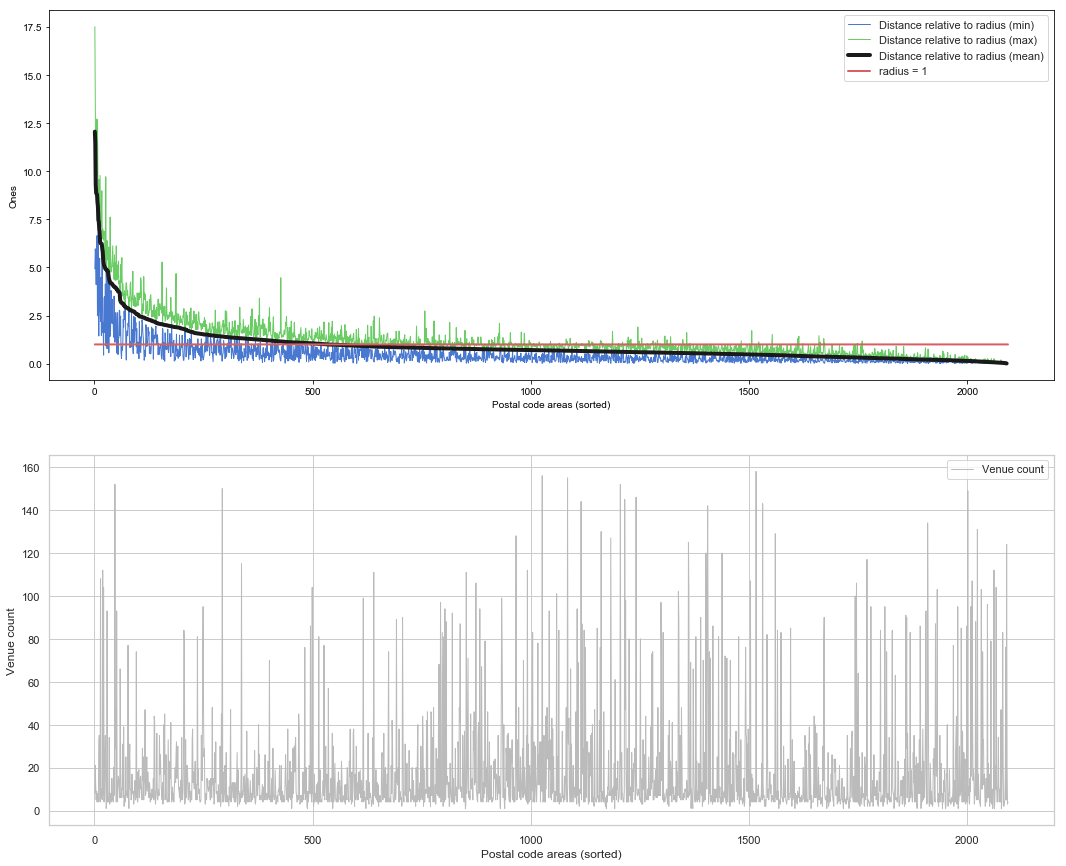

In [34]:
# create the image area and two vertical scales (ax2)

f, axs = plt.subplots(2, 2, figsize=(18,15))
plt.subplot(211)

sns.set(style="whitegrid")
sns.set_color_codes("muted")

legend_style = 'brief'

# draw the min and max with blue and with linewidth=1
sns.set_context("notebook", rc={'lines.linewidth': 1})
sns.lineplot(x="Postal code areas (sorted)", y="Distance relative to radius (min)", data=fs_analysis_df, legend=legend_style, color="b")
sns.lineplot(x="Postal code areas (sorted)", y="Distance relative to radius (max)", data=fs_analysis_df, legend=legend_style, color="g")

# draw the mean with a thicker black line and after the above to ensure it is clearly visible
sns.set_context("notebook", rc={'lines.linewidth': 4})
sns.lineplot(x="Postal code areas (sorted)", y="Distance relative to radius (mean)", data=fs_analysis_df, legend=legend_style, color="k")

# draw the line of value y=1 to show radius level for comparison
sns.set_context("notebook", rc={'lines.linewidth': 2})
sns.lineplot(x="Postal code areas (sorted)", y="Ones", data=fs_analysis_df, legend=legend_style, dashes=True, color="r")

plt.legend(labels=['Distance relative to radius (min)',
                   'Distance relative to radius (max)',
                   'Distance relative to radius (mean)',
                   'radius = 1'])
#plt.legend()

plt.subplot(212)

# first draw on background the count of venues with a light grey color
sns.set_context("notebook", rc={'lines.linewidth': 1})
sns.lineplot(x="Postal code areas (sorted)", y="Venue count", data=fs_analysis_df, legend=legend_style, color="#bbbbbb")
plt.legend(labels=['Venue count'])

plt.savefig("Analysis_1_figure_1.png")
plt.show()


The upper plot shows us that the venue data results from the _explore_ endpoint are not harmfully restricted by the radius parameter of the Foursquare request. That is, despite the radius value many postal code areas have venues mostly further away than the radius parameter of the call.  Even the distance to the closest venues may be longer than the calculated radius for the postal code area, as can be seen from the blue area on the left side of the upper plot.

The lower plot shows us that the amount of result venues varies regardless of the average venue distances from the postal code area center.  It would be a bad sign if all the areas with lots of venues would be on the right side of the plot, where the venues are on average closer than the radius: this could mean that there would be more venues to download, but the limit of 50 blocked us from getting them all.

In addition to the plots, the correlation analysis shows strong correlation between the min, mean and max values over the postal code areas, but a nonexistent correlation between these and the venue count over postal code areas.  This adheres to the plot visualizations.

To summarize this analysis 1, the download choices that were made did not create any observable bias that we can see.  Thus the venue data seems to cover the postal code areas in a representative manner.


### Step 4.2 - Analysis 2: Overlap of venues across postal code areas.

In dense city areas it can be that there are a lot of venues in a small area.  When using Foursquare's explore endpoint, it limits the results to a maximum of 50 result venues.  We tried to overcome this in the downloading process, but now we need to make sure that we succeeded.  Thus, there should not be such gaps that we have received only those venues very close to the postal code area center and would be missing a substantial amount of venus just a bit further.

Because of the way venues were downloaded, it is expected that some venues were returned for more than one postal code area.  For example, if a venue is on the border of two postal code areas, it is likely returned for both postal code areas, at least in areas of less venues.  Thus it exists in our Foursquare data twice, once for each postal code area.  **If we do not find enough this kind of overlap**, it may indicate that we have not downloaded a good enough coverage and we may be missing some venues.


In [35]:
fs_venue_df.head()

PC  PC Latitude  PC Longitude                  Venue Id  \
0  00100        60.17         24.93  4adcdb1ff964a5208b5f21e3   
1  00100        60.17         24.93  4adcdb1ff964a5208d5f21e3   
2  00100        60.17         24.93  4adcdb1ff964a520a65f21e3   
3  00100        60.17         24.93  4adcdb20f964a520ce5f21e3   
4  00100        60.17         24.93  4adcdb20f964a520cf5f21e3   

                     Venue  Venue Latitude  Venue Longitude  \
0  Konditoria Café Briossi           60.17            24.94   
1               Fazer Café           60.17            24.95   
2          Café Strindberg           60.17            24.95   
3                   KuuKuu           60.18            24.93   
4           St. Urho's Pub           60.17            24.93   

            Venue Category  Distance (km)  Appearances  
0                   Bakery           0.74            2  
1                     Café           1.09            2  
2                     Café           1.07            3  
3  Scandinavian Restaurant           0.42            3  
4                 Beer Bar           0.23            3

There area 17702 distinct venues in the dataset.


Venue in # Postal Code areas  Count of such venues  % of such venues
0                             1                  7512             42.44
1                             2                  4768             26.93
2                             3                  3125             17.65
3                             4                  1531              8.65
4                             5                   547              3.09
5                             6                   132              0.75
6                             7                    81              0.46
7                             8                     5              0.03
8                             9                     1              0.01

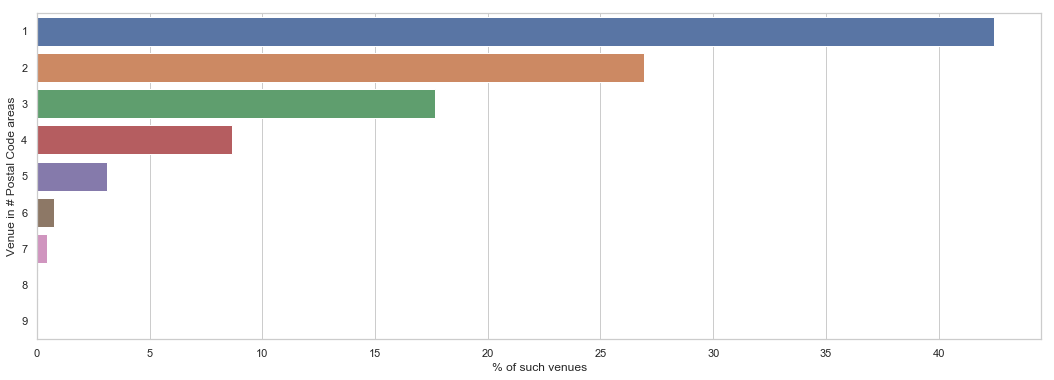

In [36]:
fs_analysis2_step1_df = fs_venue_df[["PC", "Venue Id"]].groupby("Venue Id").count()
fs_analysis2_step2_df = fs_analysis2_step1_df.reset_index().groupby('PC').count().reset_index().rename(columns={'PC':'Venue in # Postal Code areas', 'Venue Id':'Count of such venues'})
fs_distinct_venues = fs_analysis2_step2_df['Count of such venues'].sum()
fs_analysis2_step2_df['% of such venues'] = fs_analysis2_step2_df['Count of such venues'] * 100 / fs_distinct_venues

plt.figure(figsize=(18,6))
#sns.barplot(x='Venue appears in # in Postal Code areas', y='Count of such venues', data=fs_analysis2_1_df)
sns.barplot(x='% of such venues', y='Venue in # Postal Code areas', data=fs_analysis2_step2_df, orient='h')

print("There area {} distinct venues in the dataset.".format(fs_distinct_venues))
fs_analysis2_step2_df

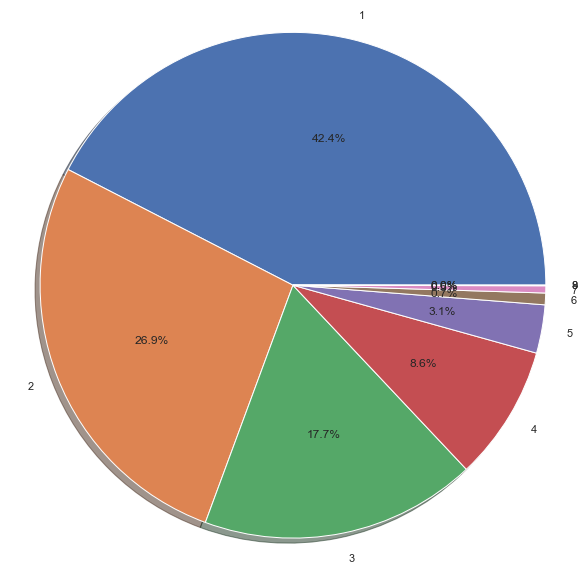

In [37]:
fig1, ax1 = plt.subplots(figsize=(10,10))
#plt.figure(figsize=(10,10))
ax1.pie(fs_analysis2_step2_df['Count of such venues'], labels=fs_analysis2_step2_df['Venue in # Postal Code areas'], autopct='%1.1f%%', shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("Analysis_1_figure_2.png")
plt.show()


Above analysis shows us that:

- in total there are 17 702 distinct venues in our dataset
- less than half of the venues in the dataset are mentioned only by one postal code area.  That is, more than half of the venues are mentioned by at least two postal code areas.

This is a good sign because it is likely that our chosen venue gathering parameters (mainly the radius and then overcoming the limit of results) were successful in providing us a representative result for postal code areas, and likely not many venues were missed.

Next: show statistics on how postal code areas have shared venues with other postal code areas.

In [38]:
fs_venue_df.head()

PC  PC Latitude  PC Longitude                  Venue Id  \
0  00100        60.17         24.93  4adcdb1ff964a5208b5f21e3   
1  00100        60.17         24.93  4adcdb1ff964a5208d5f21e3   
2  00100        60.17         24.93  4adcdb1ff964a520a65f21e3   
3  00100        60.17         24.93  4adcdb20f964a520ce5f21e3   
4  00100        60.17         24.93  4adcdb20f964a520cf5f21e3   

                     Venue  Venue Latitude  Venue Longitude  \
0  Konditoria Café Briossi           60.17            24.94   
1               Fazer Café           60.17            24.95   
2          Café Strindberg           60.17            24.95   
3                   KuuKuu           60.18            24.93   
4           St. Urho's Pub           60.17            24.93   

            Venue Category  Distance (km)  Appearances  
0                   Bakery           0.74            2  
1                     Café           1.09            2  
2                     Café           1.07            3  
3  Scandinavian Restaurant           0.42            3  
4                 Beer Bar           0.23            3

In [39]:
# This shows us how well connected a PC is to its neighboring PCs.
fs_analysis2_step3_df = fs_venue_df[['PC', 'Appearances']].groupby('PC').max()
fs_analysis2_step3_df.rename(columns={'Appearances':"PC's most shared venue's connections"}, inplace=True)
fs_analysis2_step3_df["Venues shared"] = fs_venue_df[fs_venue_df['Appearances'] > 1].groupby('PC').count()[['Appearances']]
fs_analysis2_step3_df['Venues shared'].fillna(0, inplace=True)
fs_analysis2_step3_df["Total venues"] = fs_venue_df.groupby('PC').count()[['Appearances']]
fs_analysis2_step3_df["Venues shared %"] = fs_analysis2_step3_df["Venues shared"] * 100 / fs_analysis2_step3_df["Total venues"]
fs_analysis2_step3_df = fs_analysis2_step3_df.reset_index()

fs_analysis2_step3_df.head()

PC  PC's most shared venue's connections  Venues shared  Total venues  \
0  00100                                     5         139.00           158   
1  00120                                     5         149.00           152   
2  00130                                     5         120.00           127   
3  00140                                     4         119.00           128   
4  00150                                     4         138.00           155   

   Venues shared %  
0            87.97  
1            98.03  
2            94.49  
3            92.97  
4            89.03

In [40]:
fs_analysis2_step3_df.sort_values(["Total venues", "Venues shared"], ascending=False, inplace=True)
fs_analysis2_step3_df['Postal code areas in order by total venues'] = list(range(1, fs_analysis2_step3_df.shape[0] + 1))
fs_analysis2_step3_df.head()

PC  PC's most shared venue's connections  Venues shared  Total venues  \
0    00100                                     5         139.00           158   
7    00180                                     3          77.00           156   
4    00150                                     4         138.00           155   
1    00120                                     5         149.00           152   
834  33680                                     5         133.00           152   

     Venues shared %  Postal code areas in order by total venues  
0              87.97                                           1  
7              49.36                                           2  
4              89.03                                           3  
1              98.03                                           4  
834            87.50                                           5

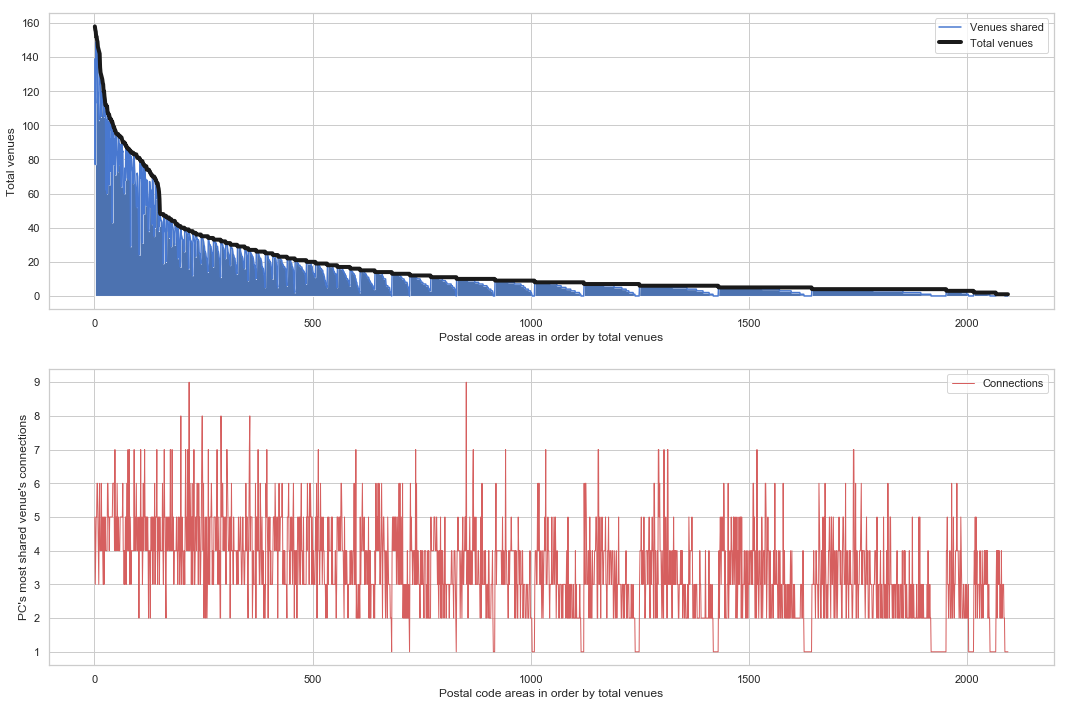

In [41]:
# create the image area and two vertical scales (ax2)

f, axs = plt.subplots(2, 2, figsize=(18,12))
plt.subplot(211)

sns.set(style="whitegrid")
sns.set_color_codes("muted")

legend_style = 'brief'

# draw the min and max with blue and with linewidth=1
#sns.set_context("notebook", rc={'lines.linewidth': 1})
#sns.lineplot(x="Postal code areas (sorted)", y="Distance relative to radius (min)", data=fs_analysis_df, legend=legend_style, color="b")
#sns.lineplot(x="Postal code areas (sorted)", y="Distance relative to radius (max)", data=fs_analysis_df, legend=legend_style, color="g")

sns.lineplot(x="Postal code areas in order by total venues", y="Venues shared", data=fs_analysis2_step3_df, legend=legend_style, color="b")
plt.fill_between(fs_analysis2_step3_df['Postal code areas in order by total venues'], fs_analysis2_step3_df['Venues shared'])
#plt.stackplot(fs_analysis2_step3_df['Total venues'])

# draw the mean with a thicker black line and after the above to ensure it is clearly visible
sns.set_context("notebook", rc={'lines.linewidth': 4})
sns.lineplot(x="Postal code areas in order by total venues", y="Total venues", data=fs_analysis2_step3_df, legend=legend_style, color="k")

# draw the line of value y=1 to show radius level for comparison
#sns.set_context("notebook", rc={'lines.linewidth': 2})
#sns.lineplot(x="Postal code areas (sorted)", y="Ones", data=fs_analysis_df, legend=legend_style, dashes=True, color="r")

plt.legend(labels=['Venues shared',
                   'Total venues'])

plt.subplot(212)

# first draw on background the count of venues with a light grey color
sns.set_context("notebook", rc={'lines.linewidth': 1})
sns.lineplot(x="Postal code areas in order by total venues", y="PC's most shared venue's connections", data=fs_analysis2_step3_df, legend=legend_style, color="r")
plt.legend(labels=['Connections'])

plt.savefig("Analysis_1_figure_3.png")
plt.show()


Above plots tell us how much the venue data is overlapping the postal code area borders.  In the upper plot the black line tells us the number of venues in a postal code area, over all postal code areas sorted to descending order of total venues.  The blue area below the black line tells us how many of that postal code area venues are shared with at least one other postal code area.  Increasing white area below the black line tells that there are venues that exist only for that postal code area.  As we can see, the area below the black line is mainly blue meaning that most postal code areas reach out to same venues with other postal code areas.  This tells us that quite likely we have received all venues that there are to receive.

The lower plot in red tells for each postal code area what is the most shared venue's connection count.  The postal code areas are in same order in the two above plots.  This plot varies quite steadily between 2 and 7 from left to right, showing only slight decreasing tendency.  This is good as it shows that the connectedness of a postal code area to its neighboring postal code areas does not depend very strongly on its total venue count.


As a summary of investigating the Foursquare venue data we can conclude that we have managed to download a good sample of the data, if not absolutely all.  This is good to know as matching together the postal code area shapes, exact borders and the Foursquare venue data API took some assumptions, which left out questions if we have harvested the data well enough.  We have.

### Step 4.3 - Identify the top 20 Finnish cities

Find out the top 20 cities in Finland by population.  See how well it covers whole Finland.

In [42]:
total_city_count = paavo_venues_df[['City', 'Inhabitants, total, 2017 (HE)']].groupby('City').sum().sort_values('Inhabitants, total, 2017 (HE)', ascending=False).reset_index().shape[0]
total_population_in_top20_cities = paavo_venues_df[['City', 'Inhabitants, total, 2017 (HE)']].groupby('City').sum().sort_values('Inhabitants, total, 2017 (HE)', ascending=False).reset_index().iloc[0:20, 1].sum()
total_population_in_Finland = paavo_venues_df[['City', 'Inhabitants, total, 2017 (HE)']].groupby('City').sum().sort_values('Inhabitants, total, 2017 (HE)', ascending=False).reset_index().iloc[:, 1].sum()
print("In Finland there are a total of", total_city_count, " cities or counties.")
print("Population of Finland is {} inhabitants.".format(total_population_in_Finland))
print("Population in top 20 cities + Savonlinna is {} inhabitants, which is {:.2f}% of the finnish population.".format(
    total_population_in_top20_cities, total_population_in_top20_cities * 100 / total_population_in_Finland))


In Finland there are a total of 308  cities or counties.
Population of Finland is 5316668 inhabitants.
Population in top 20 cities + Savonlinna is 2804379 inhabitants, which is 52.75% of the finnish population.


In [43]:
# filter our clustering and further analysis to the top n=20 cities in Finland (plus additional city of Savonlinna)
n = 20
filter_cities = paavo_venues_df.groupby('City').sum().sort_values('Inhabitants, total, 2017 (HE)', ascending=False).reset_index().iloc[0:n, 0].tolist()
filter_cities.append('Savonlinna')
print("Filter for {} cities: {}".format(len(filter_cities), filter_cities))


Filter for 21 cities: ['Helsinki', 'Espoo', 'Tampere', 'Vantaa', 'Oulu', 'Turku', 'Jyväskylä', 'Kuopio', 'Lahti', 'Pori', 'Kouvola', 'Joensuu', 'Lappeenranta', 'Vaasa', 'Hämeenlinna', 'Seinäjoki', 'Rovaniemi', 'Mikkeli', 'Kotka', 'Salo', 'Savonlinna']


### Step 4.4 - Analysis 3: Cluster postal code areas of top20 cities

To prepare for the clustering, we first need to standardise the data.

#### Step 4.4.1 - Standardize the data & cluster

In [44]:

# first standardize data
bare_clustering_df = standardize_df(paavo_venues_df[paavo_venues_df['City'].isin(filter_cities)])

# CLUSTER !!!
k, clusters, cluster_tests = get_KMeans_clusters_with_best_k(bare_clustering_df)


Standardizing dataframe of shape (677, 577)
removing column: PC
removing column: PC Name
removing column: City
removing column: PC Longitude
removing column: PC Latitude
removing column: X coordinate in metres
removing column: Y coordinate in metres
Returning standardized dataframe of shape (677, 570)
cluster count:  2, cluster sizes (sorted by size): [536, 141]
cluster count:  3, cluster sizes (sorted by size): [511, 149, 17]
cluster count:  4, cluster sizes (sorted by size): [440, 191, 42, 4]
cluster count:  5, cluster sizes (sorted by size): [320, 204, 71, 63, 19]
cluster count:  6, cluster sizes (sorted by size): [472, 111, 74, 10, 9, 1]
cluster count:  7, cluster sizes (sorted by size): [314, 223, 106, 21, 10, 2, 1]
cluster count:  8, cluster sizes (sorted by size): [309, 213, 76, 62, 13, 2, 1, 1]
cluster count:  9, cluster sizes (sorted by size): [449, 138, 64, 20, 2, 1, 1, 1, 1]
cluster count: 10, cluster sizes (sorted by size): [323, 201, 87, 29, 25, 5, 3, 2, 1, 1]
cluster coun

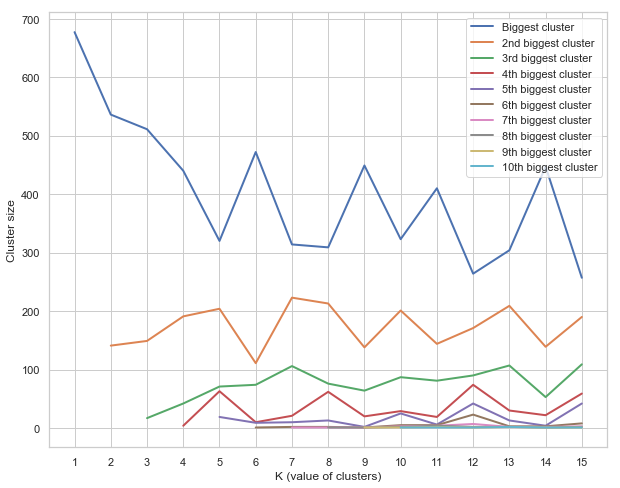

In [45]:
plot_clustering_tests(cluster_tests, 'Analysis_3_figure_1.png')

#### Step 4.4.3 - Store clusters back to base data

Add clusters of each postal code back into the data that was used as source.

We want to rename the clusters in numbers in order so that the biggest cluster is 1, second biggest is 2 and so on.  This takes away any variance that appears to happen
if we run the clustering many times: cluster sizes stay, but the id's do not stay constant.  This relabeling is taken care of in the *merge_clusters_back_to_data* function. 

In [46]:

# Add the cluster ids back to the source data
paavo_venues_df = merge_clusters_back_to_data(paavo_venues_df['City'].isin(filter_cities), paavo_venues_df, 'PC', clusters, k, 'PC cluster')

# sort columns to have it seen more easily
paavo_venues_df = paavo_venues_df[list_order_to_top(['PC', 'PC Name', 'City', 'PC cluster'], paavo_venues_df.columns.tolist())]

paavo_venues_df.head()


PC                        PC Name      City  PC cluster  Surface area  \
0  00100  Helsinki Keskusta - Etu-Töölö  Helsinki           5          2.35   
1  00120                      Punavuori  Helsinki           5          0.41   
2  00130                Kaartinkaupunki  Helsinki           5          0.43   
3  00140       Kaivopuisto - Ullanlinna  Helsinki           5          0.93   
4  00150              Eira - Hernesaari  Helsinki           5          1.37   

   Inhabitants, total, 2017 (HE)  Inhabitants per km2  Venues Total  \
0                          18284             7,769.59           158   
1                           7108            17,168.67           152   
2                           1508             3,515.48           127   
3                           7865             8,440.28           128   
4                           9496             6,944.93           155   

   Inhabitants per venue  Cafes Total  ...  Whisky Bar  Windmill  Wine Bar  \
0                 115.72           36  ...           0         0         6   
1                  46.76           35  ...           0         0         7   
2                  11.87           32  ...           0         0         2   
3                  61.45           25  ...           0         0         1   
4                  61.26           37  ...           0         0         3   

   Wine Shop  Winery  Wings Joint  Women's Store  Yoga Studio  Zoo  \
0          1       0            0              0            2    0   
1          0       0            0              0            1    0   
2          0       0            0              0            0    0   
3          0       0            0              0            0    0   
4          0       0            0              0            1    0   

   Zoo Exhibit  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 578 columns]

In [47]:
paavo_venues_df.shape

(2093, 578)

### Step 4.5 - Summarize PC clusters 

Summarize the postal code areas by their cluster values.


In [48]:
paavo_venues_df.iloc[:5, :20]

PC                        PC Name      City  PC cluster  Surface area  \
0  00100  Helsinki Keskusta - Etu-Töölö  Helsinki           5          2.35   
1  00120                      Punavuori  Helsinki           5          0.41   
2  00130                Kaartinkaupunki  Helsinki           5          0.43   
3  00140       Kaivopuisto - Ullanlinna  Helsinki           5          0.93   
4  00150              Eira - Hernesaari  Helsinki           5          1.37   

   Inhabitants, total, 2017 (HE)  Inhabitants per km2  Venues Total  \
0                          18284             7,769.59           158   
1                           7108            17,168.67           152   
2                           1508             3,515.48           127   
3                           7865             8,440.28           128   
4                           9496             6,944.93           155   

   Inhabitants per venue  Cafes Total  Inhabitants per cafe  \
0                 115.72           36                507.89   
1                  46.76           35                203.09   
2                  11.87           32                 47.12   
3                  61.45           25                314.60   
4                  61.26           37                256.65   

   Restaurants Total  Inhabitants per restaurant  PC Longitude  PC Latitude  \
0                 42                      435.33         24.93        60.17   
1                 44                      161.55         24.94        60.16   
2                 42                       35.90         24.95        60.16   
3                 42                      187.26         24.95        60.16   
4                 40                      237.40         24.93        60.16   

   X coordinate in metres  Y coordinate in metres  Females, 2017 (HE)  \
0                  385114                 6672391                9613   
1                  385614                 6671378                3751   
2                  386228                 6671492                 772   
3                  386410                 6670742                4277   
4                  385235                 6670549                5129   

   Males, 2017 (HE)  Average age of inhabitants, 2017 (HE)  
0              8671                                     41  
1              3357                                     40  
2               736                                     41  
3              3588                                     41  
4              4367                                     40

In [49]:
# These columns are interesting to check quickly in summaries.  Create more of these sorted columns as needed.
columns_interesting = [
    'Surface area', 'Inhabitants, total, 2017 (HE)', 'Venues Total', 'Cafes Total', 'Restaurants Total',
    'Average age of inhabitants, 2017 (HE)', 'With education, total, 2017 (KO)', 'Academic degree - Higher level university degree, 2017 (KO)',
    'Average income of inhabitants, 2016 (HR)', 'Median income of inhabitants, 2016 (HR)',
    'Average size of households, 2017 (TE)', 'Average income of households, 2016 (TR)', 'Median income of households, 2016 (TR)',
    'Free-time residences, 2017 (RA)', 'Average floor area, 2017 (RA)', 'Workplaces, 2016 (TP)', 'Primary production, 2016 (TP)', 'Processing, 2016 (TP)',
    'Services, 2016 (TP)', 'Employed, 2016 (PT)', 'Unemployed, 2016 (PT)', 'Students, 2016 (PT)', 'Pensioners, 2016 (PT)'
]

# To create summaries, some columns are better summed up, while others are better for taking the average (mean).
# Create summaries with summing up the grouping, then replace the resulting dataframe's following fields from another
# grouping which has been used to take the average of column.
columns_summary_by_mean = [
    'Average age of inhabitants, 2017 (HE)', 'Average income of inhabitants, 2016 (HR)', 'Median income of inhabitants, 2016 (HR)',
    'Average size of households, 2017 (TE)', 'Average income of households, 2016 (TR)', 'Median income of households, 2016 (TR)',
    'Average floor area, 2017 (RA)'
]


In [50]:
pc_clusters_summary_df = create_summary_df(paavo_venues_df, 'PC cluster', 'PC cluster', True)
# add cluster count
pc_clusters_summary_df['PC cluster count'] = paavo_venues_df.groupby('PC cluster').count().iloc[:,0]
pc_clusters_summary_df = pc_clusters_summary_df[list_order_to_top(['PC cluster', 'PC cluster count'], pc_clusters_summary_df.columns.tolist())]
pc_clusters_summary_df[['PC cluster', 'PC cluster count'] + columns_interesting]
pc_clusters_summary_df.iloc[:,:20]

PC cluster  PC cluster count  Surface area  Inhabitants, total, 2017 (HE)  \
0           0              1416    162,443.11                        2479758   
1           1               320     24,709.59                         352310   
2           2               204      3,865.58                        1021772   
3           3                71      1,113.90                         941736   
4           4                63      1,762.63                         355671   
5           5                19        221.30                         165421   

   Inhabitants per km2  Venues Total  Inhabitants per venue  Cafes Total  \
0           114,343.99         15467             262,202.65         1079   
1            72,219.61          3539              46,160.07          203   
2           265,303.34          5088              60,300.51          245   
3           175,260.90          4523              26,155.67          671   
4           143,147.96          5509               4,286.22          940   
5           135,594.67          2564               1,193.37          614   

   Inhabitants per cafe  Restaurants Total  Inhabitants per restaurant  \
0                   inf               2952                         inf   
1                   inf                527                         inf   
2                   inf                885                         inf   
3                   inf               1402                         inf   
4             45,064.29               1867                   14,065.05   
5              5,074.02                704                    4,498.10   

   PC Longitude  PC Latitude  X coordinate in metres  Y coordinate in metres  \
0     35,040.84    88,120.80               540115083              9776259649   
1      8,323.69    19,813.35               143144188              2197558476   
2      5,110.96    12,546.13                80746095              1391543510   
3      1,760.89     4,335.16                27034074               480831836   
4      1,573.91     3,879.67                24682982               430342010   
5        467.00     1,151.35                 6991899               127688923   

   Females, 2017 (HE)  Males, 2017 (HE)  \
0             1246155           1233603   
1              175000            177310   
2              521726            500046   
3              492636            449100   
4              186411            169260   
5               87612             77809   

   Average age of inhabitants, 2017 (HE)  0-2 years, 2017 (HE)  \
0                                  44.74                 70187   
1                                  43.91                 10096   
2                                  40.44                 32860   
3                                  40.38                 29543   
4                                  40.68                 10092   
5                                  41.74                  3806   

   3-6 years, 2017 (HE)  
0                112527  
1                 16035  
2                 47862  
3                 40041  
4                 13763  
5                  4144

In [51]:
pc_clusters_summary_df = drop_relative_metrics(pc_clusters_summary_df)
pc_clusters_summary_df = add_relative_metrics(pc_clusters_summary_df)

additional_relative_metrics_for_pc_cluster_summary = [
    ['Average area per PC (km2)', 'Surface area', 'PC cluster count'],
    ['Average inhabitants per PC', 'Inhabitants, total, 2017 (HE)', 'PC cluster count'],
    ['Average Cafes per PC', 'Cafes Total', 'PC cluster count'],
    ['Average Restaurants per PC', 'Restaurants Total', 'PC cluster count']
]

pc_clusters_summary_df = drop_relative_metrics(pc_clusters_summary_df, additional_relative_metrics_for_pc_cluster_summary)
pc_clusters_summary_df = add_relative_metrics(pc_clusters_summary_df, additional_relative_metrics_for_pc_cluster_summary)

pc_clusters_summary_df.iloc[1:,:15]

#add_top_venues_into_df(num_top_venues, src_df, src_cols, merge_key, insert_loc):

PC cluster  PC cluster count  Surface area  Average area per PC (km2)  \
1           1               320     24,709.59                      77.22   
2           2               204      3,865.58                      18.95   
3           3                71      1,113.90                      15.69   
4           4                63      1,762.63                      27.98   
5           5                19        221.30                      11.65   

   Inhabitants, total, 2017 (HE)  Average inhabitants per PC  \
1                         352310                    1,100.97   
2                        1021772                    5,008.69   
3                         941736                   13,263.89   
4                         355671                    5,645.57   
5                         165421                    8,706.37   

   Inhabitants per km2  Venues Total  Inhabitants per venue  Cafes Total  \
1                14.26          3539                  99.55          203   
2               264.33          5088                 200.82          245   
3               845.44          4523                 208.21          671   
4               201.78          5509                  64.56          940   
5               747.49          2564                  64.52          614   

   Average Cafes per PC  Inhabitants per cafe  Restaurants Total  \
1                  0.63              1,735.52                527   
2                  1.20              4,170.50                885   
3                  9.45              1,403.48               1402   
4                 14.92                378.37               1867   
5                 32.32                269.42                704   

   Average Restaurants per PC  Inhabitants per restaurant  
1                        1.65                      668.52  
2                        4.34                    1,154.54  
3                       19.75                      671.71  
4                       29.63                      190.50  
5                       37.05                      234.97

### Step 4.6 - Summarize cities (top 20)

Create city level summaries of the postal code areas within the cities.

In [52]:
city_summary_df = create_summary_df(paavo_venues_df, 'City', 'Inhabitants, total, 2017 (HE)', False)

# drop this 'PC cluster' column as it doesn't mean anything in the summary.
city_summary_columns = city_summary_df.columns.tolist()
if 'PC cluster' in city_summary_columns:
    city_summary_columns.remove('PC cluster')
city_summary_df = city_summary_df[city_summary_columns]

# redo the relative metrics, as grouping and summarizing messed them up...
city_summary_df = drop_relative_metrics(city_summary_df)
city_summary_df = add_relative_metrics(city_summary_df)

columns_city_interesting = [
    'Surface area', 'Inhabitants, total, 2017 (HE)', 'Venues Total', 'Cafes Total', 'Restaurants Total',
    'Average age of inhabitants, 2017 (HE)', 'With education, total, 2017 (KO)', 'Academic degree - Higher level university degree, 2017 (KO)',
    'Average income of inhabitants, 2016 (HR)',
    'Average size of households, 2017 (TE)', 'Average income of households, 2016 (TR)',
    'Free-time residences, 2017 (RA)', 'Average floor area, 2017 (RA)', 'Workplaces, 2016 (TP)', 'Employed, 2016 (PT)', 'Unemployed, 2016 (PT)', 'Students, 2016 (PT)', 'Pensioners, 2016 (PT)'
]

city_summary_df[['City'] + columns_city_interesting].head(20)

City  Surface area  Inhabitants, total, 2017 (HE)  Venues Total  \
0       Helsinki        213.17                         628760          5347   
1          Espoo        355.41                         273029          2078   
2        Tampere        753.11                         223117          1750   
3         Vantaa        239.87                         215273          1359   
4           Oulu      2,613.83                         199340          1073   
5          Turku        293.88                         188966          1395   
6      Jyväskylä      1,307.83                         139297           831   
7         Kuopio      3,733.02                         115608           778   
8          Lahti        466.25                         112303           769   
9           Pori      1,162.82                          83485           465   
10       Kouvola      2,417.53                          79235           580   
11       Joensuu      1,675.46                          71126           446   
12  Lappeenranta      1,402.58                          66189           812   
13         Vaasa        340.22                          65928           379   
14   Hämeenlinna      1,868.45                          65860           448   
15     Seinäjoki      1,356.67                          61880           594   
16     Rovaniemi      4,119.55                          59330           405   
17       Mikkeli      2,733.29                          52750           448   
18         Kotka        213.01                          52115           309   
19          Salo      1,834.74                          50788           513   

    Cafes Total  Restaurants Total  Average age of inhabitants, 2017 (HE)  \
0           838               1417                                  40.27   
1           246                526                                  38.04   
2           266                421                                  41.59   
3           129                272                                  38.71   
4           103                305                                  38.18   
5           238                375                                  41.85   
6           116                211                                  39.28   
7            61                172                                  43.44   
8            93                215                                  42.31   
9            29                104                                  44.90   
10           52                126                                  46.68   
11           52                120                                  43.33   
12          111                214                                  43.33   
13           49                104                                  40.08   
14           55                111                                  43.48   
15           42                207                                  41.45   
16           28                123                                  40.96   
17           49                 72                                  45.39   
18           13                 45                                  43.81   
19           73                119                                  46.00   

    With education, total, 2017 (KO)  \
0                             405319   
1                             166765   
2                             150606   
3                             122147   
4                             127457   
5                             124311   
6                              92484   
7                              76197   
8                              67908   
9                              51703   
10                             48073   
11                             47199   
12                             41403   
13                             41923   
14                             40711   
15                             39115   
16                             38620   
17            

In [53]:
city_summary_df.loc[:20,:]

City  Surface area  Inhabitants, total, 2017 (HE)  \
0       Helsinki        213.17                         628760   
1          Espoo        355.41                         273029   
2        Tampere        753.11                         223117   
3         Vantaa        239.87                         215273   
4           Oulu      2,613.83                         199340   
5          Turku        293.88                         188966   
6      Jyväskylä      1,307.83                         139297   
7         Kuopio      3,733.02                         115608   
8          Lahti        466.25                         112303   
9           Pori      1,162.82                          83485   
10       Kouvola      2,417.53                          79235   
11       Joensuu      1,675.46                          71126   
12  Lappeenranta      1,402.58                          66189   
13         Vaasa        340.22                          65928   
14   Hämeenlinna      1,868.45                          65860   
15     Seinäjoki      1,356.67                          61880   
16     Rovaniemi      4,119.55                          59330   
17       Mikkeli      2,733.29                          52750   
18         Kotka        213.01                          52115   
19          Salo      1,834.74                          50788   
20        Porvoo        631.94                          49684   

    Inhabitants per km2  Venues Total  Inhabitants per venue  Cafes Total  \
0              2,949.61          5347                 117.59          838   
1                768.21          2078                 131.39          246   
2                296.26          1750                 127.50          266   
3                897.47          1359                 158.41          129   
4                 76.26          1073                 185.78          103   
5                643.01          1395                 135.46          238   
6                106.51           831                 167.63          116   
7                 30.97           778                 148.60           61   
8                240.86           769                 146.04           93   
9                 71.80           465                 179.54           29   
10                32.78           580                 136.61           52   
11                42.45           446                 159.48           52   
12                47.19           812                  81.51          111   
13               193.78           379                 173.95           49   
14                35.25           448                 147.01           55   
15                45.61           594                 104.18           42   
16                14.40           405                 146.49           28   
17                19.30           448                 117.75           49   
18               244.66           309                 168.66           13   
19                27.68           513                  99.00           73   
20                78.62           503                  98.78           81   

    Inhabitants per cafe  Restaurants Total  Inhabitants per restaurant  ...  \
0                 750.31               1417                      443.73  ...   
1               1,109.87                526                      519.07  ...   
2                 838.79                421                      529.97  ...   
3               1,668.78                272                      791.44  ...   
4               1,935.34                305                      653.57  ...   
5                 793.97                375                      503.91  ...   
6               1,200.84                211                      660.18  ...   
7               1,895.21                172                      672.14  ...   
8               1,207.56                215                      522.34  ...   
9               2,878.79                104                      802.74  ...   
10    

### Step 4.7 - Analysis 6: Cluster cities (top 20 & all)

Cluster the cities themselves directly.  Use the city level summaries of their postal code areas as units to cluster.

First cluster the top 20 cities

In [54]:
# first standardize data
bare_clustering_df = standardize_df(city_summary_df[city_summary_df['City'].isin(filter_cities)])

# CLUSTER !!!
k, clusters, cluster_tests = get_KMeans_clusters_with_best_k(bare_clustering_df, 2, 3)


Standardizing dataframe of shape (21, 575)
removing column: City
removing column: PC Longitude
removing column: PC Latitude
removing column: X coordinate in metres
removing column: Y coordinate in metres
Returning standardized dataframe of shape (21, 570)
cluster count:  2, cluster sizes (sorted by size): [20, 1]
cluster count:  3, cluster sizes (sorted by size): [15, 5, 1]
cluster count:  4, cluster sizes (sorted by size): [15, 4, 1, 1]
cluster count:  5, cluster sizes (sorted by size): [14, 4, 1, 1, 1]
cluster count:  6, cluster sizes (sorted by size): [15, 2, 1, 1, 1, 1]
cluster count:  7, cluster sizes (sorted by size): [15, 1, 1, 1, 1, 1, 1]
cluster count:  8, cluster sizes (sorted by size): [13, 2, 1, 1, 1, 1, 1, 1]
cluster count:  9, cluster sizes (sorted by size): [13, 1, 1, 1, 1, 1, 1, 1, 1]
cluster count: 10, cluster sizes (sorted by size): [11, 2, 1, 1, 1, 1, 1, 1, 1, 1]
cluster count: 11, cluster sizes (sorted by size): [11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
cluster count: 12, 

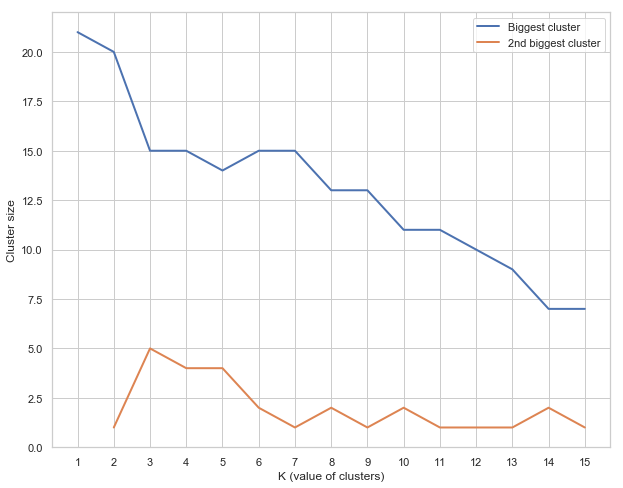

In [55]:

plot_clustering_tests(cluster_tests, 'Analysis_6_figure_1.png')

In [56]:
# Add the cluster ids back to the source data
city_summary_df = merge_clusters_back_to_data(city_summary_df['City'].isin(filter_cities), city_summary_df, 'City', clusters, k, 'City20 cluster')

# sort columns to have it seen more easily
city_summary_df = city_summary_df[list_order_to_top(['City', 'City20 cluster'], city_summary_df.columns.tolist())]

city_summary_df.head()


City  City20 cluster  Surface area  Inhabitants, total, 2017 (HE)  \
0  Helsinki               3        213.17                         628760   
1     Espoo               2        355.41                         273029   
2   Tampere               2        753.11                         223117   
3    Vantaa               2        239.87                         215273   
4      Oulu               2      2,613.83                         199340   

   Inhabitants per km2  Venues Total  Inhabitants per venue  Cafes Total  \
0             2,949.61          5347                 117.59          838   
1               768.21          2078                 131.39          246   
2               296.26          1750                 127.50          266   
3               897.47          1359                 158.41          129   
4                76.26          1073                 185.78          103   

   Inhabitants per cafe  Restaurants Total  ...  Whisky Bar  Windmill  \
0                750.31               1417  ...        1.00      0.00   
1              1,109.87                526  ...        0.00      0.00   
2                838.79                421  ...        0.00      0.00   
3              1,668.78                272  ...        3.00      0.00   
4              1,935.34                305  ...        0.00      0.00   

   Wine Bar  Wine Shop  Winery  Wings Joint  Women's Store  Yoga Studio  Zoo  \
0     33.00      11.00    0.00         0.00           7.00        11.00 4.00   
1      3.00       1.00    0.00         1.00           0.00         4.00 0.00   
2      1.00       2.00    0.00        11.00           0.00         0.00 0.00   
3      6.00       0.00    0.00         0.00           0.00         3.00 0.00   
4      2.00       0.00    0.00         0.00           2.00         0.00 0.00   

   Zoo Exhibit  
0         0.00  
1         0.00  
2         0.00  
3         0.00  
4         0.00  

[5 rows x 576 columns]

Then cluster all cities:

Standardizing dataframe of shape (308, 576)
removing column: City
removing column: PC Longitude
removing column: PC Latitude
removing column: X coordinate in metres
removing column: Y coordinate in metres
Returning standardized dataframe of shape (308, 571)
cluster count:  2, cluster sizes (sorted by size): [307, 1]
cluster count:  3, cluster sizes (sorted by size): [299, 8, 1]
cluster count:  4, cluster sizes (sorted by size): [283, 20, 4, 1]
cluster count:  5, cluster sizes (sorted by size): [282, 20, 4, 1, 1]
cluster count:  6, cluster sizes (sorted by size): [283, 16, 6, 1, 1, 1]
cluster count:  7, cluster sizes (sorted by size): [286, 16, 2, 1, 1, 1, 1]
cluster count:  8, cluster sizes (sorted by size): [280, 22, 1, 1, 1, 1, 1, 1]
cluster count:  9, cluster sizes (sorted by size): [281, 20, 1, 1, 1, 1, 1, 1, 1]
cluster count: 10, cluster sizes (sorted by size): [277, 21, 3, 1, 1, 1, 1, 1, 1, 1]
cluster count: 11, cluster sizes (sorted by size): [284, 13, 2, 2, 1, 1, 1, 1, 1, 1, 1]

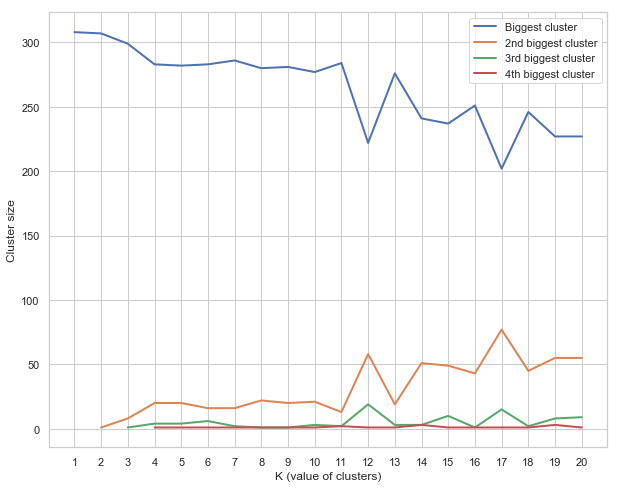

In [57]:
# first standardize data
bare_clustering_df = standardize_df(city_summary_df)

# CLUSTER !!!
k, clusters, cluster_tests = get_KMeans_clusters_with_best_k(bare_clustering_df, search_upper_limit=20)

plot_clustering_tests(cluster_tests, 'Analysis_6_figure_2.png')

In [58]:
k, clusters, cluster_tests = get_KMeans_clusters_with_best_k(bare_clustering_df, force_k = 17, find_best = False)

 *** NOTICE: User forced k = 17


Clustered 308 postal code areas into 17 clusters.



In [59]:
# Add the cluster ids back to the source data
all_true_filter = np.ones(city_summary_df.shape[0], dtype=bool)
city_summary_df = merge_clusters_back_to_data(all_true_filter, city_summary_df, 'City', clusters, k, 'City_all cluster')

# sort columns to have it seen more easily
city_summary_df = city_summary_df[list_order_to_top(['City', 'City_all cluster'], city_summary_df.columns.tolist())]

city_summary_df.head()


City  City_all cluster  City20 cluster  Surface area  \
0  Helsinki                12               3        213.17   
1     Espoo                10               2        355.41   
2   Tampere                 6               2        753.11   
3    Vantaa                15               2        239.87   
4      Oulu                11               2      2,613.83   

   Inhabitants, total, 2017 (HE)  Inhabitants per km2  Venues Total  \
0                         628760             2,949.61          5347   
1                         273029               768.21          2078   
2                         223117               296.26          1750   
3                         215273               897.47          1359   
4                         199340                76.26          1073   

   Inhabitants per venue  Cafes Total  Inhabitants per cafe  ...  Whisky Bar  \
0                 117.59          838                750.31  ...        1.00   
1                 131.39          246              1,109.87  ...        0.00   
2                 127.50          266                838.79  ...        0.00   
3                 158.41          129              1,668.78  ...        3.00   
4                 185.78          103              1,935.34  ...        0.00   

   Windmill  Wine Bar  Wine Shop  Winery  Wings Joint  Women's Store  \
0      0.00     33.00      11.00    0.00         0.00           7.00   
1      0.00      3.00       1.00    0.00         1.00           0.00   
2      0.00      1.00       2.00    0.00        11.00           0.00   
3      0.00      6.00       0.00    0.00         0.00           0.00   
4      0.00      2.00       0.00    0.00         0.00           2.00   

   Yoga Studio  Zoo  Zoo Exhibit  
0        11.00 4.00         0.00  
1         4.00 0.00         0.00  
2         0.00 0.00         0.00  
3         3.00 0.00         0.00  
4         0.00 0.00         0.00  

[5 rows x 577 columns]

In [60]:
city_summary_df[city_summary_df['City_all cluster'] == 2].iloc[:15,:15]

City  City_all cluster  City20 cluster  Surface area  \
25   Nurmijärvi                 2               0        391.54   
26  Kirkkonummi                 2               0        405.01   
27    Järvenpää                 2               0         47.01   
28        Rauma                 2               0        411.42   
30       Kerava                 2               0         33.32   
31      Kaarina                 2               0        152.26   
32        Nokia                 2               0        326.07   
34    Kangasala                 2               0        756.54   
35     Ylöjärvi                 2               0        942.49   
36        Vihti                 2               0        542.39   
37      Hollola                 2               0        650.61   
38       Imatra                 2               0        274.55   
40    Riihimäki                 2               0        172.29   
41     Lempäälä                 2               0        313.32   
42    Sastamala                 2               0      1,540.22   

    Inhabitants, total, 2017 (HE)  Inhabitants per km2  Venues Total  \
25                          41196               105.21           139   
26                          38905                96.06           241   
27                          38749               824.32           174   
28                          38409                93.36           204   
30                          35349             1,060.98           138   
31                          33084               217.29           201   
32                          32930               100.99           182   
34                          30857                40.79           156   
35                          30573                32.44           139   
36                          28902                53.29           147   
37                          28740                44.17           123   
38                          27783               101.19           270   
40                          27034               156.91           175   
41                          26654                85.07           171   
42                          24620                15.98           169   

    Inhabitants per venue  Cafes Total  Inhabitants per cafe  \
25                 296.37           12              3,433.00   
26                 161.43            9              4,322.78   
27                 222.70           16              2,421.81   
28                 188.28           21              1,829.00   
30                 256.15            4              8,837.25   
31                 164.60           11              3,007.64   
32                 180.93            7              4,704.29   
34                 197.80            9              3,428.56   
35                 219.95           10              3,057.30   
36                 196.61           11              2,627.45   
37                 233.66           11              2,612.73   
38                 102.90           25              1,111.32   
40                 154.48           19              1,422.84   
41                 155.87           12              2,221.17   
42                 145.68           16              1,538.75   

    Restaurants Total  Inhabitants per restaurant  PC Longitude  PC Latitude  \
25                 22                    1,872.55        297.02       725.34   
26                 24                    1,621.04        366.88       902.27   
27                 40                      968.73        125.48       302.38   
28                 56                      685.88        323.74       916.54   
30                 39                      906.38        125.57       302.00   
31                 55                      601.53        112.06       302.08   
32                 32                    1,029.06        210.65       553.21   
34                 27                    1,142.85        338.80       860.65   
35                 19                   

In [61]:
city_summary_df.groupby('City_all cluster').mean().iloc[:3,:]

City20 cluster  Surface area  Inhabitants, total, 2017 (HE)  \
City_all cluster                                                                
1                           0.00        521.34                       4,214.97   
2                           0.00        630.48                      17,118.81   
3                           0.60      1,546.22                      55,958.53   

                  Inhabitants per km2  Venues Total  Inhabitants per venue  \
City_all cluster                                                             
1                               22.77         23.44                 207.42   
2                               94.51        105.68                 176.24   
3                               72.81        409.40                 138.33   

                  Cafes Total  Inhabitants per cafe  Restaurants Total  \
City_all cluster                                                         
1                        1.31                   inf               3.28   
2                        7.29                   inf              21.21   
3                       40.33              1,707.48             100.13   

                  Inhabitants per restaurant  ...  Whisky Bar  Windmill  \
City_all cluster                              ...                         
1                                        inf  ...        0.00      0.00   
2                                   1,104.88  ...        0.03      0.00   
3                                     595.74  ...        0.00      0.00   

                  Wine Bar  Wine Shop  Winery  Wings Joint  Women's Store  \
City_all cluster                                                            
1                     0.00       0.05    0.00         0.02           0.01   
2                     0.03       0.10    0.09         0.05           0.17   
3                     0.60       0.27    0.07         0.47           0.27   

                  Yoga Studio  Zoo  Zoo Exhibit  
City_all cluster                                 
1                        0.00 0.04         0.02  
2                        0.00 0.10         0.00  
3                        0.20 0.13         0.00  

[3 rows x 575 columns]

### Step 4.7 - calculate top10 venues for summaries

#### 4.7.1 - Top 10 venues per city

In [62]:
top_venues = 10
top10_cols, city_summary_df = add_top_venues_into_df(top_venues, city_summary_df, fs_venue_category_list, 'City', 11)
city_summary_df[['City', 'Venues Total', 'Cafes Total', 'Restaurants Total'] + top10_cols].head(20)

City  Venues Total  Cafes Total  Restaurants Total  \
0       Helsinki          5347          838               1417   
1          Espoo          2078          246                526   
2        Tampere          1750          266                421   
3         Vantaa          1359          129                272   
4           Oulu          1073          103                305   
5          Turku          1395          238                375   
6      Jyväskylä           831          116                211   
7         Kuopio           778           61                172   
8          Lahti           769           93                215   
9           Pori           465           29                104   
10       Kouvola           580           52                126   
11       Joensuu           446           52                120   
12  Lappeenranta           812          111                214   
13         Vaasa           379           49                104   
14   Hämeenlinna           448           55                111   
15     Seinäjoki           594           42                207   
16     Rovaniemi           405           28                123   
17       Mikkeli           448           49                 72   
18         Kotka           309           13                 45   
19          Salo           513           73                119   

   Most Common Venue #1     Most Common Venue #2  Most Common Venue #3  \
0                  Café                      Bar              Bus Stop   
1              Bus Stop                     Café           Pizza Place   
2                  Café                 Bus Stop                   Bar   
3              Bus Stop            Grocery Store           Pizza Place   
4                  Café            Grocery Store           Pizza Place   
5                  Café                      Bar            Restaurant   
6                  Café              Pizza Place         Grocery Store   
7         Grocery Store                     Café           Pizza Place   
8                  Café              Supermarket         Grocery Store   
9         Grocery Store              Supermarket                  Café   
10          Supermarket                     Café         Grocery Store   
11                  Bar                     Café           Supermarket   
12                 Café              Pizza Place                   Bar   
13                 Café            Grocery Store           Pizza Place   
14                 Café              Pizza Place           Supermarket   
15          Pizza Place                      Bar  Fast Food Restaurant   
16                Hotel  Scandinavian Restaurant         Grocery Store   
17                 Café            Grocery Store            Restaurant   
18          Pizza Place          Harbor / Marina           Supermarket   
19                 Café            Grocery Store            Restaurant   

       Most Common Venue #4     Most Common Venue #5    Most Common Venue #6  \
0               Pizza Place              Coffee Shop              Restaurant   
1             Grocery Store              Coffee Shop               Cafeteria   
2               Pizza Place                      Pub              Restaurant   
3                      Café                Cafeteria             Supermarket   
4      Fast Food Restaurant                      Bar             Supermarket   
5               Pizza Place            Grocery Store    Fast Food Restaurant   
6                       Pub  Scandinavian Restaurant             Supermarket   
7               Supermarket                    Hotel                     Bar   
8                       Bar              Pizza Place              Restaurant   
9               Pizza Place     Fast Food Restaurant                     Gym   
10              Pizza Place     Fast Food Restaurant                     Bar   
11              Pizza Place               Restaurant           Grocery Store   
12              Supermarket   

#### 4.7.2 - Top 10 venues per postal code area

In [63]:
top10_cols, paavo_venues_df = add_top_venues_into_df(top_venues, paavo_venues_df, fs_venue_category_list, 'PC', 13)

In [64]:

paavo_venues_df[['PC', 'City', 'PC cluster', 'Venues Total', 'Cafes Total', 'Restaurants Total'] + top10_cols].head()

PC      City  PC cluster  Venues Total  Cafes Total  Restaurants Total  \
0  00100  Helsinki           5           158           36                 42   
1  00120  Helsinki           5           152           35                 44   
2  00130  Helsinki           5           127           32                 42   
3  00140  Helsinki           5           128           25                 42   
4  00150  Helsinki           5           155           37                 40   

  Most Common Venue #1 Most Common Venue #2     Most Common Venue #3  \
0                 Café          Coffee Shop  Scandinavian Restaurant   
1                 Café          Coffee Shop             Cocktail Bar   
2          Coffee Shop                 Café  Scandinavian Restaurant   
3                 Café          Coffee Shop  Scandinavian Restaurant   
4                 Café                  Bar              Coffee Shop   

      Most Common Venue #4 Most Common Venue #5     Most Common Venue #6  \
0         Sushi Restaurant             Wine Bar                   Bakery   
1                 Wine Bar                  Bar  Scandinavian Restaurant   
2             Cocktail Bar                  Bar                    Hotel   
3                     Park                  Bar                   Bakery   
4  Scandinavian Restaurant                 Park                 Beer Bar   

  Most Common Venue #7      Most Common Venue #8 Most Common Venue #9  \
0                  Bar                  Beer Bar                  Pub   
1               Bakery          Sushi Restaurant                 Park   
2           Restaurant  Mediterranean Restaurant          Pizza Place   
3           Restaurant                 Nightclub         Cocktail Bar   
4           Restaurant                  Wine Bar               Bakery   

  Most Common Venue #10  
0          Cocktail Bar  
1            Restaurant  
2           Beer Garden  
3    Italian Restaurant  
4    Italian Restaurant

#### 4.7.3 - Top 10 venues per PC cluster:

In [65]:
top10_cols, pc_clusters_summary_df = add_top_venues_into_df(top_venues, pc_clusters_summary_df, fs_venue_category_list, 'PC cluster', 15)

In [66]:
pc_clusters_summary_df[['PC cluster', 'Venues Total', 'Cafes Total', 'Restaurants Total'] + top10_cols].iloc[1:,:]

PC cluster  Venues Total  Cafes Total  Restaurants Total  \
1           1          3539          203                527   
2           2          5088          245                885   
3           3          4523          671               1402   
4           4          5509          940               1867   
5           5          2564          614                704   

  Most Common Venue #1 Most Common Venue #2 Most Common Venue #3  \
1        Grocery Store          Supermarket                 Café   
2             Bus Stop        Grocery Store          Supermarket   
3                 Café          Pizza Place                  Bar   
4                 Café                  Bar          Pizza Place   
5                 Café                  Bar          Coffee Shop   

      Most Common Venue #4  Most Common Venue #5  Most Common Venue #6  \
1              Pizza Place            Restaurant                 Hotel   
2              Pizza Place                  Café  Fast Food Restaurant   
3            Grocery Store  Fast Food Restaurant            Restaurant   
4               Restaurant  Fast Food Restaurant           Coffee Shop   
5  Scandinavian Restaurant                   Pub              Beer Bar   

  Most Common Venue #7     Most Common Venue #8 Most Common Venue #9  \
1                 Lake                    Beach           Campground   
2                 Park               Restaurant         Soccer Field   
3          Coffee Shop                      Pub             Bus Stop   
4                  Pub  Scandinavian Restaurant       Sandwich Place   
5           Restaurant                     Park            Gastropub   

  Most Common Venue #10  
1              Bus Stop  
2                   Bar  
3           Supermarket  
4         Grocery Store  
5      Sushi Restaurant

### Step 4.8 - Calculate the proportions of postal code area clusters within cities

Add this only to the city summary dataframe.

In [67]:

# create onehot encoding of PC cluster values
onehot_clusters_df = pd.get_dummies(paavo_venues_df['PC cluster'], prefix="PC-Cluster - ", prefix_sep="")

# City is used to group data and merge back to city summaries
onehot_clusters_df['City'] = paavo_venues_df['City']

# PC count will tell (after grouping + summing) us the total # of postal code areas in city
onehot_clusters_df['PC Count'] = np.ones(paavo_venues_df.shape[0]).astype('int')

onehot_clusters_citylevel_df = onehot_clusters_df.groupby('City').sum()

# make the column values into percentages of all clusters within the city
onehot_column_count = len(onehot_clusters_citylevel_df.columns.tolist())
for col_index in range(0, onehot_column_count - 1):
    onehot_clusters_citylevel_df.iloc[:, col_index] = 100 * (onehot_clusters_citylevel_df.iloc[:, col_index] / onehot_clusters_citylevel_df.iloc[:, onehot_column_count - 1])

# take note of column names, this is handy when we later want to inspect PC cluster proportions within cities.
columns_city_clusters = onehot_clusters_citylevel_df.columns.tolist() # do before reset => 'City' is not in column list!
onehot_clusters_citylevel_df = onehot_clusters_citylevel_df.reset_index()

#onehot_clusters_citylevel_df[onehot_clusters_citylevel_df['City'].isin(filter_cities)]

#
# Then merge back to city summary
#

# first make sure we don't merge same columns many times (can happen if cell is run repeatedly...)
city_summary_columns = city_summary_df.columns.tolist()
for col in columns_city_clusters:
    if col in city_summary_columns:
        city_summary_df.drop(columns=[col], inplace=True)
city_summary_df = city_summary_df.merge(onehot_clusters_citylevel_df, how='left', on='City')
columns_city_clusters.remove('PC-Cluster - 0')
city_summary_df[['City'] + columns_city_clusters].head(20)

City  PC-Cluster - 1  PC-Cluster - 2  PC-Cluster - 3  \
0       Helsinki           12.05           36.14           21.69   
1          Espoo           11.11           51.11           24.44   
2        Tampere           23.53           32.35           17.65   
3         Vantaa           14.29           54.29           20.00   
4           Oulu           33.33           46.15            7.69   
5          Turku           19.23           30.77           26.92   
6      Jyväskylä           37.50           43.75            9.38   
7         Kuopio           74.00           20.00            4.00   
8          Lahti           34.48           55.17            3.45   
9           Pori           60.00           33.33            3.33   
10       Kouvola           67.57           27.03            2.70   
11       Joensuu           57.14           23.81            4.76   
12  Lappeenranta           74.07            3.70            7.41   
13         Vaasa           23.08           61.54            7.69   
14   Hämeenlinna           71.43           19.05            9.52   
15     Seinäjoki           63.64            9.09            9.09   
16     Rovaniemi           69.57           13.04            4.35   
17       Mikkeli           84.85            9.09            3.03   
18         Kotka           71.43           23.81            4.76   
19          Salo           80.65            9.68            0.00   

    PC-Cluster - 4  PC-Cluster - 5  PC Count  
0            14.46           15.66        83  
1            13.33            0.00        45  
2             8.82           17.65        34  
3            11.43            0.00        35  
4            12.82            0.00        39  
5            23.08            0.00        26  
6             9.38            0.00        32  
7             2.00            0.00        50  
8             6.90            0.00        29  
9             3.33            0.00        30  
10            2.70            0.00        37  
11           14.29            0.00        21  
12           14.81            0.00        27  
13            7.69            0.00        13  
14            0.00            0.00        21  
15           18.18            0.00        22  
16           13.04            0.00        23  
17            3.03            0.00        33  
18            0.00            0.00        21  
19            9.68            0.00        31

### Step 4.10 - Correlations within PC clusters

In [68]:
# create a list of columns that does not contain those venue categories that are summed into 'Cafes Total' or 'Restaurants Total' columns.
columns_correlation_list = pc_clusters_summary_df.columns.tolist()
#for col in columns_restaurants + columns_cafes:
for col in columns_cafes:
    columns_correlation_list.remove(col)

columns_fs_venues_correlation_list = fs_venue_category_list
#for col in columns_restaurants + columns_cafes:
for col in columns_cafes:
    print(col)
    columns_fs_venues_correlation_list.remove(col)


Cafeteria
Café
Coffee Shop
College Cafeteria
Pet Café


In [69]:
# main aspects from Paavo data that we want to check
columns_paavo_age_groups = columns_paavo_statistics[5:25]
columns_paavo_education = columns_paavo_statistics[26:32]
columns_paavo_inhabitant_income = columns_paavo_statistics[33:39]
columns_paavo_households = columns_paavo_statistics[40:54]
columns_paavo_household_income = columns_paavo_statistics[54:61]
columns_paavo_buildings = columns_paavo_statistics[61:69]
columns_paavo_jobs = columns_paavo_statistics[69:95]
columns_paavo_main_activity = columns_paavo_statistics[95:]

listed_columns_paavo_aspects = [
    columns_paavo_age_groups,
    columns_paavo_education,
    columns_paavo_inhabitant_income,
    columns_paavo_households,
    columns_paavo_household_income,
    columns_paavo_buildings,
    columns_paavo_jobs,
    columns_paavo_main_activity    
]

aspect_titles_cafe = [
    'Cafés and age',
    'Cafés and education',
    'Cafés and inhabitant income',
    'Cafés and households',
    'Cafés and household income',
    'Cafés and buildings',
    'Cafés and jobs',
    'Cafés and main activity'    
]

aspect_titles_restaurant = [
    'Restaurants and age',
    'Restaurants and education',
    'Restaurants and inhabitant income',
    'Restaurants and households',
    'Restaurants and household income',
    'Restaurants and buildings',
    'Restaurants and jobs',
    'Restaurants and main activity'    
]


In [70]:
def get_correlation_df_for_paavo_aspects(column_of_interest, aspects):

    max_cluster = paavo_venues_df['PC cluster'].max()
    columns_pc_clusters = ["PC cluster {}".format(n) for n in list(range(max_cluster + 1))]
    corr_aspects_df = pd.DataFrame(index=aspects, columns=columns_pc_clusters)

    # add correlations per pc cluster
    for i in range(max_cluster + 1):
        corr_df = paavo_venues_df[paavo_venues_df['PC cluster'] == i].loc[:, columns_correlation_list].corr()
        corr_aspects_df.iloc[:,i] = corr_df.loc[aspects, column_of_interest]

    # add correlation over all of data
    corr_df = paavo_venues_df.loc[:, columns_correlation_list].corr()
    corr_aspects_df['All data'] = corr_df.loc[aspects, column_of_interest]
    
    return corr_aspects_df

print('get_correlation_df_for_paavo_aspects() defined.')



def smart_newlines(s, cut_len):
    ret_s = ""
    while len(s) > cut_len:
        i = s[cut_len:].find(' ')
        if i >= 0:
            ret_s = ret_s + s[:(cut_len + i)] + '\n'
            s = s[(cut_len + i + 1):]
        else:
            break
    ret_s = ret_s + s
    return ret_s


def plot_correlations(data_df, highlight_col="", save_name=False, min_line_length=15, title=False):
    data_df_columns = data_df.columns.tolist()
    data_df_index = list(data_df.index.values)
    data_df_index_newlines = [smart_newlines(s, min_line_length) for s in data_df_index]
    data_df = data_df.reset_index()

    plt.figure(figsize=(18,8))
    for col_name in data_df_columns:
        if col_name == highlight_col:
            sns.set_context("notebook", rc={'lines.linewidth': 3})
            sns.lineplot(x='index', y=col_name, data=data_df, color='k', sort=False)
        else:
            sns.set_context("notebook", rc={'lines.linewidth': 1})
            sns.lineplot(x='index', y=col_name, data=data_df, sort=False)

    if title:
        plt.title(title, {'fontsize': 25}, pad=15)
    plt.xlabel("")
    plt.ylabel("Correlation", fontsize=20)
    plt.yticks(fontsize=15)
    plt.xticks(data_df_index, data_df_index_newlines, rotation="vertical", fontsize=15)
    plt.legend(labels=data_df_columns)
    if save_name:
        plt.savefig(save_name)
    plt.show()

print('plot_correlations() defined.')



def get_correlation_df_for_venue_aspects(column_of_interest):

    max_cluster = paavo_venues_df['PC cluster'].max()
    columns_pc_clusters = ["PC cluster {}".format(n) for n in list(range(max_cluster + 1))]
    corr_aspects_df = pd.DataFrame(index=columns_fs_venues_correlation_list, columns=columns_pc_clusters)
    print(corr_aspects_df.shape)

    # add correlations per pc cluster
    for i in range(max_cluster + 1):
        corr_df = paavo_venues_df[paavo_venues_df['PC cluster'] == i].loc[:, [column_of_interest] + columns_fs_venues_correlation_list].corr()
        corr_aspects_df.iloc[:,i] = corr_df[column_of_interest]


    # add correlation over all of data
    corr_df = paavo_venues_df.loc[:, [column_of_interest] + columns_fs_venues_correlation_list].corr()
    corr_aspects_df['All data'] = corr_df.loc[column_of_interest]
    
    return corr_aspects_df

print('get_correlation_df_for_venue_aspects() defined.')


def plot_correlations_for_venues(data_df, highlight_col="", save_name=False, min_line_length=15, title=False):
    data_df_columns = data_df.columns.tolist()
    data_df_index = list(data_df.index.values)
    data_df_index_newlines = [smart_newlines(s, min_line_length) for s in data_df_index]
    data_df = data_df.reset_index()

    plt.figure(figsize=(18,8))
    for col_name in data_df_columns:
        if col_name == highlight_col:
            sns.set_context("notebook", rc={'lines.linewidth': 3})
            sns.scatterplot(x='index', y=col_name, data=data_df, color='k', s=90, marker='o')
        else:
            sns.set_context("notebook", rc={'lines.linewidth': 1})
            sns.scatterplot(x='index', y=col_name, data=data_df)

    if title:
        plt.title(title, {'fontsize': 25}, pad=15)
    plt.xlabel("")
    plt.ylabel("Correlation", fontsize=20)
    plt.yticks(fontsize=15)
    plt.xticks(data_df_index, data_df_index_newlines, rotation="vertical", fontsize=15)
    plt.legend(labels=data_df_columns)
    if save_name:
        plt.savefig(save_name)
    plt.show()

print('plot_correlations_for_venues() defined.')


get_correlation_df_for_paavo_aspects() defined.
plot_correlations() defined.
get_correlation_df_for_venue_aspects() defined.
plot_correlations_for_venues() defined.


#### Step 4.10.1 - Work out the cafe related correlations:

c:\users\kennu\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)




 *** Top 5 correlating features for cafes in Cafés and age
25-29 years, 2017 (HE)   0.58
30-34 years, 2017 (HE)   0.54
20-24 years, 2017 (HE)   0.51
35-39 years, 2017 (HE)   0.48
40-44 years, 2017 (HE)   0.43
Name: All data, dtype: float64


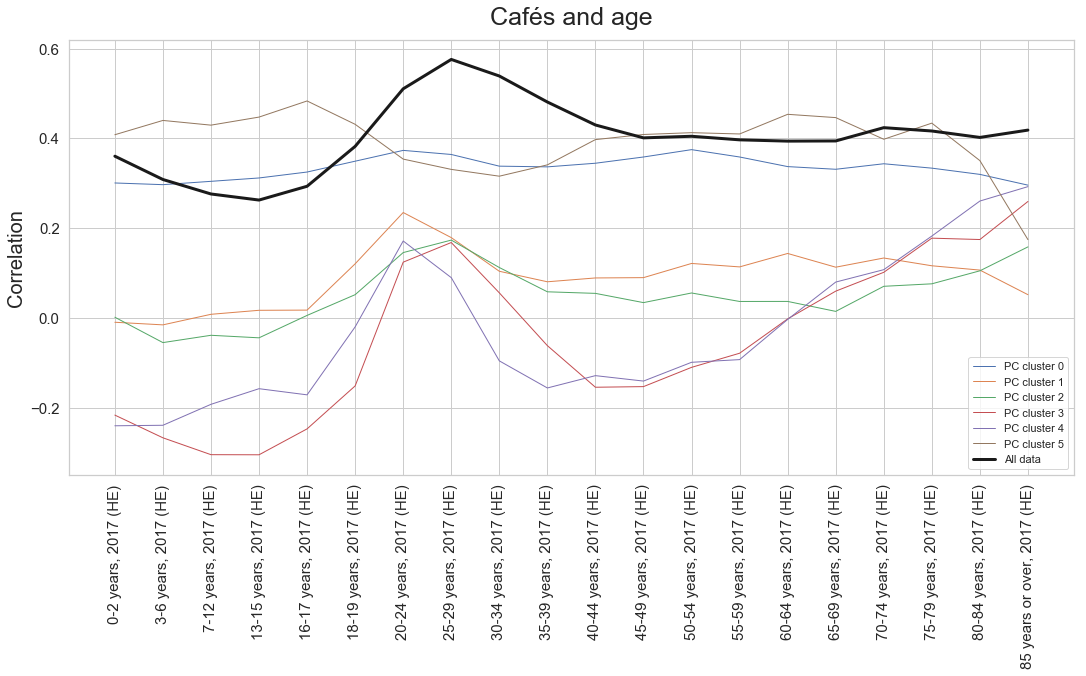



 *** Top 5 correlating features for cafes in Cafés and education
Academic degree - Higher level university degree, 2017 (KO)   0.60
Matriculation examination, 2017 (KO)                          0.59
Academic degree - Lower level university degree, 2017 (KO)    0.56
With education, total, 2017 (KO)                              0.51
Basic level studies, 2017 (KO)                                0.36
Name: All data, dtype: float64


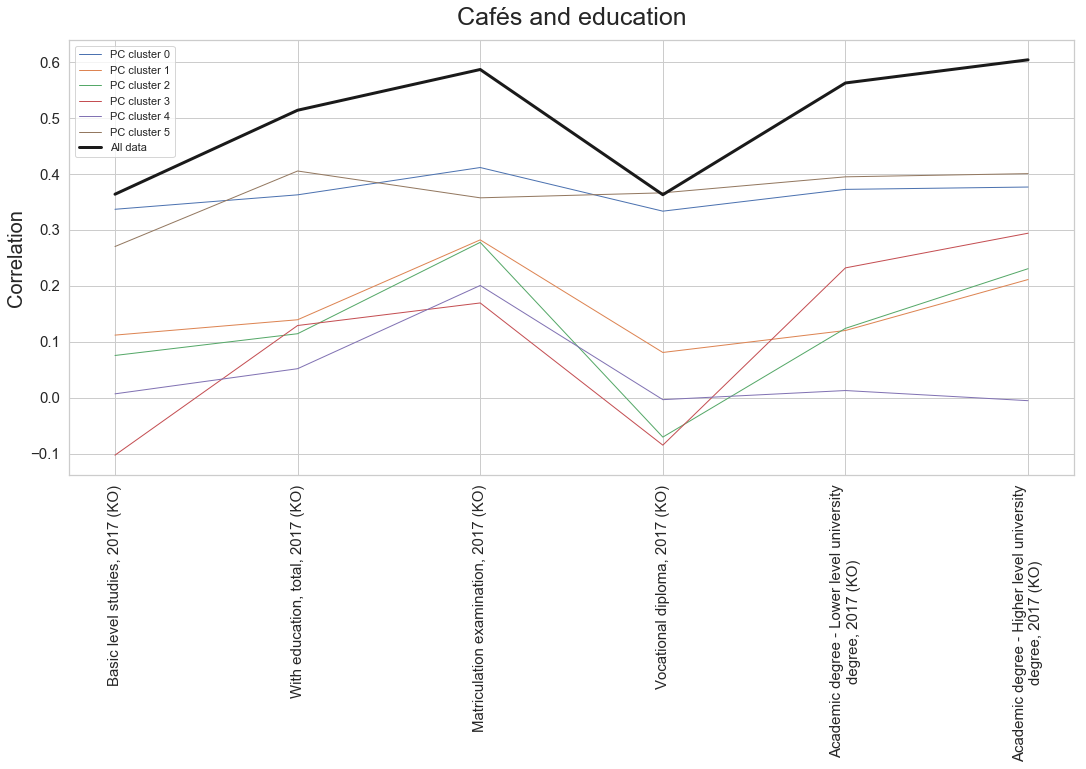



 *** Top 5 correlating features for cafes in Cafés and inhabitant income
Accumulated purchasing power of inhabitants, 2016 (HR)             0.52
Inhabintants belonging to the highest income category, 2016 (HR)   0.52
Inhabintants belonging to the lowest income category, 2016 (HR)    0.46
Inhabitants belonging to the middle income category, 2016 (HR)     0.45
Average income of inhabitants, 2016 (HR)                           0.19
Name: All data, dtype: float64


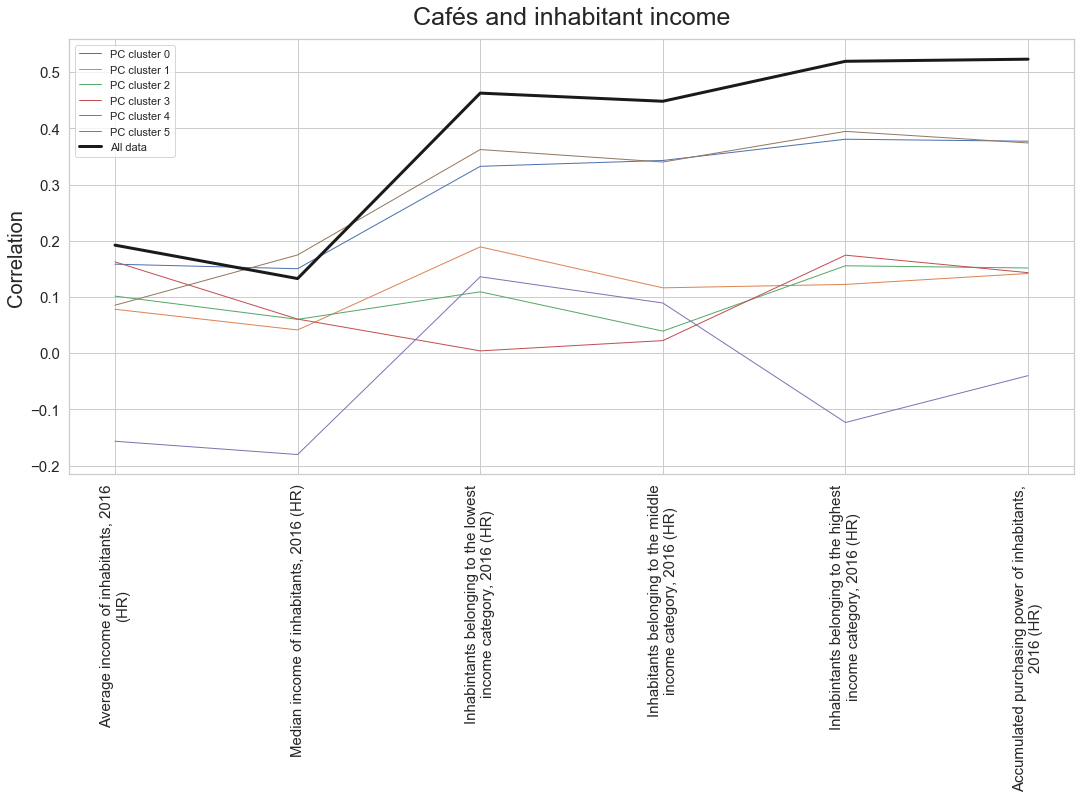



 *** Top 5 correlating features for cafes in Cafés and households
Young couples without children, 2017 (TE)          0.59
Households living in other dwellings, 2017 (TE)    0.57
Young single persons, 2017 (TE)                    0.57
Adult households, 2017 (TE)                        0.56
Households living in rented dwellings, 2017 (TE)   0.53
Name: All data, dtype: float64


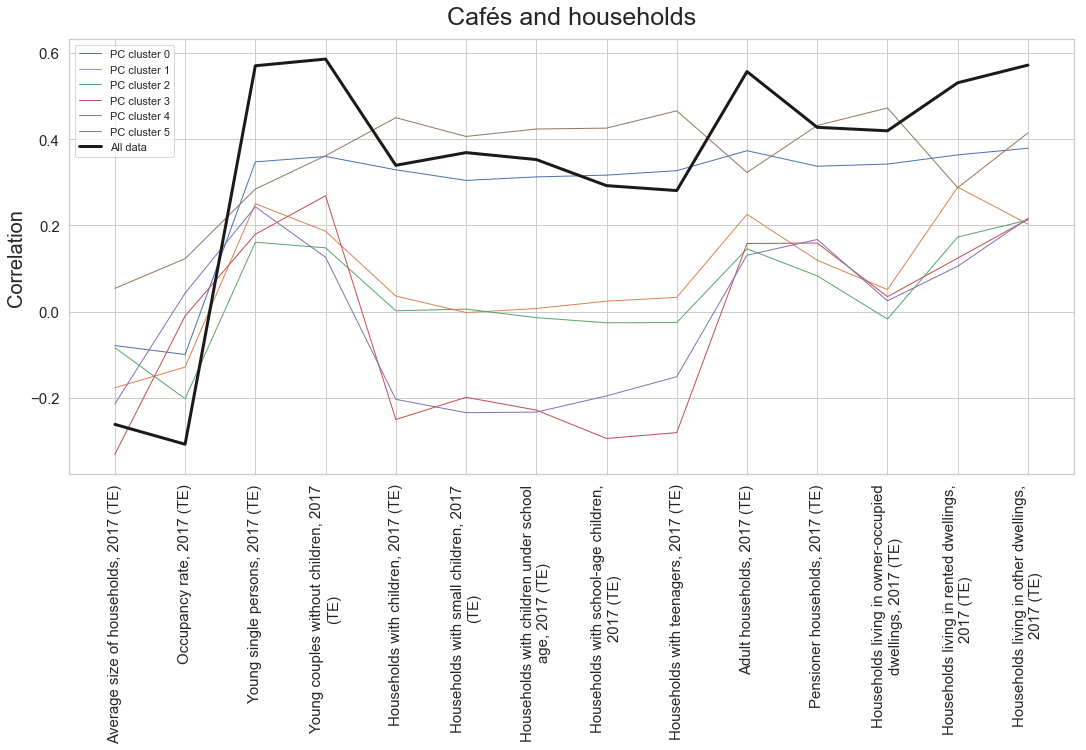



 *** Top 5 correlating features for cafes in Cafés and household income
Households belonging to the highest income category, 2016 (TR)   0.57
Accumulated purchasing power of households, 2016 (TR)            0.52
Households, total, 2016 (TR)                                     0.50
Households belonging to the middle income category, 2016 (TR)    0.47
Households belonging to the lowest income category, 2016 (TR)    0.44
Name: All data, dtype: float64


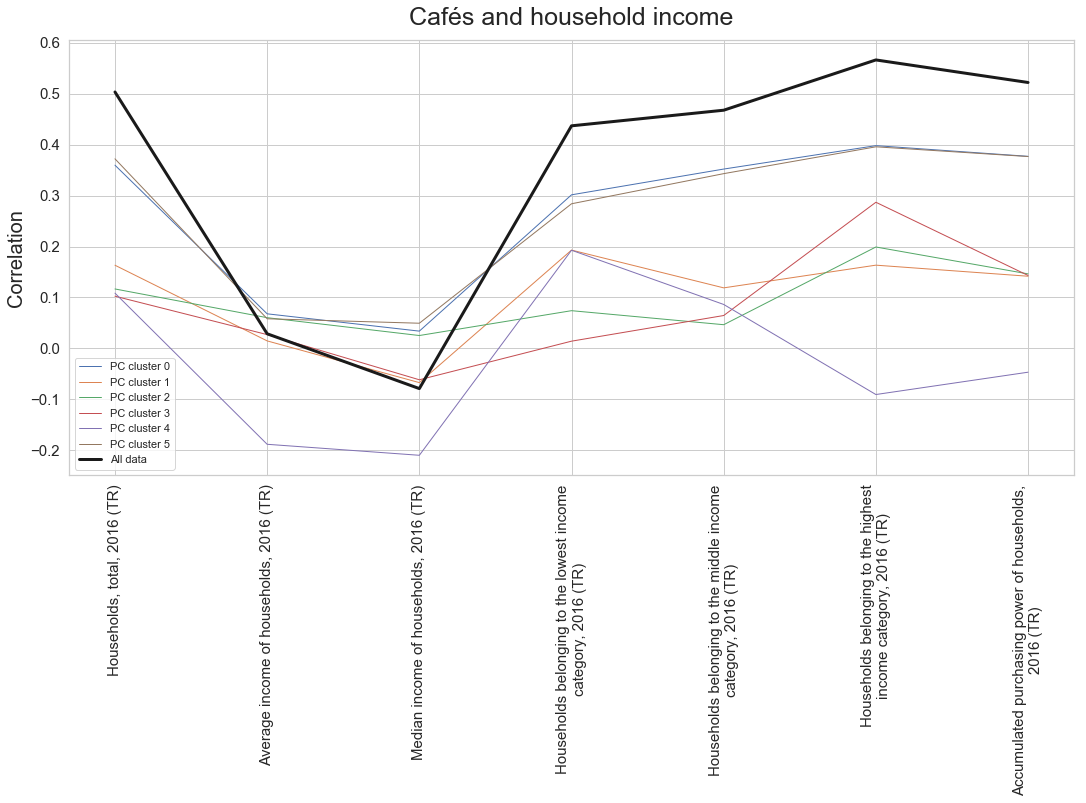



 *** Top 5 correlating features for cafes in Cafés and buildings
Dwellings in blocks of flats, 2017 (RA)   0.58
Dwellings, 2017 (RA)                      0.51
Other buildings, 2017 (RA)                0.17
Buildings, total, 2017 (RA)               0.11
Residential buildings, 2017 (RA)          0.10
Name: All data, dtype: float64


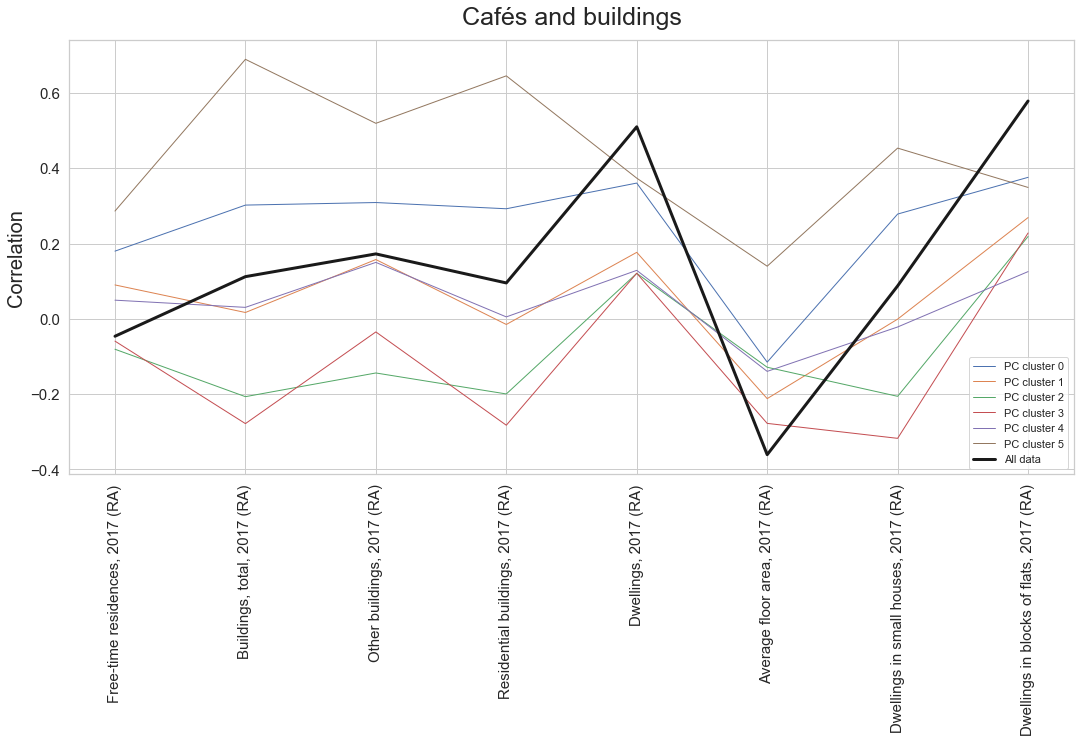



 *** Top 5 correlating features for cafes in Cafés and jobs
Services, 2016 (TP)                                              0.57
R Arts, entertainment and recreation, 2016 (TP)                  0.57
Workplaces, 2016 (TP)                                            0.56
S Other service activities, 2016 (TP)                            0.53
M Professional, scientific and technical activities, 2016 (TP)   0.52
Name: All data, dtype: float64


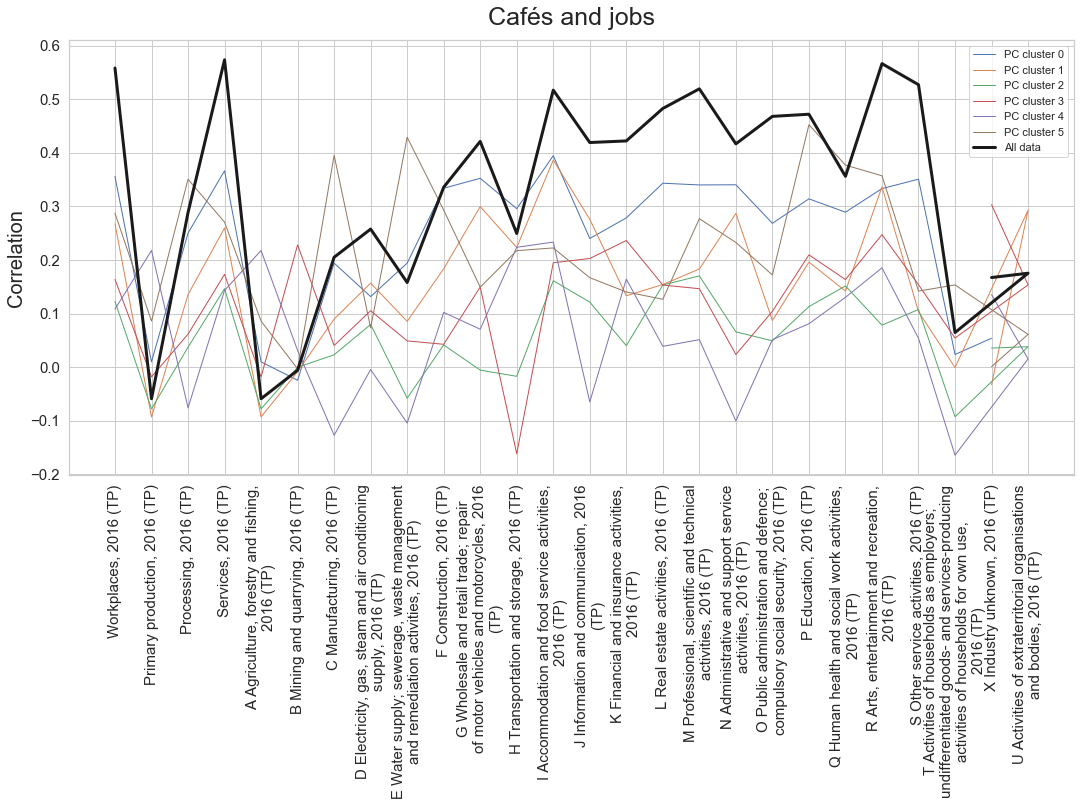



 *** Top 5 correlating features for cafes in Cafés and main activity
Employed, 2016 (PT)      0.50
Inhabitants, 2016 (PT)   0.46
Others, 2016 (PT)        0.45
Students, 2016 (PT)      0.44
Unemployed, 2016 (PT)    0.42
Name: All data, dtype: float64


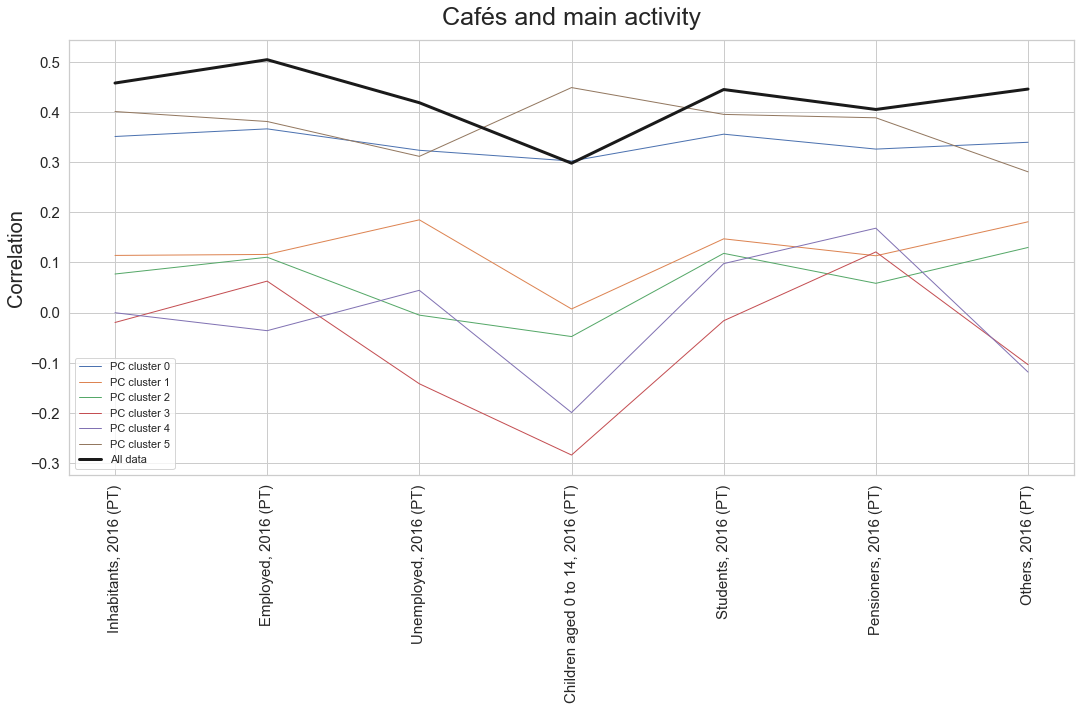

(456, 6)


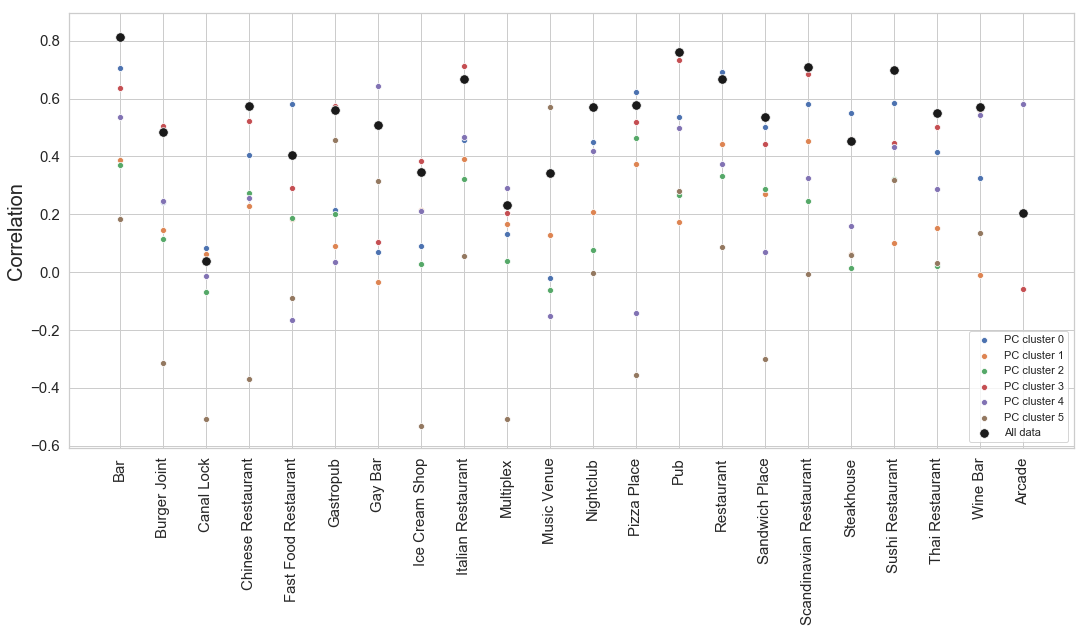

PC cluster 0  PC cluster 1  PC cluster 2  \
Arcade                            nan           nan           nan   
Bar                              0.71          0.39          0.37   
Burger Joint                     0.24          0.14          0.11   
Canal Lock                       0.08          0.06         -0.07   
Chinese Restaurant               0.41          0.23          0.27   
Fast Food Restaurant             0.58          0.18          0.19   
Gastropub                        0.22          0.09          0.20   
Gay Bar                          0.07         -0.03           nan   
Ice Cream Shop                   0.09          0.21          0.03   
Italian Restaurant               0.46          0.39          0.32   
Multiplex                        0.13          0.17          0.04   
Music Venue                     -0.02          0.13         -0.06   
Nightclub                        0.45          0.21          0.08   
Pizza Place                      0.62          0.37          0.46   
Pub                              0.54          0.17          0.27   
Restaurant                       0.69          0.44          0.33   
Sandwich Place                   0.50          0.27          0.29   
Scandinavian Restaurant          0.58          0.45          0.25   
Steakhouse                       0.55          0.06          0.02   
Sushi Restaurant                 0.58          0.10          0.32   
Thai Restaurant                  0.42          0.15          0.02   
Wine Bar                         0.33         -0.01           nan   

                         PC cluster 3  PC cluster 4  PC cluster 5  All data  
Arcade                          -0.06          0.58           nan      0.20  
Bar                              0.64          0.54          0.18      0.81  
Burger Joint                     0.51          0.25         -0.31      0.48  
Canal Lock                        nan         -0.01         -0.51      0.04  
Chinese Restaurant               0.52          0.26         -0.37      0.57  
Fast Food Restaurant             0.29         -0.16         -0.09      0.41  
Gastropub                        0.57          0.04          0.46      0.56  
Gay Bar                          0.10          0.64          0.31      0.51  
Ice Cream Shop                   0.39          0.21         -0.53      0.35  
Italian Restaurant               0.71          0.47          0.06      0.67  
Multiplex                        0.20          0.29         -0.51      0.23  
Music Venue                      0.34         -0.15          0.57      0.34  
Nightclub                        0.57          0.42         -0.00      0.57  
Pizza Place                      0.52         -0.14         -0.36      0.58  
Pub                              0.73          0.50          0.28      0.76  
Restaurant                       0.67          0.38          0.09      0.67  
Sandwich Place                   0.44          0.07         -0.30      0.53  
Scandinavian Restaurant          0.69          0.32         -0.01      0.71  
Steakhouse                       0.46          0.16          0.06      0.45  
Sushi Restaurant                 0.44          0.43          0.32      0.70  
Thai Restaurant                  0.50          0.29          0.03      0.55  
Wine Bar                         0.56          0.54          0.14      0.57

In [71]:
# First loop out correlations to Paavo features (aspects)
# print the top 5 correlating features for each aspect_column_set, and show a plot
for aspect_column_set, aspect_title in zip(listed_columns_paavo_aspects, aspect_titles_cafe):
    corr_aspect_df = get_correlation_df_for_paavo_aspects('Cafes Total', aspect_column_set)
    print("\n\n *** Top 5 correlating features for cafes in {}".format(aspect_title))
    print(corr_aspect_df.sort_values('All data', ascending=False)['All data'].head())
    save_name = "Analysis_10_correlations_" + aspect_title.replace(' ', '_') + '.png'
    plot_correlations(corr_aspect_df, highlight_col='All data', save_name=save_name, min_line_length=35, title=aspect_title)


# then work out the venue aspects.  Get correlations, and show those that have at least corr_limit correlation
# in at least one of the clusters (or all data).
# Finally show the venues also in table format.
corr_cafe_venues_df = get_correlation_df_for_venue_aspects("Cafes Total")

corr_limit = 0.5
filter_corr_limit_venues = (corr_cafe_venues_df[corr_cafe_venues_df.columns.tolist()[0]].abs() >= corr_limit)
filter_corr_limit_venues = filter_corr_limit_venues | (corr_cafe_venues_df[corr_cafe_venues_df.columns.tolist()[1]].abs() >= corr_limit)
filter_corr_limit_venues = filter_corr_limit_venues | (corr_cafe_venues_df[corr_cafe_venues_df.columns.tolist()[2]].abs() >= corr_limit)
filter_corr_limit_venues = filter_corr_limit_venues | (corr_cafe_venues_df[corr_cafe_venues_df.columns.tolist()[3]].abs() >= corr_limit)
filter_corr_limit_venues = filter_corr_limit_venues | (corr_cafe_venues_df[corr_cafe_venues_df.columns.tolist()[4]].abs() >= corr_limit)
filter_corr_limit_venues = filter_corr_limit_venues | (corr_cafe_venues_df[corr_cafe_venues_df.columns.tolist()[5]].abs() >= corr_limit)

save_name = "Analysis_10_correlations_Cafés_and_venues.png"
plot_correlations_for_venues(corr_cafe_venues_df[filter_corr_limit_venues], "All data", save_name=save_name)

corr_cafe_venues_df[filter_corr_limit_venues]

Handpicked from above all fields whose correlation is above 0.6 and the best of those (per aspect set) that are below 0.6.  There are features from all aspect sets.

These are used next in linear regression.

In [72]:
columns_best_cafe_correlations = [
    'Bar',
    'Italian Restaurant',
    'Pub',
    'Restaurant',
    'Scandinavian Restaurant',
    'Sushi Restaurant',
    '25-29 years, 2017 (HE)',
    'Matriculation examination, 2017 (KO)',
    'Academic degree - Higher level university degree, 2017 (KO)',
    'Inhabintants belonging to the highest income category, 2016 (HR)',
    'Young couples without children, 2017 (TE)',
    'Households belonging to the highest income category, 2016 (TR)',
    'Dwellings in blocks of flats, 2017 (RA)',
    'R Arts, entertainment and recreation, 2016 (TP)',
    'Services, 2016 (TP)',
    'Employed, 2016 (PT)'
]
paavo_venues_df[['PC', 'Cafes Total', 'Restaurants Total'] + columns_best_cafe_correlations].head()


PC  Cafes Total  Restaurants Total  Bar  Italian Restaurant  Pub  \
0  00100           36                 42    5                   1    4   
1  00120           35                 44    6                   0    4   
2  00130           32                 42    4                   0    2   
3  00140           25                 42    7                   3    3   
4  00150           37                 40   14                   3    3   

   Restaurant  Scandinavian Restaurant  Sushi Restaurant  \
0           2                        6                 6   
1           4                        5                 4   
2           4                       12                 2   
3           5                       12                 2   
4           4                        8                 1   

   25-29 years, 2017 (HE)  Matriculation examination, 2017 (KO)  \
0                    2512                                  2618   
1                     896                                  1058   
2                     162                                   242   
3                     907                                  1082   
4                    1321                                  1395   

   Academic degree - Higher level university degree, 2017 (KO)  \
0                                               5704             
1                                               2143             
2                                                500             
3                                               2433             
4                                               2731             

   Inhabintants belonging to the highest income category, 2016 (HR)  \
0                                               6411                  
1                                               2519                  
2                                                592                  
3                                               3034                  
4                                               3201                  

   Young couples without children, 2017 (TE)  \
0                                        861   
1                                        328   
2                                         63   
3                                        345   
4                                        478   

   Households belonging to the highest income category, 2016 (TR)  \
0                                               4222                
1                                               1708                
2                                                417                
3                                               2043                
4                                               2224                

   Dwellings in blocks of flats, 2017 (RA)  \
0                                    11882   
1                                     4439   
2                                      915   
3                                     5425   
4                                     6727   

   R Arts, entertainment and recreation, 2016 (TP)  Services, 2016 (TP)  \
0                                             2072                46560   
1                                              169                 8160   
2                                              308                10739   
3                                              102                 2232   
4                                               83                 4440   

   Employed, 2016 (PT)  
0                10032  
1                 3872  
2                  839  
3                 4218  
4                 5433

#### Step 4.10.2 Restaurant correlations



 *** Top 5 correlating features for restaurants in Restaurants and age
25-29 years, 2017 (HE)   0.62
30-34 years, 2017 (HE)   0.60
20-24 years, 2017 (HE)   0.57
35-39 years, 2017 (HE)   0.57
40-44 years, 2017 (HE)   0.54
Name: All data, dtype: float64


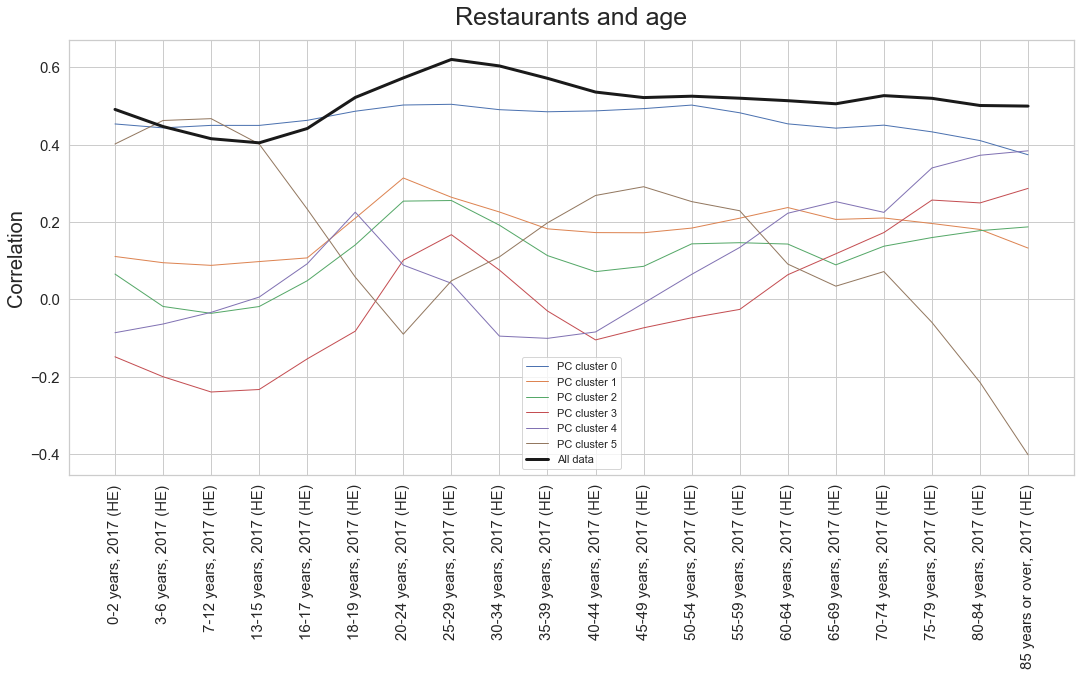



 *** Top 5 correlating features for restaurants in Restaurants and education
Academic degree - Lower level university degree, 2017 (KO)    0.63
Academic degree - Higher level university degree, 2017 (KO)   0.63
Matriculation examination, 2017 (KO)                          0.61
With education, total, 2017 (KO)                              0.61
Vocational diploma, 2017 (KO)                                 0.49
Name: All data, dtype: float64


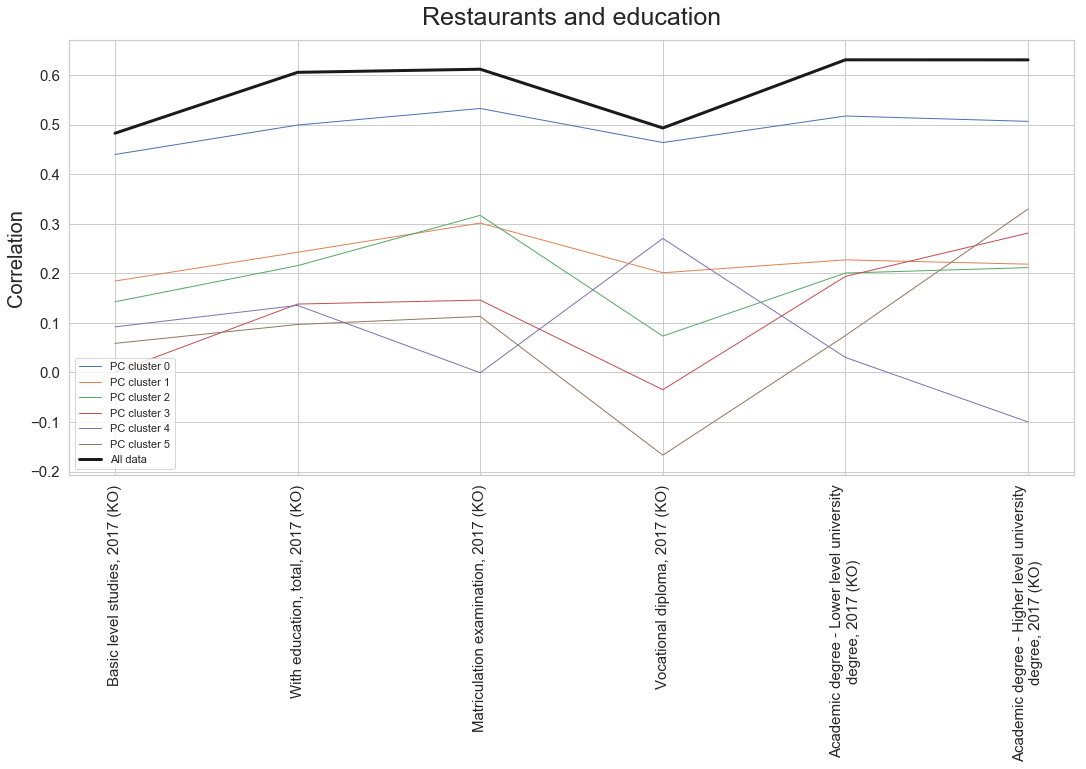



 *** Top 5 correlating features for restaurants in Restaurants and inhabitant income
Accumulated purchasing power of inhabitants, 2016 (HR)             0.61
Inhabintants belonging to the highest income category, 2016 (HR)   0.59
Inhabitants belonging to the middle income category, 2016 (HR)     0.56
Inhabintants belonging to the lowest income category, 2016 (HR)    0.55
Average income of inhabitants, 2016 (HR)                           0.20
Name: All data, dtype: float64


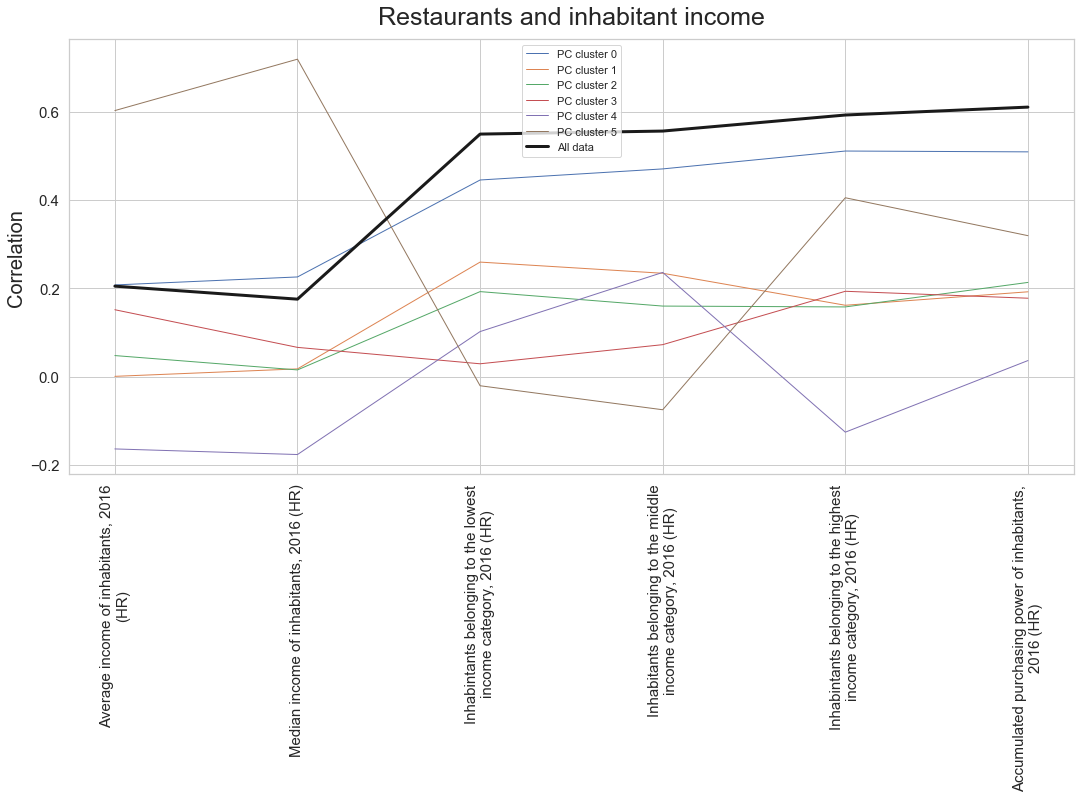



 *** Top 5 correlating features for restaurants in Restaurants and households
Young couples without children, 2017 (TE)          0.62
Adult households, 2017 (TE)                        0.62
Households living in other dwellings, 2017 (TE)    0.60
Households living in rented dwellings, 2017 (TE)   0.60
Young single persons, 2017 (TE)                    0.60
Name: All data, dtype: float64


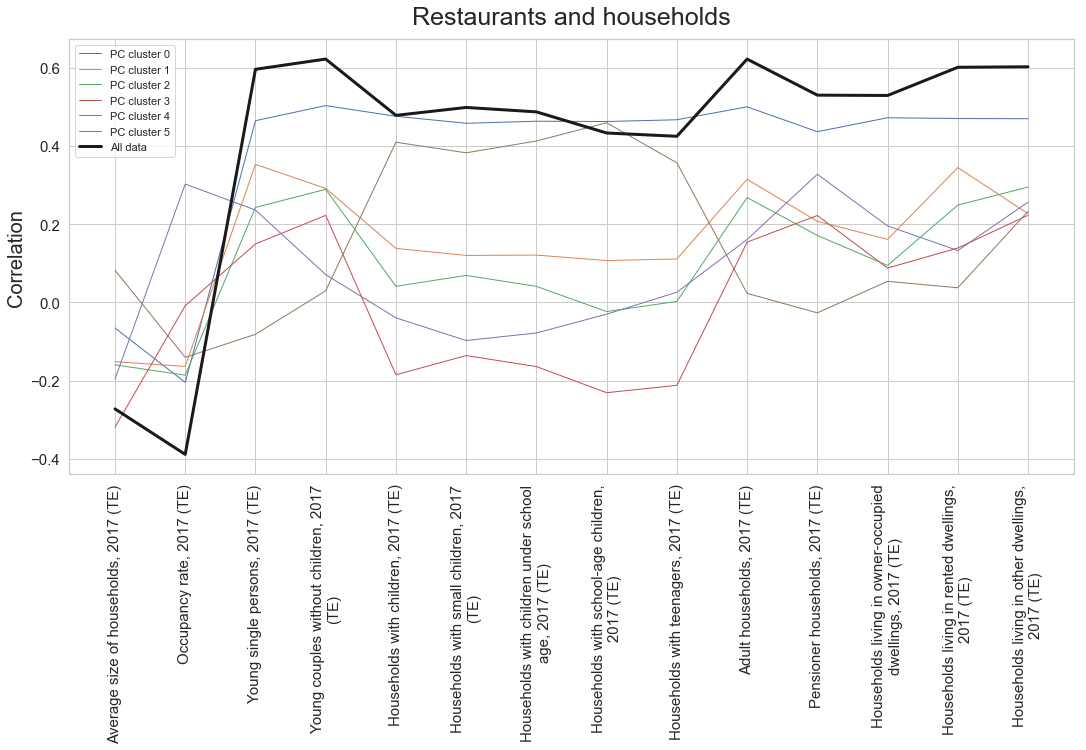



 *** Top 5 correlating features for restaurants in Restaurants and household income
Households belonging to the highest income category, 2016 (TR)   0.62
Accumulated purchasing power of households, 2016 (TR)            0.61
Households, total, 2016 (TR)                                     0.60
Households belonging to the middle income category, 2016 (TR)    0.57
Households belonging to the lowest income category, 2016 (TR)    0.52
Name: All data, dtype: float64


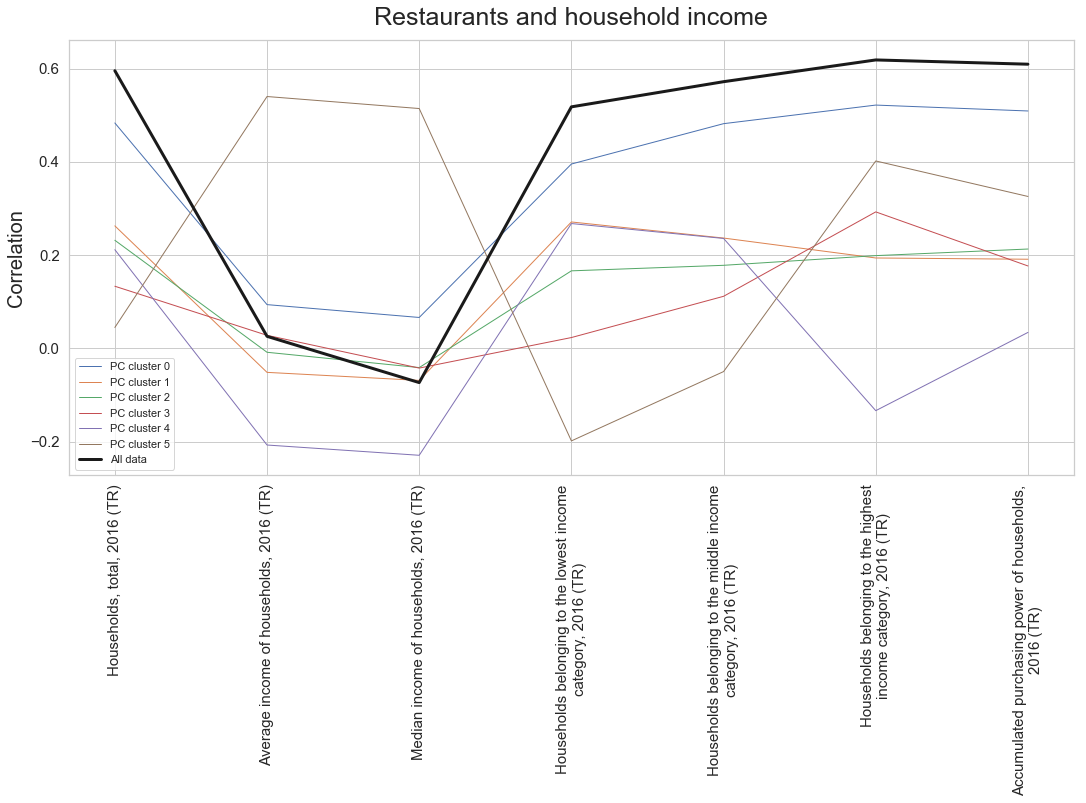



 *** Top 5 correlating features for restaurants in Restaurants and buildings
Dwellings in blocks of flats, 2017 (RA)   0.63
Dwellings, 2017 (RA)                      0.60
Other buildings, 2017 (RA)                0.26
Buildings, total, 2017 (RA)               0.23
Dwellings in small houses, 2017 (RA)      0.21
Name: All data, dtype: float64


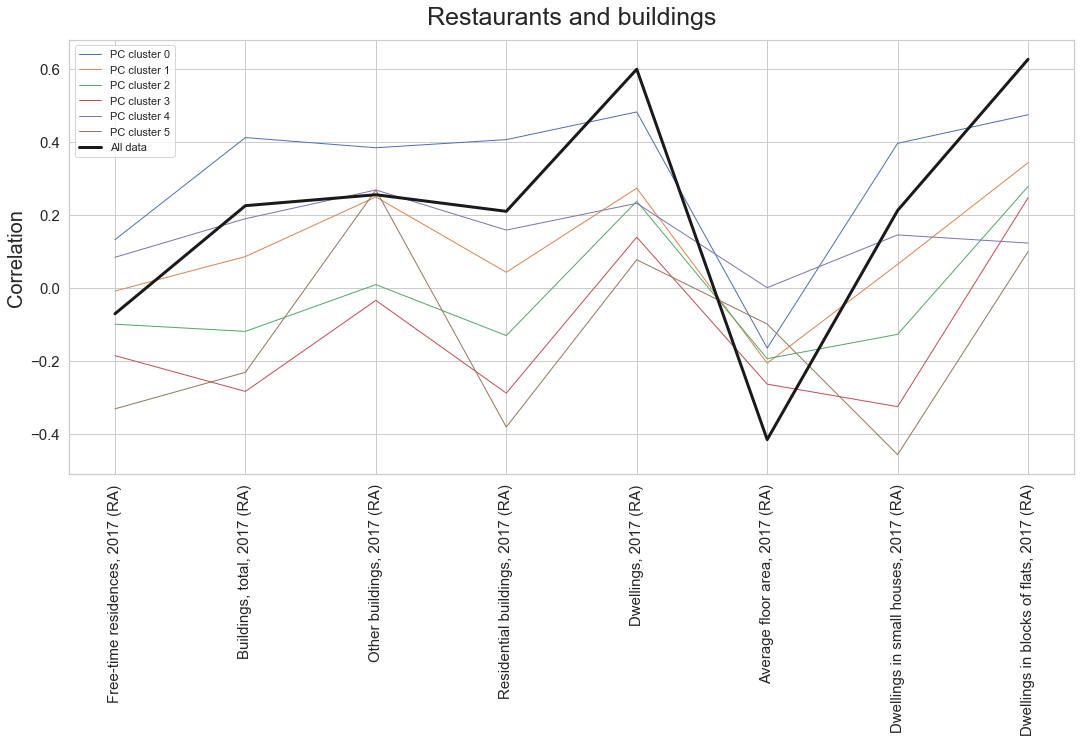



 *** Top 5 correlating features for restaurants in Restaurants and jobs
Workplaces, 2016 (TP)                                                               0.54
Services, 2016 (TP)                                                                 0.54
R Arts, entertainment and recreation, 2016 (TP)                                     0.49
S Other service activities, 2016 (TP)                                               0.49
G Wholesale and retail trade; repair of motor vehicles and motorcycles, 2016 (TP)   0.47
Name: All data, dtype: float64


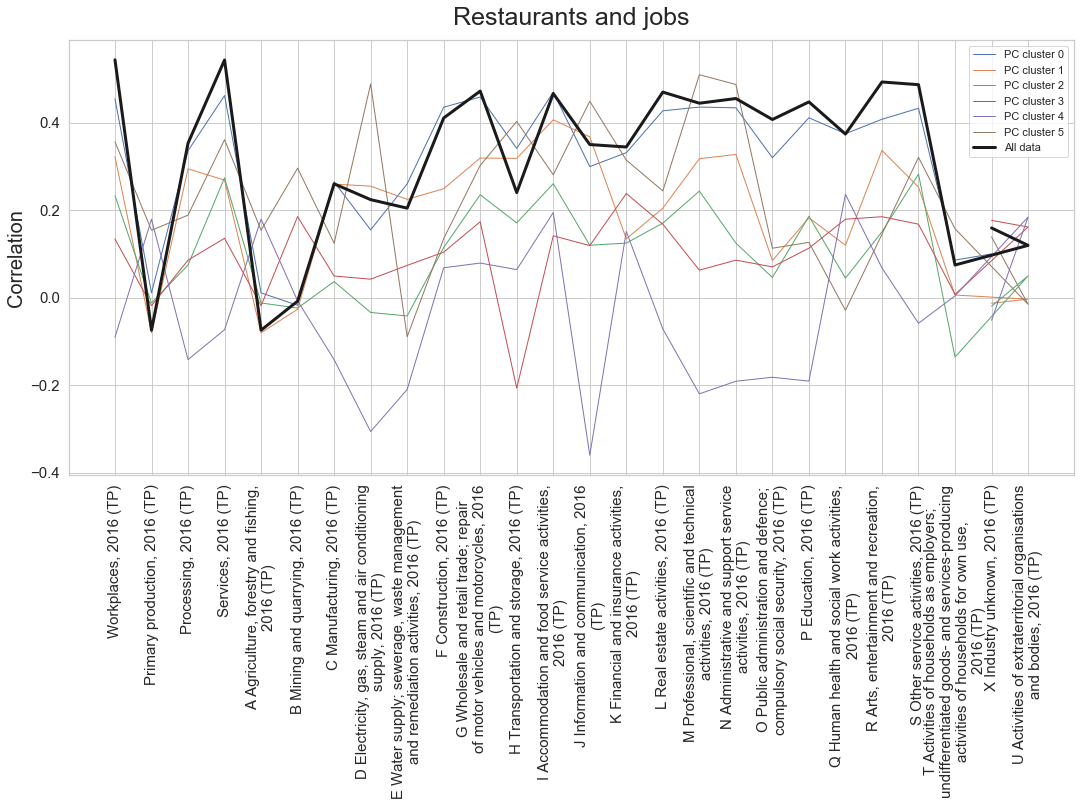



 *** Top 5 correlating features for restaurants in Restaurants and main activity
Employed, 2016 (PT)      0.59
Inhabitants, 2016 (PT)   0.57
Students, 2016 (PT)      0.55
Others, 2016 (PT)        0.54
Unemployed, 2016 (PT)    0.52
Name: All data, dtype: float64


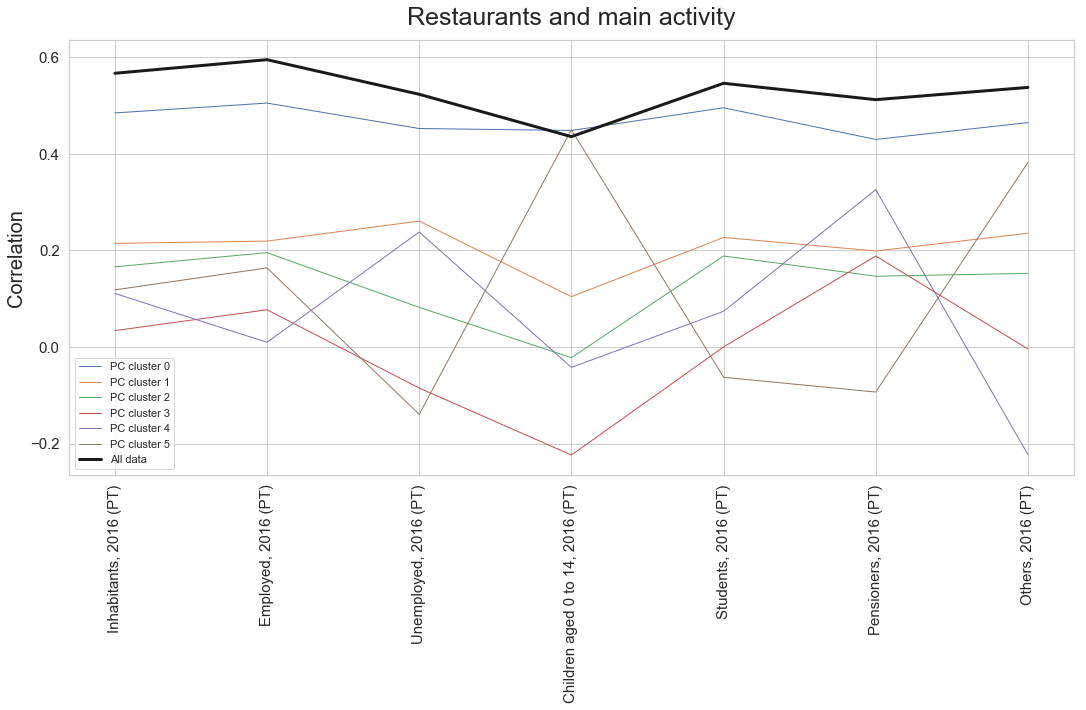

(456, 6)


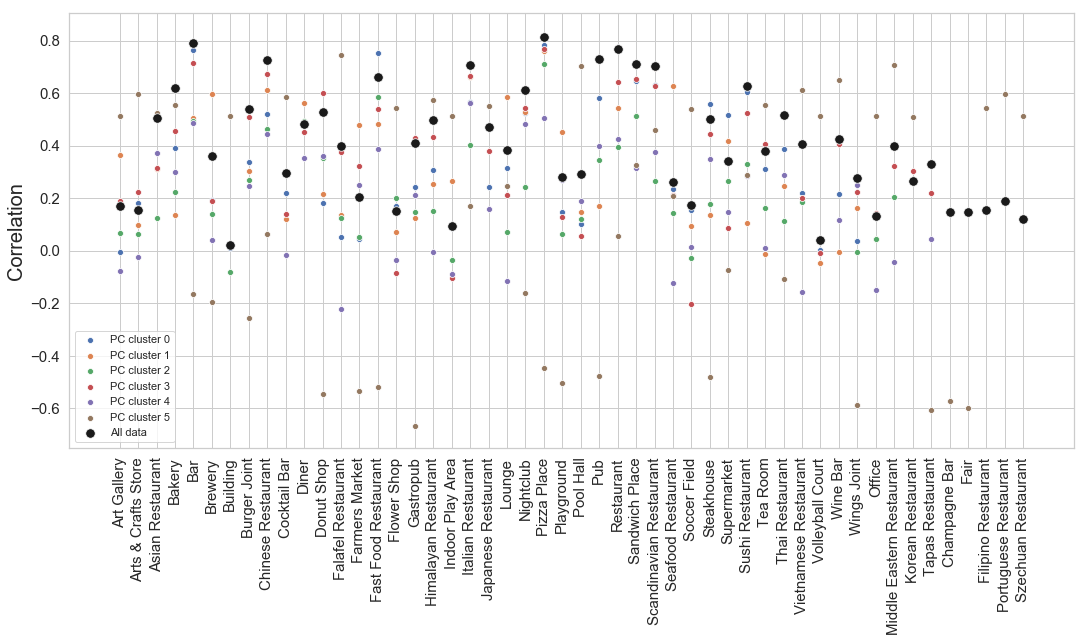

PC cluster 0  PC cluster 1  PC cluster 2  \
Art Gallery                       -0.00          0.37          0.07   
Arts & Crafts Store                0.18          0.10          0.06   
Asian Restaurant                   0.53          0.31          0.12   
Bakery                             0.39          0.14          0.22   
Bar                                0.76          0.51          0.49   
Brewery                            0.19          0.60          0.14   
Building                           0.01           nan         -0.08   
Burger Joint                       0.34          0.30          0.27   
Champagne Bar                       nan           nan           nan   
Chinese Restaurant                 0.52          0.61          0.46   
Cocktail Bar                       0.22          0.12           nan   
Diner                              0.48          0.56          0.50   
Donut Shop                         0.18          0.22          0.36   
Fair                                nan           nan           nan   
Falafel Restaurant                 0.05          0.13          0.12   
Farmers Market                     0.05          0.48          0.05   
Fast Food Restaurant               0.75          0.48          0.59   
Filipino Restaurant                 nan           nan           nan   
Flower Shop                        0.17          0.07          0.20   
Gastropub                          0.24          0.12          0.15   
Himalayan Restaurant               0.31          0.26          0.15   
Indoor Play Area                   0.09          0.27         -0.03   
Italian Restaurant                 0.57          0.66          0.40   
Japanese Restaurant                0.24           nan           nan   
Korean Restaurant                   nan           nan           nan   
Lounge                             0.31          0.59          0.07   
Middle Eastern Restaurant           nan           nan          0.21   
Nightclub                          0.52          0.53          0.24   
Office                              nan          0.05          0.05   
Pizza Place                        0.79          0.76          0.71   
Playground                         0.15          0.45          0.07   
Pool Hall                          0.10          0.15          0.12   
Portuguese Restaurant               nan           nan           nan   
Pub                                0.58          0.17          0.35   
Restaurant                         0.77          0.55          0.39   
Sandwich Place                     0.65          0.51          0.51   
Scandinavian Restaurant            0.63          0.70          0.27   
Seafood Restaurant                 0.24          0.63          0.14   
Soccer Field                       0.16          0.09         -0.03   
Steakhouse                         0.56          0.14          0.18   
Supermarket                        0.52          0.42          0.26   
Sushi Restaurant                   0.60          0.11          0.33   
Szechuan Restaurant                 nan           nan           nan   
Tapas Restaurant                    nan           nan           nan   
Tea Room                           0.31         -0.01          0.16   
Thai Restaurant                    0.39          0.25          0.11   
Vietnamese Restaurant              0.22          0.20          0.19   
Volleyball Court                   0.00         -0.05           nan   
Wine Bar                           0.22         -0.00           nan   
Wings Joint                        0.04          0.16         -0.01   

                           PC cluster 3  PC cluster 4  PC cluster 5  All data  
Art Gallery                        0.19         -0.08          0.51      0.17  
Arts & Crafts Store                0.22         -0.02          0.60      0.15  
Asian Restaurant                   0.31          0.37          0.53      0.51  
Bakery                             0.46          0.30          0.56      0.62  
Bar  

In [73]:
# First loop out correlations to Paavo features (aspects)
# print the top 5 correlating features for each aspect_column_set, and show a plot
for aspect_column_set, aspect_title in zip(listed_columns_paavo_aspects, aspect_titles_restaurant):
    corr_aspect_df = get_correlation_df_for_paavo_aspects('Restaurants Total', aspect_column_set)
    print("\n\n *** Top 5 correlating features for restaurants in {}".format(aspect_title))
    print(corr_aspect_df.sort_values('All data', ascending=False)['All data'].head())
    plot_correlations(corr_aspect_df, highlight_col='All data', min_line_length=35, title=aspect_title)


# then work out the venue aspects.  Get correlations, and show those that have at least corr_limit correlation
# in at least one of the clusters (or all data).
# Finally show the venues also in table format.
corr_restaurant_venues_df = get_correlation_df_for_venue_aspects("Restaurants Total")

corr_limit = 0.5
filter_corr_limit_venues = (corr_restaurant_venues_df[corr_restaurant_venues_df.columns.tolist()[0]].abs() >= corr_limit)
filter_corr_limit_venues = filter_corr_limit_venues | (corr_restaurant_venues_df[corr_restaurant_venues_df.columns.tolist()[1]].abs() >= corr_limit)
filter_corr_limit_venues = filter_corr_limit_venues | (corr_restaurant_venues_df[corr_restaurant_venues_df.columns.tolist()[2]].abs() >= corr_limit)
filter_corr_limit_venues = filter_corr_limit_venues | (corr_restaurant_venues_df[corr_restaurant_venues_df.columns.tolist()[3]].abs() >= corr_limit)
filter_corr_limit_venues = filter_corr_limit_venues | (corr_restaurant_venues_df[corr_restaurant_venues_df.columns.tolist()[4]].abs() >= corr_limit)
filter_corr_limit_venues = filter_corr_limit_venues | (corr_restaurant_venues_df[corr_restaurant_venues_df.columns.tolist()[5]].abs() >= corr_limit)

plot_correlations_for_venues(corr_restaurant_venues_df[filter_corr_limit_venues], "All data")

corr_restaurant_venues_df[filter_corr_limit_venues]


In [74]:
columns_best_restaurant_correlations = [
#    '',
    '25-29 years, 2017 (HE)',
    '30-34 years, 2017 (HE)',
    'Academic degree - Lower level university degree, 2017 (KO)',
    'Academic degree - Higher level university degree, 2017 (KO)',
    'Matriculation examination, 2017 (KO)',
    'With education, total, 2017 (KO)',
    'Accumulated purchasing power of inhabitants, 2016 (HR)',
    'Inhabintants belonging to the highest income category, 2016 (HR)',
    'Young couples without children, 2017 (TE)',
    'Households living in other dwellings, 2017 (TE)',
    'Households living in rented dwellings, 2017 (TE)',
    'Households belonging to the highest income category, 2016 (TR)',
    'Households belonging to the middle income category, 2016 (TR)',
    'Dwellings in blocks of flats, 2017 (RA)',
    'Services, 2016 (TP)',
    'Employed, 2016 (PT)',
    'Bakery',
    'Bar',
    'Nightclub',
    'Pub'
]

paavo_venues_df[['PC', 'Cafes Total', 'Restaurants Total'] + columns_best_restaurant_correlations].head()


PC  Cafes Total  Restaurants Total  25-29 years, 2017 (HE)  \
0  00100           36                 42                    2512   
1  00120           35                 44                     896   
2  00130           32                 42                     162   
3  00140           25                 42                     907   
4  00150           37                 40                    1321   

   30-34 years, 2017 (HE)  \
0                    2000   
1                     735   
2                     150   
3                     737   
4                    1162   

   Academic degree - Lower level university degree, 2017 (KO)  \
0                                               2899            
1                                                969            
2                                                199            
3                                               1143            
4                                               1478            

   Academic degree - Higher level university degree, 2017 (KO)  \
0                                               5704             
1                                               2143             
2                                                500             
3                                               2433             
4                                               2731             

   Matriculation examination, 2017 (KO)  With education, total, 2017 (KO)  \
0                                  2618                             14163   
1                                  1058                              5365   
2                                   242                              1165   
3                                  1082                              5946   
4                                  1395                              7279   

   Accumulated purchasing power of inhabitants, 2016 (HR)  ...  \
0                                          621218859       ...   
1                                          240042091       ...   
2                                           65600013       ...   
3                                          331579906       ...   
4                                          313700708       ...   

   Households living in rented dwellings, 2017 (TE)  \
0                                              5103   
1                                              1744   
2                                               363   
3                                              2000   
4                                              2707   

   Households belonging to the highest income category, 2016 (TR)  \
0                                               4222                
1                                               1708                
2                                                417                
3                                               2043                
4                                               2224                

   Households belonging to the middle income category, 2016 (TR)  \
0                                               4123               
1                                               1567               
2                                                252               
3                                               1671               
4                                               2439               

   Dwellings in blocks of flats, 2017 (RA)  Services, 2016 (TP)  \
0                                    11882                46560   
1                                     4439                 8160   
2                                      915                10739   
3                                     5425                 2232   
4                                     6727                 4440   

   Employed, 2016 (PT)  Bakery  Bar  Nightclub  Pub  
0                10032       5    5          1    4  
1                 3872       5    6          0    4  
2                  839       1    4          1    2  


### Step 4.11 - linear regression model for predicting cafes and restaurants


- Build model, see how it performs

- OPTIONAL: build a polynomial model also, and compare performance

- OPTIONAL: show a prediction, where prediction is higher than actual, is it potential place for a venue?

**NOTE**: Use all data, as clustering didn't appear to provide better correlations than all data. 

#### Step 4.11.1 - Cafe models

In [75]:
# Here is the data we model with.  'Cafes total' is the Y and columns_best_cafe_correlations are the X.
paavo_venues_df[['PC', 'Cafes Total'] + columns_best_cafe_correlations].head()


PC  Cafes Total  Bar  Italian Restaurant  Pub  Restaurant  \
0  00100           36    5                   1    4           2   
1  00120           35    6                   0    4           4   
2  00130           32    4                   0    2           4   
3  00140           25    7                   3    3           5   
4  00150           37   14                   3    3           4   

   Scandinavian Restaurant  Sushi Restaurant  25-29 years, 2017 (HE)  \
0                        6                 6                    2512   
1                        5                 4                     896   
2                       12                 2                     162   
3                       12                 2                     907   
4                        8                 1                    1321   

   Matriculation examination, 2017 (KO)  \
0                                  2618   
1                                  1058   
2                                   242   
3                                  1082   
4                                  1395   

   Academic degree - Higher level university degree, 2017 (KO)  \
0                                               5704             
1                                               2143             
2                                                500             
3                                               2433             
4                                               2731             

   Inhabintants belonging to the highest income category, 2016 (HR)  \
0                                               6411                  
1                                               2519                  
2                                                592                  
3                                               3034                  
4                                               3201                  

   Young couples without children, 2017 (TE)  \
0                                        861   
1                                        328   
2                                         63   
3                                        345   
4                                        478   

   Households belonging to the highest income category, 2016 (TR)  \
0                                               4222                
1                                               1708                
2                                                417                
3                                               2043                
4                                               2224                

   Dwellings in blocks of flats, 2017 (RA)  \
0                                    11882   
1                                     4439   
2                                      915   
3                                     5425   
4                                     6727   

   R Arts, entertainment and recreation, 2016 (TP)  Services, 2016 (TP)  \
0                                             2072                46560   
1                                              169                 8160   
2                                              308                10739   
3                                              102                 2232   
4                                               83                 4440   

   Employed, 2016 (PT)  
0                10032  
1                 3872  
2                  839  
3                 4218  
4                 5433

In [76]:
from sklearn import linear_model

def get_train_and_test_data(df):
    # prepare train and test data sets from the whole dataset.
    mask = np.random.rand(len(df)) < 0.8
    train = df[mask]
    test = df[~mask]
    return train, test

print('get_train_and_test_data() defined.')


def train_linear_model(train_df, x_columns, y_col):

    # Train the model
    regr = linear_model.LinearRegression()
    x_train = np.asanyarray(train_df[x_columns])
    y_train = np.asanyarray(train_df[[y_col]])
    regr.fit (x_train, y_train)
    
    return regr

print('train_linear_model() defined')

def test_linear_model(regr_model, test_df, x_columns, y_col):
    # Test model with test data
    y_hat= regr_model.predict(test_df[x_columns])
    x_test = np.asanyarray(test_df[x_columns])
    y_test = np.asanyarray(test_df[[y_col]])

    # Explained variance score: 1 is perfect prediction
    res_sum_squares = np.mean((y_hat - y_test) ** 2)
    variance_score = regr_model.score(x_test, y_test)
    return res_sum_squares, variance_score, y_hat

print('test_linear_model() defined')


get_train_and_test_data() defined.
train_linear_model() defined
test_linear_model() defined


In [77]:
def list_flatten(l):
    return [item for sublist in l for item in sublist]

In [78]:
var_scores = []
for i in range(600):

    train_df, test_df = get_train_and_test_data(paavo_venues_df)
    regr_model = train_linear_model(train_df, columns_best_cafe_correlations, 'Cafes Total')
    res_sum_squares, variance_score, y_hat = test_linear_model(regr_model, test_df, columns_best_cafe_correlations, 'Cafes Total')

    #print ('Coefficients: ', regr_model.coef_)
    #print("Residual sum of squares: {:.2f}, Variance score: {:.2f}".format(res_sum_squares, variance_score))

    var_scores.append(variance_score)

print('Average variance score: {:.2f}'.format(sum(var_scores) / len(var_scores)))


Average variance score: 0.83


Now create a model and train it on all of data, then run the prediction and find the top 10 spots where the error *(y_hat - y)* is biggest.

In [79]:
regr_model = train_linear_model(paavo_venues_df, columns_best_cafe_correlations, 'Cafes Total')
res_sum_squares, variance_score, y_hat = test_linear_model(regr_model, paavo_venues_df, columns_best_cafe_correlations, 'Cafes Total')

print("Residual sum of squares: {:.2f}, Variance score: {:.2f}".format(res_sum_squares, variance_score))

paavo_venues_df["Predicted Cafes Total"] = np.around(y_hat)
paavo_venues_df["Predicted Cafes Total"] = paavo_venues_df["Predicted Cafes Total"].astype('int')
paavo_venues_df["Cafe Potential"] =  paavo_venues_df["Predicted Cafes Total"] - paavo_venues_df["Cafes Total"]

y_real = np.asanyarray(paavo_venues_df[['Cafes Total']])
error_a = y_hat - y_real
sorted_error_a = np.sort(error_a, axis=None)

# reverse the numpy array
sorted_error_a = sorted_error_a[::-1]

for i in range(10):
    j, = np.where(list_flatten(error_a) == sorted_error_a[i])
    print("Error {:.2f} found at row {}".format(sorted_error_a[i], j[0]))

Residual sum of squares: 3.50, Variance score: 0.86
Error 11.68 found at row 10
Error 10.82 found at row 0
Error 10.20 found at row 77
Error 9.83 found at row 9
Error 9.33 found at row 810
Error 7.82 found at row 1749
Error 7.75 found at row 1748
Error 7.75 found at row 1339
Error 7.56 found at row 1333
Error 7.50 found at row 1755


In [80]:
paavo_venues_df[['PC', 'PC Name', 'City', 'Cafes Total', 'Predicted Cafes Total', 'Cafe Potential']].sort_values('Cafe Potential', ascending=False).head()

PC                        PC Name      City  Cafes Total  \
10   00210                     Vattuniemi  Helsinki            8   
0    00100  Helsinki Keskusta - Etu-Töölö  Helsinki           36   
77   00940               Kontula - Vesala  Helsinki            7   
9    00200                    Lauttasaari  Helsinki           11   
810  33200        Tampere Keskus Läntinen   Tampere           24   

     Predicted Cafes Total  Cafe Potential  
10                      20              12  
0                       47              11  
77                      17              10  
9                       21              10  
810                     33               9

#### Step 4.11.2 Best potential Cafe locations on map

Show on map those locations (postal code areas) where the cafe potential is more than five (5).  Also show them on table.

In [81]:
paavo_venues_df[['PC', 'PC Name', 'City', 'Cafes Total', 'Predicted Cafes Total', 'Cafe Potential']].sort_values('Cafe Potential', ascending=False).head()

cafe_potentials_df = paavo_venues_df[paavo_venues_df['Cafe Potential'] > 5].sort_values('Cafe Potential', ascending=False)
print(cafe_potentials_df.shape)

cafe_potentials_df = cafe_potentials_df[list_order_to_top(['PC', 'PC Name', 'City', 'Cafes Total', 'Predicted Cafes Total', 'Cafe Potential'], cafe_potentials_df.columns.tolist())]
cafe_potentials_df.iloc[:,:6]

(27, 590)


PC                        PC Name       City  Cafes Total  \
10    00210                     Vattuniemi   Helsinki            8   
0     00100  Helsinki Keskusta - Etu-Töölö   Helsinki           36   
77    00940               Kontula - Vesala   Helsinki            7   
9     00200                    Lauttasaari   Helsinki           11   
810   33200        Tampere Keskus Läntinen    Tampere           24   
1339  60510                    Hyllykallio  Seinäjoki            5   
1333  60120                          Pohja  Seinäjoki            6   
1755  80220                       Penttilä    Joensuu           16   
1749  80110       Joensuu Keskus Eteläinen    Joensuu           13   
1748  80100      Joensuu Keskus, Pohjoinen    Joensuu           16   
2074  99130                 Sirkka-Rauhala    Kittilä           11   
64    00810                    Herttoniemi   Helsinki            6   
519   20540           Nummi-Ylioppilaskylä      Turku            1   
506   20100                   Turku Keskus      Turku            2   
214   04200                  Kerava Keskus     Kerava            1   
2086  99800                          Ivalo      Inari            7   
547   21250                          Masku      Masku            4   
35    00520                     Itä-Pasila   Helsinki            1   
815   33270                          Epilä    Tampere            7   
41    00580                    Verkkosaari   Helsinki           17   
1611  70500                       Männistö     Kuopio            1   
1623  71130                      Kortejoki     Kuopio            2   
218   04250                      Alikerava     Kerava            1   
1759  80400                       Ylämylly     Liperi           17   
2034  96200            Sahanperä-Ratantaus  Rovaniemi            6   
2036  96400            Pullinranta-Kiiruna  Rovaniemi            7   
91    01300                      Tikkurila     Vantaa            1   

      Predicted Cafes Total  Cafe Potential  
10                       20              12  
0                        47              11  
77                       17              10  
9                        21              10  
810                      33               9  
1339                     13               8  
1333                     14               8  
1755                     24               8  
1749                     21               8  
1748                     24               8  
2074                     18               7  
64                       13               7  
519                       8               7  
506                       9               7  
214                       8               7  
2086                     14               7  
547                      10               6  
35                        7               6  
815                      13               6  
41                       23               6  
1611                      7               6  
1623                      8               6  
218                       7               6  
1759                     23               6  
2034                     12               6  
2036                     13               6  
91                        7               6

In [82]:

my_color = "#050505"
#finland_latitude = 62.777754
finland_latitude = 65.0
finland_longitude = 26.199539
map_test = folium.Map(location=[finland_latitude, finland_longitude], zoom_start=5)

cluster_colors = ["#0505ff", "#cc8305", "#050505", "#707070", "#ff7575", "#ff0000"]
for i in range(cafe_potentials_df.shape[0]):
    row = cafe_potentials_df.iloc[i,:]
    
    # show postal code center location
    label = folium.Popup(row[0] + " " + row[1] + ", " + row[2] + ", cafe potential " + str(row[5]))
    my_color = "#ff1111"
    folium.CircleMarker(
        [row[26], row[25]],
        radius=10,
        popup=label,
        color=my_color,
        fill_opacity=0.8,
        fill_color=my_color).add_to(map_test)

map_test